# Проект «Исследование объявлений о продаже квартир»

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Наша задача — установить параметры, что позволит построить автоматизированную систему, которая отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. Подробная информация по столбцам будет в Шаге 1.

Исследование будем проводить в несколько шагов:
- Подготовим/предобработаем данные:
  - Определим и изучим пропущенные значения;
  - Заполним пропуски, где это уместно;
  - Приведём данные к нужным типам.
- Посчитаем и добавим в таблицу:
  - цену квадратного метра;
  - день недели, месяц и год публикации объявления;
  - этаж квартиры; варианты — первый, последний, другой;
  - соотношение жилой и общей площади, а также отношение площади кухни к общей.
- Проведём исследовательский анализ:
  - Изучим следующие параметры: площадь, цена, число комнат, высота потолков. Построим гистограммы для каждого параметра.
  - Изучим время продажи квартиры. Построим гистограмму. Посчитаем среднее и медиану. Опишем, сколько обычно занимает продажа. Определим, когда можно считать, что продажи прошли очень быстро, а когда необычно долго.
  - Уберём редкие и выбивающиеся значения. Опишем особенности.
  - Определим, какие факторы больше всего влияют на стоимость квартиры. Изучим, зависит ли цена от площади, числа комнат, удалённости от центра. Изучим зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучим зависимость от даты размещения: дня недели, месяца и года.
  - Выберем 10 населённых пунктов с наибольшим числом объявлений. Посчитаем среднюю цену квадратного метра в этих населённых пунктах. Выделим среди них населённые пункты с самой высокой и низкой стоимостью жилья.
  - Изучим предложения квартир в Санкт-Петербурге. Выясним, какая область входит в центр. Определим, как цена зависит от удалённости от центра. Определим границу центральной зоны.
  - Выделим сегмент квартир в центре. Проанализируем эту территорию и изучим параметры: площадь, цена, число комнат, высота потолков. Выделим факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Определим, отличаются ли выводы по центральной зоне от общих выводов по всему городу.
- Сделаем общий вывод по исследованию.

### Шаг 1. Откроем файл с данными и изучим общую информацию. 

In [1]:
#импортируем библиотеку pandas
import pandas as pd

#для создания графиков и гистограмм импортируем библиотеку matplotlib
import matplotlib.pyplot as plt

#импортируем библиотеку warnings, чтобы скрыть возникающие предупреждения
import warnings
warnings.filterwarnings('ignore')

In [4]:
#переименуем столбец cityCenters_nearest в city_сenters_nearest
df.rename(columns = {'cityCenters_nearest':'city_centers_nearest'}, inplace = True)

In [5]:
#получим общую информацию о таблице
print('Общая информация о таблице после добавления знака табуляции:')
print(df.info())

Общая информация о таблице после добавления знака табуляции:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
city_centers_nearest    18180 non-null float64
parks_around3000        18181 non-null float64


In [6]:
#установим значение для отображения всех столбцов набора данных 
pd.set_option('max_columns', None)

In [7]:
#получим первые пять строк таблицы df после добавления знака табуляции
print('Первые пять строк таблицы df после добавления знака табуляции:')
df.head()

Первые пять строк таблицы df после добавления знака табуляции:


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


### Вывод

Для работы разделим данные по колонкам: добавим функции read_csv() знак табуляции - параметр sep='\t'. После разделения по колонкам данные отображаются корректно.

Всего в таблице 22 столбца:

- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- city_centers_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах(м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

Типы данных столбцов различаются: bool(2), float64(14), int64(3), object(3).

Количество значений в столбцах также различается: максимальное значение 23699 указано для восьми столбцов: 'total_images', 'last_price', 'total_area', 'first_day_exposition', 'rooms', 'floor', 'studio', 'open_plan'.

В остальных четырнадцати столбцах 'ceiling_height' и 'floors_total', 'living_area', 'is_apartment', 'kitchen_area', 'balcony', 'locality_name', 'airports_nearest', 'city_centers_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'days_exposition' указанные меньшие значения.
Значит, в данных есть пропущенные значения. 

Предположим, что пропущенные значения в столбцах с расстояниями - технологическая ошибка, т.к. данные по расстоянию должны быть получены автоматически на основе картографических данных. Данные в остальных столбцах, которые заполняются составителем объявления, результат человеческого фактора: составитель пропустил при заполнении данные параметры. 

На Шаге 2 обработаем пропущенные значения при помощи имеющихся значений в соответствующих столбцах: будем использовать, где это уместно, группировки и медианные значения.

### Шаг 2. Предобработка данных

In [8]:
#получим суммарное количество пропусков для каждого столбца, для этого применим метод isnull()
print('Cуммарное количество пропусков для каждого столбца до обработки пропусков:')
print(df.isnull().sum())

Cуммарное количество пропусков для каждого столбца до обработки пропусков:
total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


#### Вывод

Пропущенные значения есть в 14 столбцах из 22. 
Рассмотрим каждый столбец по отдельности, т.к. даже если пропущенных значений нет, могут быть подозрительные или некорректные значения.

In [9]:
#посчитаем количество дубликатов в наборе данных
print('Количество дубликатов в наборе данных:')
print(df.duplicated().sum())

Количество дубликатов в наборе данных:
0


#### Столбец 'total_images' - число фотографий квартиры в объявлении

In [10]:
#получим суммарное количество пропусков для столбца total_images, для этого применим метод isnull()
print('Cуммарное количество пропусков для столбца total_images:')
print(df['total_images'].isnull().sum())

Cуммарное количество пропусков для столбца total_images:
0


In [11]:
#выделим уникальные значения в столбце total_images
print('Уникальные значения в столбце total_images:')
print(df['total_images'].value_counts())

Уникальные значения в столбце total_images:
10    1798
9     1725
20    1694
8     1585
7     1521
6     1482
11    1362
5     1301
12    1225
0     1059
13    1015
14     986
4      986
15     948
1      872
3      769
16     761
17     650
18     642
2      640
19     603
23      16
21      12
24       8
22       8
26       5
28       4
32       4
50       3
29       3
31       2
35       2
30       2
27       2
37       1
39       1
25       1
42       1
Name: total_images, dtype: int64


In [12]:
#выявим максимальное значение в столбце total_images
print('Максимальное значение в столбце total_images:')
print(df['total_images'].max())

Максимальное значение в столбце total_images:
50


In [13]:
#выявим минимальное значение в столбце total_images
print('Минимальное значение в столбце total_images:')
print(df['total_images'].min())

Минимальное значение в столбце total_images:
0


In [14]:
#проверим тип данных
print(df['total_images'].dtype)

int64


#### Вывод

Cуммарное количество пропусков для столбца 'total_images' равно нулю, пропущенных значений нет. Данные отображаются корректно, подозрительных значений не наблюдается, правки вносить не будем.
Тип данных int64 не меняем.

Максимальное число фотографий квартиры в объявлении - 50.
Минимальное число фотографий квартиры в объявлении - нуль.

#### Столбец 'last_price' - цена на момент снятия с публикации

In [15]:
#получим суммарное количество пропусков для столбца last_price
print('Cуммарное количество пропусков для столбца last_price:')
print(df['last_price'].isnull().sum())

Cуммарное количество пропусков для столбца last_price:
0


In [16]:
#получим числовое описание данных (список характерных значений) для столбца last_price 
print('Числовое описание данных для столбца last_price:')
print(df['last_price'].describe())

Числовое описание данных для столбца last_price:
count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64


In [17]:
#заменим вещественный тип данных на целочисленный
df['last_price'] = df['last_price'].astype('int')

#проверим тип данных
print(df['last_price'].dtype)

int64


#### Вывод

Cуммарное количество пропусков для столбца 'last_price' равно нулю, пропущенных значений нет.
Заменим вещественный тип float64 на целочисленный int64 при помощи метода astype() с аргументом ('int'). После проведения замены указан тип данных int64.
Дополнительные правки вносить не будем.

Максимальное значение цены на момент снятия с публикации - 763 000 000.
Минимальное значение цены на момент снятия с публикации  - 12 190.

#### Столбец 'total_area' - площадь квартиры в квадратных метрах (м²)

In [18]:
#получим суммарное количество пропусков для столбца total_area
print('Cуммарное количество пропусков для столбца total_area:')
print(df['total_area'].isnull().sum())

Cуммарное количество пропусков для столбца total_area:
0


In [19]:
#получим числовое описание данных (список характерных значений) для столбца total_area 
print('Числовое описание данных для столбца total_area:')
print(df['total_area'].describe())

Числовое описание данных для столбца total_area:
count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64


In [20]:
#заменим вещественный тип данных на целочисленный
df['total_area'] = df['total_area'].astype('int')

#проверим тип данных
print(df['total_area'].dtype)

int64


#### Вывод

Cуммарное количество пропусков для столбца 'total_area' равно нулю, пропущенных значений нет.
Заменим вещественный тип float64 на целочисленный int64. После проведения замены указан тип данных int64.
Дополнительные правки вносить не будем.

Максимальное значение площади квартиры  - 900 м².
Минимальное значение площади квартиры - 12 м².

#### Столбец 'first_day_exposition' - дата публикации

In [21]:
#получим суммарное количество пропусков для столбца first_day_exposition
print('Cуммарное количество пропусков для столбца first_day_exposition:')
print(df['first_day_exposition'].isnull().sum())

Cуммарное количество пропусков для столбца first_day_exposition:
0


In [22]:
#получим числовое описание данных (список характерных значений) для столбца first_day_exposition 
print('Числовое описание данных для столбца first_day_exposition:')
print(df['first_day_exposition'].describe())

Числовое описание данных для столбца first_day_exposition:
count                   23699
unique                   1491
top       2018-02-01T00:00:00
freq                      368
Name: first_day_exposition, dtype: object


In [23]:
#скорректируем формат отображения дат
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [24]:
#получим первые пять строк таблицы df после после корректировки даты
print('Первые пять строк таблицы df после корректировки даты:')
df.head()

Первые пять строк таблицы df после корректировки даты:


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108,2019-03-07,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000,40,2018-12-04,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000,56,2015-08-20,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000,159,2015-07-24,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000,100,2018-06-19,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [25]:
#выявим максимальное значение в столбце first_day_exposition
print('Максимальное значение в столбце first_day_exposition:')
print(df['first_day_exposition'].max())

Максимальное значение в столбце first_day_exposition:
2019-05-03 00:00:00


In [26]:
#выявим минимальное значение в столбце first_day_exposition
print('Минимальное значение в столбце first_day_exposition:')
print(df['first_day_exposition'].min())


Минимальное значение в столбце first_day_exposition:
2014-11-27 00:00:00


In [27]:
#проверим тип данных
print(df['first_day_exposition'].dtype)

datetime64[ns]


#### Вывод

Cуммарное количество пропусков для столбца 'first_day_exposition' равно нулю, пропущенных значений нет. Скорректируем формат отображения данных при помощи метода to_datetime(). После корректировки данные отображаются корректно, тип данных изменился с object на datetime.
Дополнительные правки вносить не будем.

Последняя дата публикации объявления - 2019-05-03.
Первая дата публикации объявления - 2014-11-27.

#### Столбец 'rooms' - число комнат

In [28]:
#получим суммарное количество пропусков для столбца rooms
print('Cуммарное количество пропусков для столбца rooms:')
print(df['rooms'].isnull().sum())

Cуммарное количество пропусков для столбца rooms:
0


In [29]:
#выделим уникальные значения в столбце rooms
print('Уникальные значения в столбце rooms:')
print(df['rooms'].value_counts())

Уникальные значения в столбце rooms:
1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
14       2
11       2
19       1
12       1
16       1
15       1
Name: rooms, dtype: int64


In [30]:
#выявим максимальное значение в столбце rooms
print('Максимальное значение в столбце rooms:')
print(df['rooms'].max())

Максимальное значение в столбце rooms:
19


In [31]:
#выявим минимальное значение в столбце rooms
print('Минимальное значение в столбце rooms:')
print(df['rooms'].min())

Минимальное значение в столбце rooms:
0


In [32]:
#вычислим медианное значение в столбце rooms
print('Медианное значение в столбце rooms:')
print(df['rooms'].median())

Медианное значение в столбце rooms:
2.0


In [33]:
#скорректируем значения с нулём
df.loc[(df.rooms == 0), 'rooms'] = 2

In [34]:
#выявим минимальное значение в столбце rooms
print('Минимальное значение в столбце rooms:')
print(df['rooms'].min())

Минимальное значение в столбце rooms:
1


In [35]:
#проверим тип данных
print(df['rooms'].dtype)

int64


#### Вывод

Cуммарное количество пропусков для столбца 'rooms' равно нулю, пропущенных значений нет. 
Однако, в столбце присутствует нулевые значения числа комнат. Предположим, что количество комнат просто не указали при заполнении объявления.
Заменим нулевые значения медианным значением для данного столбца. После корректировки данные отображаются корректно, дополнительные правки вносить не будем.
Тип данных int64 не меняем.

Максимальное значение числа комнат - 19.
Минимальное значение числа комнат - 1.

#### Столбец 'floors_total' - всего этажей в доме

In [36]:
#получим суммарное количество пропусков для столбца floors_total
print('Cуммарное количество пропусков для столбца floors_total:')
print(df['floors_total'].isnull().sum())

Cуммарное количество пропусков для столбца floors_total:
86


In [37]:
#выделим уникальные значения в столбце floors_total
print('Уникальные значения в столбце floors_total:')
print(df['floors_total'].value_counts())

Уникальные значения в столбце floors_total:
5.0     5788
9.0     3761
16.0    1376
12.0    1362
4.0     1200
10.0    1174
25.0    1075
6.0      914
17.0     833
3.0      668
7.0      592
14.0     553
18.0     505
24.0     469
8.0      390
2.0      383
15.0     365
23.0     352
19.0     339
22.0     286
20.0     271
13.0     229
11.0     203
27.0     164
21.0     158
26.0     124
1.0       25
35.0      24
28.0      21
36.0       3
29.0       1
60.0       1
33.0       1
52.0       1
37.0       1
34.0       1
Name: floors_total, dtype: int64


In [38]:
#получим числовое описание данных (список характерных значений) для столбца floors_total 
print('Числовое описание данных для столбца floors_total:')
print(df['floors_total'].describe())

Числовое описание данных для столбца floors_total:
count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64


In [39]:
#вычислим медианное значение в столбце floors_total
print('Медианное значение в столбце floors_total:')
floors_total_median = df['floors_total'].median()
print(floors_total_median)

Медианное значение в столбце floors_total:
9.0


In [40]:
#заменим пропущенные значения медианным, при этом учитывая условие, что этаж квартиры не может быть выше этажности
#напишем функцию
def floors_total(row):
    #проверяем значение в столбце floors_total является пропущенным или нет
    if pd.isna(row['floors_total']) and row['floor'] <= floors_total_median:
        #если значение пропущено, и этаж меньше или равен медианному значению, то берем медиану для заполнения
        return floors_total_median
    #если значение пропущено, и этаж больше медианного значения, то берем медиану для заполнения
    elif pd.isna(row['floors_total']) and row['floor'] > floors_total_median:
        return row['floor']
    #если значение не пропущено, то возвращаем его
    else:
        return row['floors_total']

df['floors_total'] = df.apply(floors_total, axis=1)

In [41]:
#получим суммарное количество пропусков для столбца floors_total после корректировки
print('Cуммарное количество пропусков для столбца floors_total после корректировки:')
print(df['floors_total'].isnull().sum())

Cуммарное количество пропусков для столбца floors_total после корректировки:
0


In [42]:
#заменим вещественный тип данных на целочисленный
df['floors_total'] = df['floors_total'].astype('int')

#проверим тип данных
print(df['floors_total'].dtype)

int64


#### Вывод

Cуммарное количество пропусков для столбца 'floors_total' равно 86. Пропущенные значения заменим медианным для данного столбца, но с учётом того, что этаж квартиры не может быть выше этажности, т.е. значение в столбце 'floors_total' не может быть больше значения в столбце 'floor'. После корректировки суммарное количество пропусков для столбца floors_total равно нулю.
Заменим вещественный тип float64 на целочисленный int64. После проведения замены указан тип данных int64.
Дополнительные правки вносить не будем.

Максимальное количество этажей в доме - 60.
Минимальное количество этажей в доме - 1.

#### Столбец 'ceiling_height' - высота потолков (м)

In [43]:
#получим суммарное количество пропусков для столбца ceiling_height
print('Cуммарное количество пропусков для столбца ceiling_height:')
print(df['ceiling_height'].isnull().sum())

Cуммарное количество пропусков для столбца ceiling_height:
9195


In [44]:
#получим числовое описание данных (список характерных значений) для столбца ceiling_height 
print('Числовое описание данных для столбца ceiling_height:')
print(df['ceiling_height'].describe())

Числовое описание данных для столбца ceiling_height:
count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64


In [45]:
#создадим словарь, где ключи - это значения столбца floors_total, а значения по ключам - соответствующие медианы
ceiling_height_dict = df.groupby('floors_total')['ceiling_height'].median().to_dict()

#напишем функцию, которая заполняет пропущенные в столбце значения соответствующим данной группе значением из словаря
def fill_ceiling_height(row):
    #проверяем значение в столбце ceiling_height является пропущенным или нет
    if pd.isna(row['ceiling_height']):
        #если значение пропущено, то берем медиану для заполнения из словаря
        return ceiling_height_dict[row['floors_total']]
    #если значение не пропущено, то возвращаем его
    else:
        return row['ceiling_height']

df['ceiling_height'] = df.apply(fill_ceiling_height, axis=1)

In [46]:
#получим числовое описание данных (список характерных значений) для столбца ceiling_height после корректировок
print('Числовое описание данных для столбца ceiling_height после корректировок:')
print(df['ceiling_height'].describe())

Числовое описание данных для столбца ceiling_height после корректировок:
count    23698.000000
mean         2.735525
std          0.994319
min          1.000000
25%          2.550000
50%          2.650000
75%          2.750000
max        100.000000
Name: ceiling_height, dtype: float64


In [47]:
#получим суммарное количество пропусков для столбца ceiling_height после замены пропущенных значений
print('Cуммарное количество пропусков для столбца ceiling_height после замены пропущенных значений:')
print(df['ceiling_height'].isnull().sum())

Cуммарное количество пропусков для столбца ceiling_height после замены пропущенных значений:
1


In [48]:
#вычислим медианное значение в столбце ceiling_height
print('Медианное значение в столбце ceiling_height:')
ceiling_height_median = df['ceiling_height'].median()
print(ceiling_height_median)

Медианное значение в столбце ceiling_height:
2.65


In [49]:
#заменим оставшееся пропущенное значение медианным значением для данного столбца
df['ceiling_height'] = df['ceiling_height'].fillna(ceiling_height_median) 

In [50]:
#получим суммарное количество пропусков для столбца ceiling_height после замены пропущенных значений
print('Cуммарное количество пропусков для столбца ceiling_height после замены пропущенных значений:')
print(df['ceiling_height'].isnull().sum())

Cуммарное количество пропусков для столбца ceiling_height после замены пропущенных значений:
0


In [51]:
#заменим вещественный тип данных на целочисленный
df['ceiling_height'] = df['ceiling_height'].astype('int')

#проверим тип данных
print(df['ceiling_height'].dtype)

int64


#### Вывод

Cуммарное количество пропусков для столбца 'ceiling_height' равно 9195. 
Для обработки пропусков для начала сгруппируем значения в столбце по количеству этажей, посмотрим количество в каждой группе и медианное значение высоты потолка для каждой группы.  Далее создадим из сгруппированных значений словарь, где ключи - это значения столбца 'floors_total', а значения по ключам - соответствующие медианы, и напишем функцию, которая проверяет, отсутствует ли значение в столбце 'ceiling_height', и если отсутствует, то заменяет медианным значением для данной группы. После замены пропущенных значений суммарное количество пропусков для данного столбца уменьшилось до 1.
Пропущенное значение заменим медианным для данного столбца. После корректировки суммарное количество пропусков равно нулю.
Также среди значений присутствуют подозрительные значения высоты - 1 м и 100 м. Скорректируем данные подозрительные значения на Шаге 4.
Заменим вещественный тип float64 на целочисленный int64. После проведения замены указан тип данных int64.
Дополнительные правки вносить не будем.

Максимальное значение высоты потолков  - 100 м.
Минимальное значение высоты потолков  - 1 м.

#### Столбец 'living_area' - жилая площадь в квадратных метрах(м²)

In [52]:
#получим суммарное количество пропусков для столбца living_area
print('Cуммарное количество пропусков для столбца living_area:')
print(df['living_area'].isnull().sum())

Cуммарное количество пропусков для столбца living_area:
1903


In [53]:
#получим числовое описание данных (список характерных значений) для столбца living_area 
print('Числовое описание данных для столбца living_area:')
print(df['living_area'].describe())

Числовое описание данных для столбца living_area:
count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64


In [54]:
#рассчитаем коэффициенты корреляции Пирсона для жилой площади и отсортируем по значимости
print('Коэффициенты корреляции Пирсона для жилой площади')
print(df.corr().living_area.sort_values(ascending = False))

Коэффициенты корреляции Пирсона для жилой площади
living_area             1.000000
total_area              0.939550
rooms                   0.848265
last_price              0.566492
kitchen_area            0.428674
parks_around3000        0.184453
ponds_around3000        0.148933
days_exposition         0.142454
ceiling_height          0.119492
total_images            0.104780
balcony                 0.018849
open_plan              -0.033711
parks_nearest          -0.050167
studio                 -0.056231
airports_nearest       -0.057912
ponds_nearest          -0.081674
floor                  -0.097210
floors_total           -0.169157
city_centers_nearest   -0.231368
Name: living_area, dtype: float64


In [55]:
#выберем строки, где указана жилая площадь
df_living_area = df.query('living_area.notna()')

In [56]:
#посмотрим, сколько обычно занимает жилая площадь от площади квартиры
living_area_median = (df_living_area['living_area'] / df_living_area['total_area']).median()

print('Обычно жилая площадь от площади квартиры составляет', '{:.1%}'.format(living_area_median))

Обычно жилая площадь от площади квартиры составляет 57.1%


In [57]:
#заполним пропущенные в столбце значения с учётом доли жилой площади от площади квартиры
df['living_area'] = df['living_area'].fillna(living_area_median * df['total_area']) 

In [58]:
#получим суммарное количество пропусков для столбца living_area после корректировки
print('Cуммарное количество пропусков для столбца living_area после корректировки:')
print(df['living_area'].isnull().sum())

Cуммарное количество пропусков для столбца living_area после корректировки:
0


In [59]:
#получим числовое описание данных (список характерных значений) для столбца living_area после корректировки
print('Числовое описание данных для столбца living_area после корректировки:')
print(df['living_area'].describe())

Числовое описание данных для столбца living_area после корректировки:
count    23699.000000
mean        34.587809
std         22.356523
min          2.000000
25%         19.000000
50%         30.000000
75%         42.100000
max        409.700000
Name: living_area, dtype: float64


In [60]:
#заменим вещественный тип данных на целочисленный
df['living_area'] = df['living_area'].astype('int')

#проверим тип данных
print(df['living_area'].dtype)

int64


#### Вывод

Cуммарное количество пропусков для столбца 'living_area' равно 1903.
Рассчитаем коэффициенты корелляции Пирсона для жилой площади при помощи метода corr(), посмотрим на корреляции данного параметра и других параметров квартиры, отсортируем значения по значимости. В результате видим, что самый высокий положительный коэффициент корелляции 0.93, и, соответственно, самая сильная зависимость жилой площади от площадь квартиры. Далее по значимости следует количество комнат: коэффициент корелляции жилой площади и количества комнат равен 0.84.
При замене пропущенных значений будем ориентироваться на площадь квартиры, но будем учитывать, что жилая площадь не может быть больше площади квартиры. Посмотрим, какую долю обычно занимает жилая площадь от площади квартиры, при помощи метода query() выделим строки, в которых указана жилая площадь. В результате подсчётов видим, что обычно жилая площадь составляет 57.1% от площади квартиры.
Заполним пропущенные в столбце значения с учётом доли жилой площади от площади квартиры. После корректировки суммарное количество пропусков для столбца 'living_area' равно нулю.
Заменим вещественный тип float64 на целочисленный int64. После проведения замены указан тип данных int64.
Дополнительные правки вносить не будем.

Максимальное значение жилой площади квартиры  - 409 м².
Минимальное значение жилой площади квартиры -  2 м².

#### Столбец 'floor' - этаж

In [61]:
#получим суммарное количество пропусков для столбца floor
print('Cуммарное количество пропусков для столбца floor:')
print(df['floor'].isnull().sum())

Cуммарное количество пропусков для столбца floor:
0


In [62]:
#выделим уникальные значения в столбце floor
print('Уникальные значения в столбце floor:')
print(df['floor'].value_counts())

Уникальные значения в столбце floor:
2     3368
3     3073
1     2917
4     2804
5     2621
6     1305
7     1218
8     1083
9     1051
10     687
12     526
11     523
13     379
15     343
14     337
16     315
17     227
18     178
19     147
21     125
22     113
20     110
23     100
24      63
25      46
26      24
27      10
28       1
33       1
29       1
30       1
32       1
31       1
Name: floor, dtype: int64


In [63]:
#проверим тип данных
print(df['floor'].dtype)

int64


#### Вывод

Cуммарное количество пропусков для столбца 'floor' равно нулю, пропущенных значений нет. Данные отображаются корректно, подозрительных значений не наблюдается, правки вносить не будем. Тип данных int64 не меняем.

Самый высокий этаж в наборе данных: 33.
Самый низкий этаж в наборе данных: 1.

#### Столбец 'is_apartment' - апартаменты (булев тип)

In [64]:
#получим суммарное количество пропусков для столбца is_apartment
print('Cуммарное количество пропусков для столбца is_apartment:')
print(df['is_apartment'].isnull().sum())

Cуммарное количество пропусков для столбца is_apartment:
20924


In [65]:
#выделим уникальные значения в столбце is_apartment
print('Уникальные значения в столбце is_apartment:')
print(df['is_apartment'].value_counts())

Уникальные значения в столбце is_apartment:
False    2725
True       50
Name: is_apartment, dtype: int64


In [66]:
#получим числовое описание данных (список характерных значений) для столбца is_apartment
print('Числовое описание данных для столбца is_apartment:')
print(df['is_apartment'].describe())

Числовое описание данных для столбца is_apartment:
count      2775
unique        2
top       False
freq       2725
Name: is_apartment, dtype: object


In [67]:
#заменим пропущенные значения значением False
df['is_apartment'] = df['is_apartment'].fillna(False) 

In [68]:
#получим суммарное количество пропусков для столбца is_apartment после корректировки
print('Cуммарное количество пропусков для столбца is_apartment после корректировки:')
print(df['is_apartment'].isnull().sum())

Cуммарное количество пропусков для столбца is_apartment после корректировки:
0


In [69]:
#выделим уникальные значения в столбце is_apartment после корректировки
print('Уникальные значения в столбце is_apartment после корректировки:')
print(df['is_apartment'].value_counts())

Уникальные значения в столбце is_apartment после корректировки:
False    23649
True        50
Name: is_apartment, dtype: int64


In [70]:
#проверим тип данных
print(df['is_apartment'].dtype)

bool


#### Вывод

Cуммарное количество пропусков для столбца 'is_apartment' равно 20924. Считаем, что везде, где значения не указаны, будут квартиры, а не апартаменты, т.е. вместо пропущенных значений укажем False. После корректировки суммарное количество пропусков для столбца 'is_apartment' равно нулю. 
Данные отображаются корректно, тип данных изменился с object на bool. Дополнительные правки вносить не будем.

Количество апартаментов в наборе данных - 50. 
Количество квартир в наборе данных - 23649.

#### Столбец 'studio' - квартира-студия (булев тип)

In [71]:
#получим суммарное количество пропусков для столбца studio
print('Cуммарное количество пропусков для столбца studio:')
print(df['studio'].isnull().sum())

Cуммарное количество пропусков для столбца studio:
0


In [72]:
#выделим уникальные значения в столбце studio
print('Уникальные значения в столбце studio:')
print(df['studio'].value_counts())

Уникальные значения в столбце studio:
False    23550
True       149
Name: studio, dtype: int64


In [73]:
#получим числовое описание данных (список характерных значений) для столбца studio
print('Числовое описание данных для столбца studio:')
print(df['studio'].describe())

Числовое описание данных для столбца studio:
count     23699
unique        2
top       False
freq      23550
Name: studio, dtype: object


In [74]:
#проверим тип данных
print(df['studio'].dtype)

bool


#### Вывод

Cуммарное количество пропусков для столбца 'studio' равно нулю, пропущенных значений нет. Данные отображаются корректно, подозрительных значений не наблюдается, правки вносить не будем. Тип данных bool не меняем.

Самый высокий этаж в наборе данных  - 33.
Самый низкий этаж в наборе данных - 1.

#### Столбец 'open_plan' - свободная планировка (булев тип)

In [75]:
#получим суммарное количество пропусков для столбца open_plan
print('Cуммарное количество пропусков для столбца open_plan:')
print(df['open_plan'].isnull().sum())

Cуммарное количество пропусков для столбца open_plan:
0


In [76]:
#выделим уникальные значения в столбце open_plan
print('Уникальные значения в столбце open_plan:')
print(df['open_plan'].value_counts())

Уникальные значения в столбце open_plan:
False    23632
True        67
Name: open_plan, dtype: int64


In [77]:
#проверим тип данных
print(df['open_plan'].dtype)

bool


#### Вывод

Cуммарное количество пропусков для столбца 'open_plan' равно нулю, пропущенных значений нет. Данные отображаются корректно, подозрительных значений не наблюдается, правки вносить не будем. Тип данных bool не меняем.

Количество квартир со свободной планировкой в наборе данных - 67.
Количество квартир без свободной планировки в наборе данных - 23632.

#### Столбец 'kitchen_area' -  площадь кухни в квадратных метрах (м²)

In [78]:
#получим суммарное количество пропусков для столбца kitchen_area
print('Cуммарное количество пропусков для столбца kitchen_area:')
print(df['kitchen_area'].isnull().sum())

Cуммарное количество пропусков для столбца kitchen_area:
2278


In [79]:
#получим числовое описание данных (список характерных значений) для столбца kitchen_area
print('Числовое описание данных для столбца kitchen_area:')
print(df['kitchen_area'].describe())

Числовое описание данных для столбца kitchen_area:
count    21421.000000
mean        10.569807
std          5.905438
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64


In [80]:
#рассчитаем коэффициенты корреляции Пирсона для площади кухни и отсортируем по значимости
print('Коэффициенты корреляции Пирсона для площади кухни')
print(df.corr().kitchen_area.sort_values(ascending = False))

Коэффициенты корреляции Пирсона для площади кухни
kitchen_area            1.000000
total_area              0.609049
last_price              0.519869
living_area             0.436263
rooms                   0.269945
floors_total            0.163756
ponds_around3000        0.150148
floor                   0.135531
total_images            0.104756
days_exposition         0.100586
balcony                 0.098634
parks_around3000        0.087503
ceiling_height          0.086874
is_apartment            0.049034
parks_nearest           0.029641
airports_nearest        0.008200
ponds_nearest          -0.105223
city_centers_nearest   -0.190049
studio                       NaN
open_plan                    NaN
Name: kitchen_area, dtype: float64


In [81]:
#выберем строки, где указана площадь кухни
df_kitchen_area = df.query('kitchen_area.notna() and kitchen_area != 0')

In [82]:
#посмотрим, сколько обычно занимает площадь кухни от площади квартиры
kitchen_area_median = (df_kitchen_area['kitchen_area'] / df_kitchen_area['total_area']).median()

print('Обычно площадь кухни от площади квартиры составляет', '{:.1%}'.format(kitchen_area_median))

Обычно площадь кухни от площади квартиры составляет 17.3%


In [83]:
#напишем функцию, которая заполнит пропущенные значения нулями для квартир студий и квартир со свободной планировкой
def kitchen_area_1(row):
    #проверяем значение в столбце kitchen_area является пропущенным и одновременно является ли квартира студией или со свободной планировкой
    if pd.isna(row['kitchen_area']) and row['open_plan'] == True or row['studio'] == True:
        #если значение пропущено, и квартира со свободной планировкой или студия, то заменим площадь кухни нулями
        return 0
     #если значение не пропущено, то возвращаем его
    else:
        return row['kitchen_area']

df['kitchen_area'] = df.apply(kitchen_area_1, axis=1)

In [84]:
#получим суммарное количество пропусков для столбца kitchen_area после заполнения нулями значений для студий и квартир со свободной планировкой
print('Cуммарное количество пропусков для столбца kitchen_area:')
print(df['kitchen_area'].isnull().sum())

Cуммарное количество пропусков для столбца kitchen_area:
2062


In [85]:
#напишем функцию, которая заполнит оставшиеся пропущенные значения
def kitchen_area_2(row):
    #заполним пропущенные в столбце значения с учётом доли площади кухни от площади квартиры
    row['kitchen_area'] = kitchen_area_median * row['total_area']
    #проверяем, что сумма жилой площади и площади кухни не превышает площади квартиры
    if row['living_area'] + row['kitchen_area'] > row['total_area']:
        return row['total_area'] - row['living_area']
    #если значение не пропущено, то возвращаем его
    else:
        return row['kitchen_area']

df['kitchen_area'] = df['kitchen_area'].fillna(df.apply(kitchen_area_2, axis=1))

In [86]:
#получим суммарное количество пропусков для столбца kitchen_area после корректировок
print('Cуммарное количество пропусков для столбца kitchen_area после корректировок:')
print(df['kitchen_area'].isnull().sum())

Cуммарное количество пропусков для столбца kitchen_area после корректировок:
0


In [87]:
#получим числовое описание данных (список характерных значений) для столбца kitchen_area после корректировок
print('Числовое описание данных для столбца kitchen_area после корректировок:')
print(df['kitchen_area'].describe())

Числовое описание данных для столбца kitchen_area после корректировок:
count    23699.000000
mean        10.438571
std          6.074787
min          0.000000
25%          7.000000
50%          9.000000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64


In [88]:
#заменим вещественный тип данных на целочисленный
df['kitchen_area'] = df['kitchen_area'].astype('int')

#проверим тип данных
print(df['kitchen_area'].dtype)

int64


#### Вывод

Cуммарное количество пропусков для столбца 'kitchen_area' равно 2278.
Рассчитаем коэффициенты корелляции Пирсона для площади кухни при помощи метода corr(), посмотрим на корреляции данного параметра и других параметров квартиры, отсортируем значения по значимости. В результате видим, что самый высокий положительный коэффициент корелляции 0.60, и, соответственно, самая сильная зависимость площади кухни от площадь квартиры.
При замене пропущенных значений будем ориентироваться на площадь квартиры, но будем учитывать, что площадь кухни и жилая площадь суммарно не могут превышать площадь квартиры. Посмотрим, какую долю обычно занимает площадь кухни от площади квартиры, при помощи метода query() выделим строки, в которых указана площадь кухни. В результате подсчётов видим, что обычно площадь квартиры составляет 17.3% от площади квартиры.
Заполним пропущенные в столбце значения с учётом доли жилой площади от площади квартиры с учётом того, что сумма жилой площади и площади кухни не превышает площади квартиры . После корректировки суммарное количество пропусков для столбца 'kitchen_area' равно нулю.
Заменим вещественный тип float64 на целочисленный int64. После проведения замены указан тип данных int64. Дополнительные правки вносить не будем.

Максимальное значение площади кухни - 112 м². Минимальное значение площади кухни - 0 м².

#### Столбец 'balcony' - число балконов

In [89]:
#получим суммарное количество пропусков для столбца balcony
print('Cуммарное количество пропусков для столбца balcony:')
print(df['balcony'].isnull().sum())

Cуммарное количество пропусков для столбца balcony:
11519


In [90]:
#выделим уникальные значения в столбце balcony
print('Уникальные значения в столбце balcony:')
print(df['balcony'].value_counts())

Уникальные значения в столбце balcony:
1.0    4195
0.0    3758
2.0    3659
5.0     304
4.0     183
3.0      81
Name: balcony, dtype: int64


In [91]:
#заменим пропущенные значения нулями
df['balcony'] = df['balcony'].fillna(0) 

In [92]:
#получим суммарное количество пропусков для столбца balcony после корректировки
print('Cуммарное количество пропусков для столбца balcony после корректировки:')
print(df['balcony'].isnull().sum())

Cуммарное количество пропусков для столбца balcony после корректировки:
0


In [93]:
#получим числовое описание данных (список характерных значений) для столбца balcony
print('Числовое описание данных для столбца balcony:')
print(df['balcony'].describe())

Числовое описание данных для столбца balcony:
count    23699.000000
mean         0.591080
std          0.959298
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: balcony, dtype: float64


In [94]:
#заменим вещественный тип данных на целочисленный
df['balcony'] = df['balcony'].astype('int')

#проверим тип данных
print(df['balcony'].dtype)

int64


#### Вывод

Cуммарное количество пропусков для столбца 'balcony' равно 11519. Считаем, что если значение пропущено, то балкон отсутствует. Заменим пропущенные значения нулями. После корректировки суммарное количество пропусков для столбца 'balcony' равно нулю.
Заменим вещественный тип float64 на целочисленный int64. После проведения замены указан тип данных int64. Дополнительные правки вносить не будем.

Максимальное количество балконов в наборе данных - 5.
Минимальное количество балконов в наборе данных - 0.

#### Столбец 'locality_name' - название населённого пункта

In [95]:
#получим суммарное количество пропусков для столбца locality_name
print('Cуммарное количество пропусков для столбца locality_name:')
print(df['locality_name'].isnull().sum())

Cуммарное количество пропусков для столбца locality_name:
49


In [96]:
#выделим уникальные значения в столбце locality_name
print('Уникальные значения в столбце locality_name:')
print(df['locality_name'].value_counts())

Уникальные значения в столбце locality_name:
Санкт-Петербург                      15721
посёлок Мурино                         522
посёлок Шушары                         440
Всеволожск                             398
Пушкин                                 369
                                     ...  
поселок Цвылёво                          1
деревня Рапполово                        1
садовое товарищество Приладожский        1
деревня Мануйлово                        1
деревня Терпилицы                        1
Name: locality_name, Length: 364, dtype: int64


In [97]:
#проверим тип данных
print(df['locality_name'].dtype)

object


In [98]:
#скореектируем подозрительные значения
df.loc[(df.city_centers_nearest <= 17000), 'locality_name'] = 'Санкт-Петербург'

In [99]:
#получим суммарное количество пропусков для столбца locality_name
print('Cуммарное количество пропусков для столбца locality_name:')
print(df['locality_name'].isnull().sum())

Cуммарное количество пропусков для столбца locality_name:
20


In [100]:
#удалим оставшиеся пропущенные значения
df.dropna(subset = ['locality_name'], inplace = True) 

In [101]:
#получим суммарное количество пропусков для столбца locality_name после корректировки
print('Cуммарное количество пропусков для столбца locality_name после корректировки:')
print(df['locality_name'].isnull().sum())

Cуммарное количество пропусков для столбца locality_name после корректировки:
0


In [102]:
#посмотрим, какие значения встречаются в столбце locality_name после корректировок
print(df['locality_name'].describe())

count               23679
unique                364
top       Санкт-Петербург
freq                15750
Name: locality_name, dtype: object


#### Вывод

Cуммарное количество пропусков для столбца 'locality_name' равно 49. По Яндекс.Картам замерили расстояние от центра Санкт-Петербурга до КАД, в некоторых местах около 17 км. Если расстояние от квартиры до центра менее 17 км, то будем считать, что квартира расположена в черте города. Остальные пропущенные значения удалим. После корректировки суммарное количество пропусков для столбца 'locality_name' равно нулю. Тип объекта object.

Максимальное количество объявлений - 15721 - представлено для Санкт-Петербурга, что ожидаемо, конечно. 

#### Столбец 'airports_nearest' - расстояние до ближайшего аэропорта в метрах (м)

In [103]:
#получим суммарное количество пропусков для столбца airports_nearest
print('Cуммарное количество пропусков для столбца airports_nearest:')
print(df['airports_nearest'].isnull().sum())

Cуммарное количество пропусков для столбца airports_nearest:
5534


In [104]:
#получим числовое описание данных (список характерных значений) для столбца airports_nearest
print('Числовое описание данных для столбца airports_nearest:')
print(df['airports_nearest'].describe())

Числовое описание данных для столбца airports_nearest:
count    18145.000000
mean     28796.392725
std      12631.589443
min          0.000000
25%      18578.000000
50%      26737.000000
75%      37277.000000
max      84869.000000
Name: airports_nearest, dtype: float64


In [105]:
#сгруппируем значения в столбце по локации, посмотрим количество в каждой группе и медианное значение расстояния до ближайшего аэропорта для каждой группы
print(df.groupby('locality_name')['airports_nearest'].agg(['count', 'median']).head(25))

               count   median
locality_name                
Бокситогорск       0      NaN
Волосово           0      NaN
Волхов             0      NaN
Всеволожск         0      NaN
Выборг             0      NaN
Высоцк             0      NaN
Гатчина            0      NaN
Зеленогорск       24  72282.0
Ивангород          0      NaN
Каменногорск       0      NaN
Кингисепп          0      NaN
Кириши             0      NaN
Кировск            0      NaN
Колпино          337  26232.0
Коммунар           0      NaN
Красное Село     176  25715.5
Кронштадт         95  67850.0
Кудрово            0      NaN
Лодейное Поле      0      NaN
Ломоносов        132  48415.5
Луга               0      NaN
Любань             0      NaN
Мурино             0      NaN
Никольское         0      NaN
Новая Ладога       0      NaN


In [106]:
#создадим словарь, где ключи - это значения столбца locality_name, а значения по ключам - соответствующие медианы
airports_nearest_dict = df.groupby('locality_name')['airports_nearest'].median().to_dict()

#напишем функцию, которая заполняет пропущенные в столбце значения соответствующим данной группе значением из словаря
def fill_airports_nearest(row):
    #проверяем значение в столбце airports_nearest является пропущенным или нет
    if pd.isna(row['airports_nearest']):
        #если значение пропущено, то берем медиану для заполнения из словаря
        return airports_nearest_dict[row['locality_name']]
    #если значение не пропущено, то возвращаем его
    else:
        return row['airports_nearest']

df['airports_nearest'] = df.apply(fill_airports_nearest, axis=1)

In [107]:
#получим суммарное количество пропусков для столбца airports_nearest после корректировки
print('Cуммарное количество пропусков для столбца airports_nearest после корректировки:')
print(df['airports_nearest'].isnull().sum())

Cуммарное количество пропусков для столбца airports_nearest после корректировки:
5386


In [108]:
#получим числовое описание данных (список характерных значений) для столбца airports_nearest после корректировок
print('Числовое описание данных для столбца airports_nearest после корректировок:')
print(df['airports_nearest'].describe())

Числовое описание данных для столбца airports_nearest после корректировок:
count    18293.000000
mean     28866.697617
std      12674.364203
min          0.000000
25%      18627.000000
50%      26737.000000
75%      37322.000000
max      84869.000000
Name: airports_nearest, dtype: float64


#### Вывод

Cуммарное количество пропусков для столбца 'airports_nearest' равно 5534.
Для обработки пропусков для начала сгруппируем значения в столбце по локации, посмотрим количество в каждой группе и медианное значение расстояния до ближайшего аэропорта для каждой группы.  Далее создадим из сгруппированных значений словарь, где ключи - это значения столбца 'locality_name', а значения по ключам - соответствующие медианы, и напишем функцию, которая проверяет, отсутствует ли значение в столбце 'airports_nearest', и если отсутствует, то заменяет медианным значением для данной группы. После замены пропущенных значений суммарное количество пропусков для данного столбца уменьшилось до 5386.
Предположим, что те позиции, где отсутствует информация по аэропорту, расстояние до аэропорта очень велико. По Яндекс.Картам посмотрим расстояние для некоторых позиций, по которым пропущены значения: от Бокситогорска до аэропорта Пулково - 260 км, от Кингисеппа до аэропорта - 160 км, от Лодейного Поля до аэропорта - 240 км. 
Максимальное значение расстояния до ближайшего аэропорта из указанных в столбце составляет почти 85 км. Предположим, что все те населённые пункты, где отсутствуют значения, расположены по отношению к аэропорту дальше 85 км. 
Оставшиеся пропущенные значения заменить в соответствии с картой не удастся, т.к. нужно по каждому населенному пункту замерять расстояние. Нулём заменять считаем некорректно, т.к. получится, что наленный пункт находится на территории аэропорта. 
Оставим пропущенные значения без изменений.
Вещественный тип float64 на целочисленный int64 не меняем. Дополнительные правки вносить не будем.

Максимальное значение расстояния до ближайшего аэропорта из приведенных в столбце - 84 869 м. 

#### Столбец 'city_centers_nearest' - расстояние до центра города (м)

In [109]:
#получим суммарное количество пропусков для столбца city_centers_nearest
print('Cуммарное количество пропусков для столбца city_centers_nearest:')
print(df['city_centers_nearest'].isnull().sum())

Cуммарное количество пропусков для столбца city_centers_nearest:
5511


In [110]:
#получим числовое описание данных (список характерных значений) для столбца city_centers_nearest
print('Числовое описание данных для столбца city_centers_nearest:')
print(df['city_centers_nearest'].describe())

Числовое описание данных для столбца city_centers_nearest:
count    18168.000000
mean     14185.921180
std       8606.338931
min        181.000000
25%       9234.000000
50%      13094.000000
75%      16293.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64


In [111]:
#сгруппируем значения в столбце по локации, посмотрим количество в каждой группе и медианное значение расстояния до ближайшего аэропорта для каждой группы
print(df.groupby('locality_name')['city_centers_nearest'].agg(['count', 'median']).head(25))

               count   median
locality_name                
Бокситогорск       0      NaN
Волосово           0      NaN
Волхов             0      NaN
Всеволожск         0      NaN
Выборг             0      NaN
Высоцк             0      NaN
Гатчина            0      NaN
Зеленогорск       24  53381.0
Ивангород          0      NaN
Каменногорск       0      NaN
Кингисепп          0      NaN
Кириши             0      NaN
Кировск            0      NaN
Колпино          337  32018.0
Коммунар           0      NaN
Красное Село     176  29140.5
Кронштадт         95  49575.0
Кудрово            0      NaN
Лодейное Поле      0      NaN
Ломоносов        132  51677.0
Луга               0      NaN
Любань             0      NaN
Мурино             0      NaN
Никольское         0      NaN
Новая Ладога       0      NaN


In [112]:
#создадим словарь, где ключи - это значения столбца locality_name, а значения по ключам - соответствующие медианы
city_centers_nearest_dict = df.groupby('locality_name')['city_centers_nearest'].median().to_dict()

#напишем функцию, которая заполняет пропущенные в столбце значения соответствующим данной группе значением из словаря
def fill_city_centers_nearest(row):
    #проверяем значение в столбце city_centers_nearest является пропущенным или нет
    if pd.isna(row['city_centers_nearest']):
        #если значение пропущено, то берем медиану для заполнения из словаря
        return city_centers_nearest_dict[row['locality_name']]
    #если значение не пропущено, то возвращаем его
    else:
        return row['city_centers_nearest']

df['city_centers_nearest'] = df.apply(fill_city_centers_nearest, axis=1)

In [113]:
#получим суммарное количество пропусков для столбца city_centers_nearest после корректировки
print('Cуммарное количество пропусков для столбца city_centers_nearest после корректировки:')
print(df['city_centers_nearest'].isnull().sum())

Cуммарное количество пропусков для столбца city_centers_nearest после корректировки:
5386


In [114]:
#получим числовое описание данных (список характерных значений) для столбца city_centers_nearest после корректировок
print('Числовое описание данных для столбца city_centers_nearest после корректировок:')
print(df['city_centers_nearest'].describe())

Числовое описание данных для столбца city_centers_nearest после корректировок:
count    18293.000000
mean     14226.377986
std       8623.999214
min        181.000000
25%       9267.000000
50%      13094.000000
75%      16316.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64


#### Вывод

Cуммарное количество пропусков для столбца 'city_centers_nearest' равно 5511.
Для обработки пропусков для начала сгруппируем значения в столбце по локации, посмотрим количество в каждой группе и медианное значение расстояния до центра города для каждой группы.  Далее создадим из сгруппированных значений словарь, где ключи - это значения столбца 'locality_name', а значения по ключам - соответствующие медианы, и напишем функцию, которая проверяет, отсутствует ли значение в столбце 'city_centers_nearest', и если отсутствует, то заменяет медианным значением для данной группы. После замены пропущенных значений суммарное количество пропусков для данного столбца уменьшилось до 5386.
Предположим, что те позиции, где отсутствует информация по расстоянию до центра Санкт-Петербурга, располагаются очень велико. По Яндекс.Картам  посмотрим расстояние для некоторых позиций, по которым пропущены значения: от Каменногорска до центра Санкт-Петербурга - 180 км, от Волосово до центра - 91 км, от Кириш до центра - 160 км. 
Максимальное значение расстояния до центра из указанных в столбце составляет почти 66 км. Предположим, что все те населённые пункты, где отсутствуют значения, расположены по отношению к центру города дальше 66 км. 
Оставшиеся пропущенные значения заменить в соответствии с картой не удастся, т.к. нужно по каждому населенному пункту замерять расстояние до центра города. Нулём заменять считаем некорректно, т.к. получится, что населенный пункт находится в центре города.

Оставим пропущенные значения без изменений.
Вещественный тип float64 на целочисленный int64 не меняем. Дополнительные правки вносить не будем.

Максимальное значение расстояния до центра Санкт-Петербурга - 65 968 м.
Минимальное значение расстояния до центра Санкт-Петербурга - 181 м.

#### Столбец 'parks_around3000' - число парков в радиусе 3 км

In [115]:
#получим суммарное количество пропусков для столбца parks_around3000
print('Cуммарное количество пропусков для столбца parks_around3000:')
print(df['parks_around3000'].isnull().sum())

Cуммарное количество пропусков для столбца parks_around3000:
5510


In [116]:
#выделим уникальные значения в столбце parks_around3000
print('Уникальные значения в столбце parks_around3000:')
print(df['parks_around3000'].value_counts())

Уникальные значения в столбце parks_around3000:
0.0    10094
1.0     5681
2.0     1747
3.0      647
Name: parks_around3000, dtype: int64


In [117]:
#получим среднее число парков в радиусе 3 км
print('Среднее число парков в радиусе 3 км:')
print(df['parks_around3000'].mean())

Среднее число парков в радиусе 3 км:
0.6118113269855248


In [118]:
#сгруппируем значения в столбце по локации, посмотрим количество в каждой группе и медианное значение количества парков в радиусе 3 км
print(df.groupby('locality_name')['parks_around3000'].agg(['count', 'median']))

                      count  median
locality_name                      
Бокситогорск              0     NaN
Волосово                  0     NaN
Волхов                    0     NaN
Всеволожск                0     NaN
Выборг                    0     NaN
...                     ...     ...
село Путилово             0     NaN
село Рождествено          0     NaN
село Русско-Высоцкое      0     NaN
село Старая Ладога        0     NaN
село Шум                  0     NaN

[364 rows x 2 columns]


In [119]:
#создадим словарь, где ключи - это значения столбца locality_name, а значения по ключам - соответствующие медианы
parks_around3000_dict = df.groupby('locality_name')['parks_around3000'].median().to_dict()

#напишем функцию, которая заполняет пропущенные в столбце значения соответствующим данной группе значением из словаря
def fill_parks_around3000(row):
    #проверяем значение в столбце parks_around3000 является пропущенным или нет
    if pd.isna(row['parks_around3000']):
        #если значение пропущено, то берем медиану для заполнения из словаря
        return parks_around3000_dict[row['locality_name']]
    #если значение не пропущено, то возвращаем его
    else:
        return row['parks_around3000']

df['parks_around3000'] = df.apply(fill_parks_around3000, axis=1)

In [120]:
#получим суммарное количество пропусков для столбца parks_around3000 после корректировки
print('Cуммарное количество пропусков для столбца parks_around3000 после корректировки:')
print(df['parks_around3000'].isnull().sum())

Cуммарное количество пропусков для столбца parks_around3000 после корректировки:
5386


In [121]:
#заменим пропущенные значения
df['parks_around3000'] = df['parks_around3000'].fillna(0) 

In [122]:
#получим суммарное количество пропусков для столбца parks_around3000 после корректировки
print('Cуммарное количество пропусков для столбца parks_around3000 после корректировки:')
print(df['parks_around3000'].isnull().sum())

Cуммарное количество пропусков для столбца parks_around3000 после корректировки:
0


In [123]:
#выделим уникальные значения в столбце parks_around3000 после корректировки
print('Уникальные значения в столбце parks_around3000 после корректировки:')
print(df['parks_around3000'].value_counts())

Уникальные значения в столбце parks_around3000 после корректировки:
0.0    15603
1.0     5681
2.0     1748
3.0      647
Name: parks_around3000, dtype: int64


In [124]:
#заменим вещественный тип данных на целочисленный
df['parks_around3000'] = df['parks_around3000'].astype('int')

#проверим тип данных
print(df['parks_around3000'].dtype)

int64


#### Вывод

Cуммарное количество пропусков для столбца 'parks_around3000' равно 5510. Для обработки пропусков для начала сгруппируем значения в столбце по локации, посмотрим количество в каждой группе и медианное значение числа парков в радиусе 3 км для каждой группы. Далее создадим из сгруппированных значений словарь, где ключи - это значения столбца 'locality_name', а значения по ключам - соответствующие медианы, и напишем функцию, которая проверяет, отсутствует ли значение в столбце 'parks_around3000', и если отсутствует, то заменяет медианным значением для данной группы. После замены пропущенных значений суммарное количество пропусков для данного столбца уменьшилось до 5386. Оставшиеся пропущенные значения заменим 0, исходя из предположения, что объекты с пропущенными значениями расположены отдалении от парков и скверов.
Заменим вещественный тип float64 на целочисленный int64. После проведения замены указан тип данных int64. Дополнительные правки вносить не будем.

Для 15603 объектов в радиусе 3 км нет ни одного парка. Счастливых обладателей трех парков в радиусе 3 км всего 647 объектов.

#### Столбец 'parks_nearest' - расстояние до ближайшего парка (м)

In [125]:
#получим суммарное количество пропусков для столбца parks_nearest
print('Cуммарное количество пропусков для столбца parks_nearest:')
print(df['parks_nearest'].isnull().sum())

Cуммарное количество пропусков для столбца parks_nearest:
15600


In [126]:
#получим числовое описание данных (список характерных значений) для столбца parks_nearest
print('Числовое описание данных для столбца parks_nearest:')
print(df['parks_nearest'].describe())

Числовое описание данных для столбца parks_nearest:
count    8079.000000
mean      490.804555
std       342.317995
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64


In [127]:
#сгруппируем значения в столбце по локации, посмотрим количество в каждой группе и медианное значение количества парков в радиусе 3 км
print(df.groupby('locality_name')['parks_nearest'].agg(['count', 'median']))

                      count  median
locality_name                      
Бокситогорск              0     NaN
Волосово                  0     NaN
Волхов                    0     NaN
Всеволожск                0     NaN
Выборг                    0     NaN
...                     ...     ...
село Путилово             0     NaN
село Рождествено          0     NaN
село Русско-Высоцкое      0     NaN
село Старая Ладога        0     NaN
село Шум                  0     NaN

[364 rows x 2 columns]


In [128]:
#создадим словарь, где ключи - это значения столбца locality_name, а значения по ключам - соответствующие медианы
parks_nearest_dict = df.groupby('locality_name')['parks_nearest'].median().to_dict()

#напишем функцию, которая заполняет пропущенные в столбце значения соответствующим данной группе значением из словаря
def fill_parks_nearest(row):
    #проверяем значение в столбце parks_nearest является пропущенным или нет
    if pd.isna(row['parks_nearest']):
        #если значение пропущено, то берем медиану для заполнения из словаря
        return parks_nearest_dict[row['locality_name']]
    #если значение не пропущено, то возвращаем его
    else:
        return row['parks_nearest']

df['parks_nearest'] = df.apply(fill_parks_nearest, axis=1)

In [129]:
#получим суммарное количество пропусков для столбца parks_nearest после корректировки
print('Cуммарное количество пропусков для столбца parks_nearest после корректировки:')
print(df['parks_nearest'].isnull().sum())

Cуммарное количество пропусков для столбца parks_nearest после корректировки:
5998


In [130]:
#получим числовое описание данных (список характерных значений) для столбца parks_nearest после корректировок
print('Числовое описание данных для столбца parks_nearest после корректировок:')
print(df['parks_nearest'].describe())

Числовое описание данных для столбца parks_nearest после корректировок:
count    17681.000000
mean       475.954330
std        235.511436
min          1.000000
25%        428.500000
50%        460.000000
75%        460.000000
max       3190.000000
Name: parks_nearest, dtype: float64


#### Вывод

Cуммарное количество пропусков для столбца 'parks_nearest' равно 15600. Для обработки пропусков для начала сгруппируем значения в столбце по локации, посмотрим количество в каждой группе и медианное значение расстояния до ближайшего парка для каждой группы. Далее создадим из сгруппированных значений словарь, где ключи - это значения столбца 'locality_name', а значения по ключам - соответствующие медианы, и напишем функцию, которая проверяет, отсутствует ли значение в столбце 'parks_nearest', и если отсутствует, то заменяет медианным значением для данной группы. После замены пропущенных значений суммарное количество пропусков для данного столбца уменьшилось до 5998.
Максимальное значение расстояния до ближайшего парка составляет 3190 м. Предположим, что остальные объекты расположены на значительном расстоянии от ближайшего парка, либо парка в округе нет совсем. Например, судя по Яндекс.Картам в селе Путилково парка как такового не наблюдается.
Оставшиеся пропущенные значения заменить в соответствии с картой не удастся, т.к. нужно по каждому населенному пункту проверять, есть ли парк, замерять расстояние до парка. Нулём заменять считаем некорректно, т.к. получится, что объект находится в парке. Оставим пропущенные значения без изменений.
Вещественный тип float64 на целочисленный int64 не меняем. Дополнительные правки вносить не будем.

Максимальное значение расстояния до ближайшего парка  - 3190 м. 

#### Столбец 'ponds_around3000' - число водоёмов в радиусе 3 км

In [131]:
#получим суммарное количество пропусков для столбца ponds_around3000
print('Cуммарное количество пропусков для столбца ponds_around3000:')
print(df['ponds_around3000'].isnull().sum())

Cуммарное количество пропусков для столбца ponds_around3000:
5510


In [132]:
#выделим уникальные значения в столбце ponds_around3000
print('Уникальные значения в столбце ponds_around3000:')
print(df['ponds_around3000'].value_counts())

Уникальные значения в столбце ponds_around3000:
0.0    9068
1.0    5709
2.0    1891
3.0    1501
Name: ponds_around3000, dtype: int64


In [133]:
#получим среднее число водоёмов в радиусе 3 км
print('Среднее число водоёмов в радиусе 3 км:')
print(df['ponds_around3000'].mean())

Среднее число водоёмов в радиусе 3 км:
0.7702130001651164


In [134]:
#сгруппируем значения в столбце по локации, посмотрим количество в каждой группе и медианное значение количества парков в радиусе 3 км
print(df.groupby('locality_name')['ponds_around3000'].agg(['count', 'median']))

                      count  median
locality_name                      
Бокситогорск              0     NaN
Волосово                  0     NaN
Волхов                    0     NaN
Всеволожск                0     NaN
Выборг                    0     NaN
...                     ...     ...
село Путилово             0     NaN
село Рождествено          0     NaN
село Русско-Высоцкое      0     NaN
село Старая Ладога        0     NaN
село Шум                  0     NaN

[364 rows x 2 columns]


In [135]:
#создадим словарь, где ключи - это значения столбца locality_name, а значения по ключам - соответствующие медианы
ponds_around3000_dict = df.groupby('locality_name')['ponds_around3000'].median().to_dict()

#напишем функцию, которая заполняет пропущенные в столбце значения соответствующим данной группе значением из словаря
def fill_ponds_around3000(row):
    #проверяем значение в столбце ponds_around3000 является пропущенным или нет
    if pd.isna(row['ponds_around3000']):
        #если значение пропущено, то берем медиану для заполнения из словаря
        return ponds_around3000_dict[row['locality_name']]
    #если значение не пропущено, то возвращаем его
    else:
        return row['ponds_around3000']

df['ponds_around3000'] = df.apply(fill_ponds_around3000, axis=1)

In [136]:
#получим суммарное количество пропусков для столбца ponds_around3000 после корректировки
print('Cуммарное количество пропусков для столбца ponds_around3000 после корректировки:')
print(df['ponds_around3000'].isnull().sum())

Cуммарное количество пропусков для столбца ponds_around3000 после корректировки:
5386


In [137]:
#заменим пропущенные значения
df['ponds_around3000'] = df['ponds_around3000'].fillna(0) 

In [138]:
#получим суммарное количество пропусков для столбца ponds_around3000 после корректировки
print('Cуммарное количество пропусков для столбца ponds_around3000 после корректировки:')
print(df['ponds_around3000'].isnull().sum())

Cуммарное количество пропусков для столбца ponds_around3000 после корректировки:
0


In [139]:
#выделим уникальные значения в столбце ponds_around3000 после корректировки
print('Уникальные значения в столбце ponds_around3000 после корректировки:')
print(df['ponds_around3000'].value_counts())

Уникальные значения в столбце ponds_around3000 после корректировки:
0.0    14482
1.0     5772
2.0     1924
3.0     1501
Name: ponds_around3000, dtype: int64


In [140]:
#заменим вещественный тип данных на целочисленный
df['ponds_around3000'] = df['ponds_around3000'].astype('int')

#проверим тип данных
print(df['ponds_around3000'].dtype)

int64


#### Вывод

Cуммарное количество пропусков для столбца 'ponds_around3000' равно 5510. Для обработки пропусков для начала сгруппируем значения в столбце по локации, посмотрим количество в каждой группе и медианное значение числа водоёмов в радиусе 3 км для каждой группы. Далее создадим из сгруппированных значений словарь, где ключи - это значения столбца 'locality_name', а значения по ключам - соответствующие медианы, и напишем функцию, которая проверяет, отсутствует ли значение в столбце 'ponds_around3000', и если отсутствует, то заменяет медианным значением для данной группы. После замены пропущенных значений суммарное количество пропусков для данного столбца уменьшилось до 5386. Оставшиеся пропущенные значения заменим 0, исходя из предположения, что объекты с пропущенными значениями расположены в отдалении от водоёмов.
Заменим вещественный тип float64 на целочисленный int64. После проведения замены указан тип данных int64. Дополнительные правки вносить не будем.

Для 14482 объектов в радиусе 3 км нет ни одного водоёма. Счастливых обладателей трех парков в радиусе 3 км - 1501 объект.

#### Столбец 'ponds_nearest' - расстояние до ближайшего водоёма (м)

In [141]:
#получим суммарное количество пропусков для столбца ponds_nearest
print('Cуммарное количество пропусков для столбца ponds_nearest:')
print(df['ponds_nearest'].isnull().sum())

Cуммарное количество пропусков для столбца ponds_nearest:
14578


In [142]:
#получим числовое описание данных (список характерных значений) для столбца ponds_nearest
print('Числовое описание данных для столбца ponds_nearest:')
print(df['ponds_nearest'].describe())

Числовое описание данных для столбца ponds_nearest:
count    9101.000000
mean      518.131854
std       277.815360
min        13.000000
25%       294.000000
50%       503.000000
75%       730.000000
max      1344.000000
Name: ponds_nearest, dtype: float64


In [143]:
#сгруппируем значения в столбце по локации, посмотрим количество в каждой группе и медианное значение количества парков в радиусе 3 км
print(df.groupby('locality_name')['ponds_nearest'].agg(['count', 'median']))

                      count  median
locality_name                      
Бокситогорск              0     NaN
Волосово                  0     NaN
Волхов                    0     NaN
Всеволожск                0     NaN
Выборг                    0     NaN
...                     ...     ...
село Путилово             0     NaN
село Рождествено          0     NaN
село Русско-Высоцкое      0     NaN
село Старая Ладога        0     NaN
село Шум                  0     NaN

[364 rows x 2 columns]


In [144]:
#создадим словарь, где ключи - это значения столбца locality_name, а значения по ключам - соответствующие медианы
ponds_nearest_dict = df.groupby('locality_name')['ponds_nearest'].median().to_dict()

#напишем функцию, которая заполняет пропущенные в столбце значения соответствующим данной группе значением из словаря
def fill_ponds_nearest(row):
    #проверяем значение в столбце ponds_nearest является пропущенным или нет
    if pd.isna(row['ponds_nearest']):
        #если значение пропущено, то берем медиану для заполнения из словаря
        return ponds_nearest_dict[row['locality_name']]
    #если значение не пропущено, то возвращаем его
    else:
        return row['ponds_nearest']

df['ponds_nearest'] = df.apply(fill_ponds_nearest, axis=1)

In [145]:
#получим суммарное количество пропусков для столбца ponds_nearest после корректировки
print('Cуммарное количество пропусков для столбца ponds_nearest после корректировки:')
print(df['ponds_nearest'].isnull().sum())

Cуммарное количество пропусков для столбца ponds_nearest после корректировки:
5494


In [146]:
#получим числовое описание данных (список характерных значений) для столбца ponds_nearest после корректировок
print('Числовое описание данных для столбца ponds_nearest после корректировок:')
print(df['ponds_nearest'].describe())

Числовое описание данных для столбца ponds_nearest после корректировок:
count    18185.000000
mean       509.458785
std        200.349305
min         13.000000
25%        463.000000
50%        503.000000
75%        561.000000
max       1344.000000
Name: ponds_nearest, dtype: float64


#### Вывод

Cуммарное количество пропусков для столбца 'ponds_nearest' равно 14578. Для обработки пропусков для начала сгруппируем значения в столбце по локации, посмотрим количество в каждой группе и медианное значение расстояния до ближайшего водоёма для каждой группы. Далее создадим из сгруппированных значений словарь, где ключи - это значения столбца 'locality_name', а значения по ключам - соответствующие медианы, и напишем функцию, которая проверяет, отсутствует ли значение в столбце 'ponds_nearest', и если отсутствует, то заменяет медианным значением для данной группы. После замены пропущенных значений суммарное количество пропусков для данного столбца уменьшилось до 5494.
Максимальное значение расстояния до ближайшего водоёма составляет 1344 м. Предположим, что остальные объекты расположены на значительном расстоянии от водоёмов, либо водоёмов в округе нет совсем.
Оставшиеся пропущенные значения заменить в соответствии с картой не удастся, т.к. нужно по каждому населенному пункту проверять, есть ли водоём, замерять расстояние. Нулём заменять считаем некорректно, т.к. получится, что объект находится около водоёма. Оставим пропущенные значения без изменений.
Вещественный тип float64 на целочисленный int64 не меняем. Дополнительные правки вносить не будем.

Максимальное значение расстояния до ближайшего водоёма  - 1344 м. 

#### Столбец 'days_exposition' - сколько дней было размещено объявление (от публикации до снятия)

In [147]:
#получим суммарное количество пропусков для столбца days_exposition
print('Cуммарное количество пропусков для столбца days_exposition:')
print(df['days_exposition'].isnull().sum())

Cуммарное количество пропусков для столбца days_exposition:
3180


In [148]:
#получим числовое описание данных (список характерных значений) для столбца  days_exposition
print('Числовое описание данных для столбца days_exposition:')
print(df['days_exposition'].describe())

Числовое описание данных для столбца days_exposition:
count    20499.000000
mean       180.898288
std        219.781544
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64


In [149]:
#рассчитаем коэффициенты корреляции Пирсона для столбца days_exposition и отсортируем по значимости
print('Коэффициенты корреляции Пирсона для столбца days_exposition')
print(df.corr().days_exposition.sort_values(ascending = False))

Коэффициенты корреляции Пирсона для столбца days_exposition
days_exposition         1.000000
total_area              0.150077
living_area             0.143988
rooms                   0.123691
kitchen_area            0.115863
last_price              0.081213
ponds_around3000        0.065537
parks_around3000        0.055758
ceiling_height          0.032083
parks_nearest           0.015268
is_apartment            0.015263
airports_nearest       -0.019529
studio                 -0.022484
open_plan              -0.024120
total_images           -0.027076
balcony                -0.027721
floor                  -0.039754
floors_total           -0.052956
ponds_nearest          -0.057376
city_centers_nearest   -0.061877
Name: days_exposition, dtype: float64


In [150]:
#сгруппируем по дате размещения, посмотрим количество в каждой группе и медианное значение для каждой группы
df.groupby('first_day_exposition')['days_exposition'].agg(['count', 'median']).sort_values(by = 'count', 
                                                                                  ascending = False)

,count,median
first_day_exposition,,
2018-02-01,357,80.0
2017-11-10,236,74.0
2017-10-13,121,89.0
2017-09-27,109,104.0
2018-07-10,89,67.0
...,...,...
2016-10-23,0,NaN
2017-01-06,0,NaN
2015-09-04,0,NaN


In [151]:
#создадим словарь, где ключи - это значения столбца first_day_exposition, а значения по ключам - соответствующие медианы
days_exposition_dict = df.groupby('first_day_exposition')['days_exposition'].median().to_dict()

#напишем функцию, которая заполняет пропущенные в столбце значения соответствующим данной группе значением из словаря
def fill_days_exposition(row):
    #проверяем значение в столбце days_exposition является пропущенным или нет
    if pd.isna(row['days_exposition']):
        #если значение пропущено, то берем медиану для заполнения из словаря
        return days_exposition_dict[row['first_day_exposition']]
    #если значение не пропущено, то возвращаем его
    else:
        return row['days_exposition']

df['days_exposition'] = df.apply(fill_days_exposition, axis=1)

In [152]:
#получим суммарное количество пропусков для столбца days_exposition после корректировки
print('Cуммарное количество пропусков для столбца days_exposition после корректировки:')
print(df['days_exposition'].isnull().sum())

Cуммарное количество пропусков для столбца days_exposition после корректировки:
111


In [153]:
#заменим оставшиеся пропущенные значения рандомными значениями
df['days_exposition'] = df['days_exposition'].fillna(ceiling_height_median) 

In [154]:
#получим числовое описание данных (список характерных значений) для столбца days_exposition после корректировок
print('Числовое описание данных для столбца days_exposition после корректировок:')
print(df['days_exposition'].describe())

Числовое описание данных для столбца days_exposition после корректировок:
count    23679.000000
mean       165.744337
std        213.725156
min          1.000000
25%         37.000000
50%         82.000000
75%        204.000000
max       1580.000000
Name: days_exposition, dtype: float64


In [155]:
#выявим, сколько в годах размещалось самое продолжительное объявление
print('Самое продолжительное объявление:')
print(df['days_exposition'].max() / 365)

Самое продолжительное объявление:
4.328767123287672


In [156]:
#заменим вещественный тип данных на целочисленный
df['days_exposition'] = df['days_exposition'].astype('int')

#проверим тип данных
print(df['days_exposition'].dtype)

int64


#### Вывод

Cуммарное количество пропусков для столбца 'days_exposition' равно 3180. 
Предположим, что пропущенные значения в данном столбце свидетельствуют, что объявление ещё не снято с публикации. Пропущенные значения удалять не будем.
Для начала рассчитаем коэффициенты корреляции Пирсона для столбца 'days_exposition' и отсортируем по значимости. Значения коэффициентов не высокие, поэтому сильного влияния представленные параметры на количество дней размещения не оказывают.
Однако, среди коэффициентов не приведена информация по зависимости от даты размещения объявления. При обработке пропусков будем ориентироваться на данный параметр. Сгруппируем по дате размещения, посмотрим по количеству объявлений и медианное значение дней размещения для каждой группы. Больше всего объявлений было размещено в феврале 2018.
Для обработки пропусков напишем функцию, где сгруппируем значения в столбце по дате  размещения, посмотрим количество в каждой группе и медианное значение количества дней от размещения до снятия для каждой группы. Далее создадим из сгруппированных значений словарь, где ключи - это значения столбца 'first_day_exposition', а значения по ключам - соответствующие медианы, и напишем функцию, которая проверяет, отсутствует ли значение в столбце 'days_exposition', и если отсутствует, то заменяет медианным значением для данной группы. После замены пропущенных значений суммарное количество пропусков для данного столбца равно нулю.
Заменим вещественный тип float64 на целочисленный int64. После проведения замены указан тип данных int64. Дополнительные правки вносить не будем.

Максимальное значение количества дней от публикации до снятия составляет 1580 дней или более четырёх лет.
Минимальное значение количества дней от публикации до снятия составляет 1 день.

In [157]:
#получим суммарное количество пропусков для каждого столбца, для этого применим метод isnull()
print('Cуммарное количество пропусков для каждого столбца после обработки пропусков:')
print(df.isnull().sum())

Cуммарное количество пропусков для каждого столбца после обработки пропусков:
total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest        5386
city_centers_nearest    5386
parks_around3000           0
parks_nearest           5998
ponds_around3000           0
ponds_nearest           5494
days_exposition            0
dtype: int64


In [158]:
#получим общую информацию о таблице после обработки пропусков
print('Общая информация о таблице после обработки пропусков:')
print(df.info())

Общая информация о таблице после обработки пропусков:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 23679 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23679 non-null int64
last_price              23679 non-null int64
total_area              23679 non-null int64
first_day_exposition    23679 non-null datetime64[ns]
rooms                   23679 non-null int64
ceiling_height          23679 non-null int64
floors_total            23679 non-null int64
living_area             23679 non-null int64
floor                   23679 non-null int64
is_apartment            23679 non-null bool
studio                  23679 non-null bool
open_plan               23679 non-null bool
kitchen_area            23679 non-null int64
balcony                 23679 non-null int64
locality_name           23679 non-null object
airports_nearest        18293 non-null float64
city_centers_nearest    18293 non-null float64
parks_around3000        23679 non-null int64
parks_nearest   

### Вывод

На данном шаге мы изучили данные, просмотрели значения по каждому столбцу в наборе данных, обработали пропущенные и подозрительные значения, проверили, встречаются ли в наборе данных дубликаты, скорректировали типы данных.
После всех выполненных действий суммарное количество пропусков по столбцам, которые нам потребуются при анализе, равно нулю. Данные готовы к дальнейшей обработке.

### Шаг 3. Посчитаем и добавим в таблицу:
- цену квадратного метра;
- день недели, месяц и год публикации объявления;
- этаж квартиры; варианты — первый, последний, другой;
- соотношение жилой и общей площади, а также отношение площади кухни к общей.

#### Столбец 'metr_price' - ценa квадратного метра

In [159]:
#добавим к набору данных столбец с ценой квадратного метра
df['metr_price'] = df['last_price'] / df['total_area']

In [160]:
#заменим вещественный тип данных на целочисленный
df['metr_price'] = df['metr_price'].astype('int')

#проверим тип данных
print(df['metr_price'].dtype)

int64


#### Столбец 'day' - день недели публикации объявления

In [161]:
#добавим к набору данных столбец с днём недели, когда было опубликовано объявление
df['day'] = df['first_day_exposition'].dt.weekday

#### Столбец 'month' - месяц публикации объявления

In [162]:
#добавим к набору данных столбец с месяцем, когда было опубликовано объявление
df['month'] = df['first_day_exposition'].dt.month

#### Столбец 'year' - год публикации объявления

In [163]:
#добавим к набору данных столбец с годом, когда было опубликовано объявление
df['year'] = df['first_day_exposition'].dt.year

#### Столбец 'floor_detail'  - этаж квартиры; варианты — первый, последний, другой

In [164]:
#напишем фукцию, которая проверит этаж и определит, к какому из вариантов этаж относится 
def floor_detail(row):
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

#добавим к набору данных столбец с информацией об этаже
df['floor_detail'] = df.apply(floor_detail, axis=1)

#### Столбец 'living_part'  - соотношение жилой и общей площади

In [165]:
#добавим к набору данных столбец с соотношением жилой и общей площади
df['living_part'] = df['living_area'] / df['total_area']

#### Столбец 'kitchen_part' - отношение площади кухни к общей

In [166]:
#добавим к набору данных столбец с отношением площади кухни к общей 
df['kitchen_part'] = df['kitchen_area'] / df['total_area']

In [167]:
#получим первые пять строк таблицы df после добавления столбцов
print('Первые пять строк таблицы df после добавления столбцов:')
df.head()

Первые пять строк таблицы df после добавления столбцов:


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,metr_price,day,month,year,floor_detail,living_part,kitchen_part
0,20,13000000,108,2019-03-07,3,2,16,51,8,False,False,False,25,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,29,120370,3,3,2019,другой,0.472222,0.231481
1,7,3350000,40,2018-12-04,1,2,11,18,1,False,False,False,11,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,584.5,81,83750,1,12,2018,первый,0.450000,0.275000
2,10,5196000,56,2015-08-20,2,2,5,34,4,False,False,False,8,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558,92785,3,8,2015,другой,0.607143,0.142857
3,0,64900000,159,2015-07-24,3,2,14,90,9,False,False,False,27,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424,408176,4,7,2015,другой,0.566038,0.169811
4,2,10000000,100,2018-06-19,2,3,14,32,13,False,False,False,41,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121,100000,1,6,2018,другой,0.320000,0.410000


In [168]:
#получим общую информацию о таблице после добавления новых столбцов
print('Общая информация о таблице после добавления новых столбцов:')
print(df.info())

Общая информация о таблице после добавления новых столбцов:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 23679 entries, 0 to 23698
Data columns (total 29 columns):
total_images            23679 non-null int64
last_price              23679 non-null int64
total_area              23679 non-null int64
first_day_exposition    23679 non-null datetime64[ns]
rooms                   23679 non-null int64
ceiling_height          23679 non-null int64
floors_total            23679 non-null int64
living_area             23679 non-null int64
floor                   23679 non-null int64
is_apartment            23679 non-null bool
studio                  23679 non-null bool
open_plan               23679 non-null bool
kitchen_area            23679 non-null int64
balcony                 23679 non-null int64
locality_name           23679 non-null object
airports_nearest        18293 non-null float64
city_centers_nearest    18293 non-null float64
parks_around3000        23679 non-null int64
parks_near

### Вывод

На данном шаге посчитали и добавили к набору данных новые столбцы:
 - 'metr_price' - цена квадратного метра;
 - 'day' - день недели публикации объявления;
 - 'month' - месяц публикации объявления;
 - 'year' - год публикации объявления;
 - 'floor_detail' - этаж квартиры (варианты — первый, последний, другой)
 - 'living_part' - соотношение жилой и общей площади
 - 'kitchen_part' - отношение площади кухни к общей
 
Теперь в наборе данных 29 столбцов.

### Шаг 4. Проведём исследовательский анализ данных и выполним инструкции:

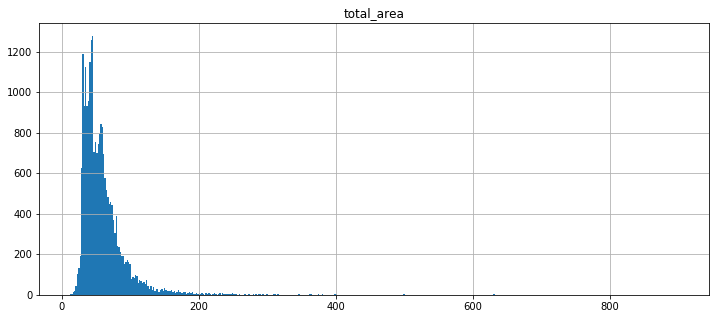

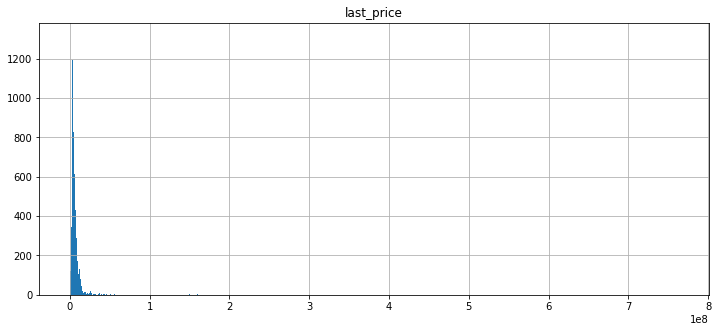

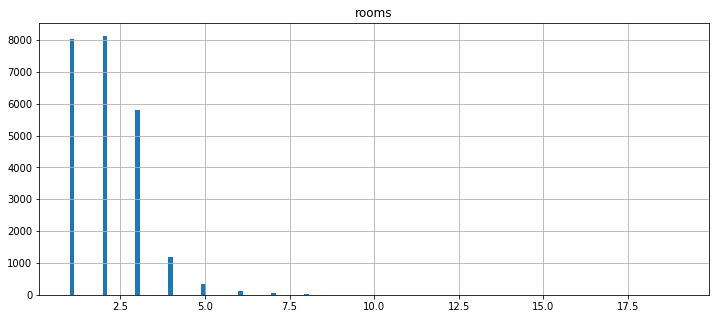

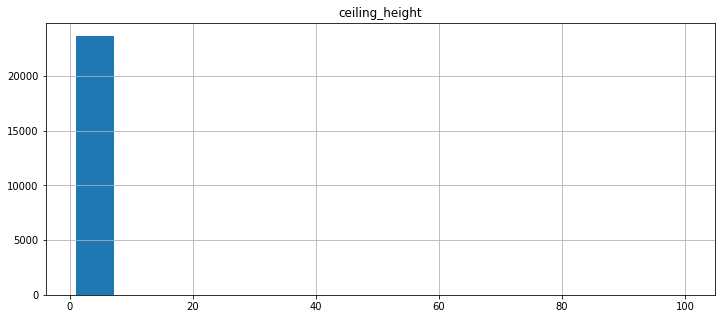

In [169]:
#построим гистограммы для параметров "площадь", "цена", "число комнат", "высота потолков", используя цикл
for item in ['total_area', 'last_price', 'rooms', 'ceiling_height']:
    df.hist(item, figsize=(12,5), bins = 'auto')

##### Вывод

Для каждого параметра, используя цикл for, построим гистограмму методом hist(). 
На всех гистограммах отображается длинный хвост на высоких значениях и пиковые значения на малых. 
Рассмотрим каждый параметр отдельно.

##### Параметр "Площадь"

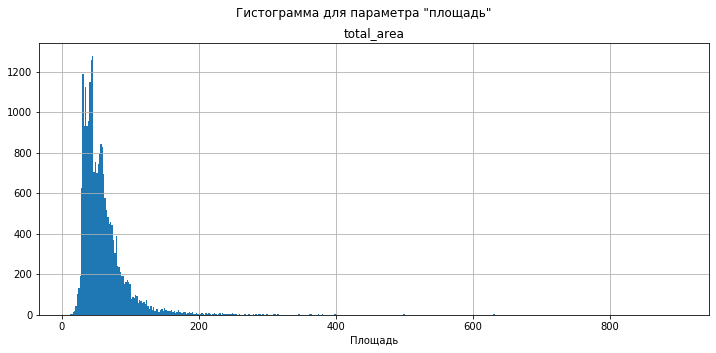

In [170]:
#построим гистограмму для параметра "площадь"
df.hist('total_area', figsize=(12,5), bins = 'auto')
plt.suptitle('Гистограмма для параметра "площадь"')
plt.xlabel('Площадь')
plt.show()

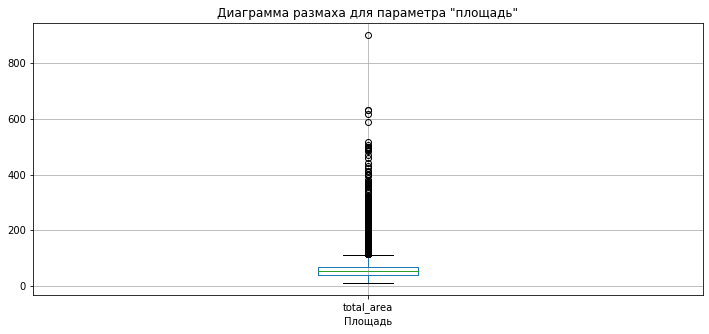

In [171]:
#построим диаграмму размаха или "ящик с усами" для параметра "площадь"
df['total_area'].plot.box(grid=True, title='Диаграмма размаха для параметра "площадь"', figsize=(12,5))
plt.xlabel('Площадь')
plt.show()

(0, 150)

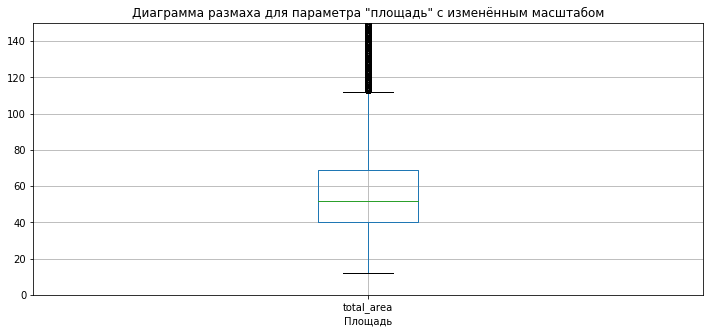

In [172]:
#чтобы лучше разглядеть «ящик с усами», изменим масштаб графика
df['total_area'].plot.box(grid=True, title='Диаграмма размаха для параметра "площадь" с изменённым масштабом',  figsize=(12,5))
plt.xlabel('Площадь')
plt.ylim(0, 150)

In [173]:
#числовое описание данных для столбца total_area 
print('Числовое описание данных для столбца total_area:')
print(df['total_area'].describe())

Числовое описание данных для столбца total_area:
count    23679.000000
mean        60.114827
std         35.668622
min         12.000000
25%         40.000000
50%         52.000000
75%         69.000000
max        900.000000
Name: total_area, dtype: float64


In [174]:
#вычислим межквартильный размах как расстояние между q1 и q3
q1_total_area = df['total_area'].quantile(0.25)
q3_total_area = df['total_area'].quantile(0.75)
iqr_total_area = q3_total_area-q1_total_area

print('Межквартильный размах iqr:')
print(iqr_total_area)
print()

#вычислим размах "усов" влево и вправо от границ "ящика" как 1,5 межквартильного размаха
print('Размах "усов" влево и вправо от границ "ящика":')
print(1.5 * iqr_total_area)

Межквартильный размах iqr:
29.0

Размах "усов" влево и вправо от границ "ящика":
43.5


In [175]:
#уберём выбросы при помощи метода query()
df = df.query('total_area <= @q3_total_area + 1.5*@iqr_total_area')

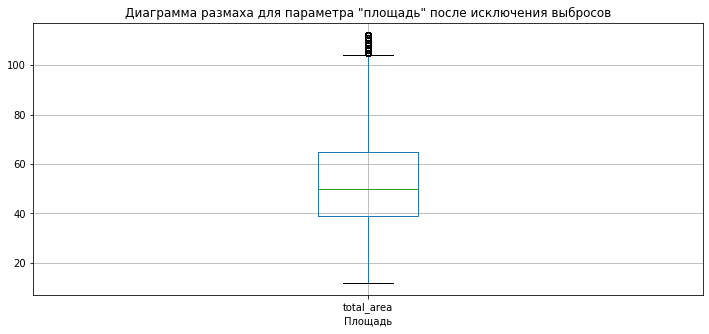

In [176]:
#построим диаграмму размаха для параметра "площадь" после исключения выбросов 
df['total_area'].plot.box(grid=True, title='Диаграмма размаха для параметра "площадь" после исключения выбросов', figsize=(12,5))
plt.xlabel('Площадь')
plt.show()

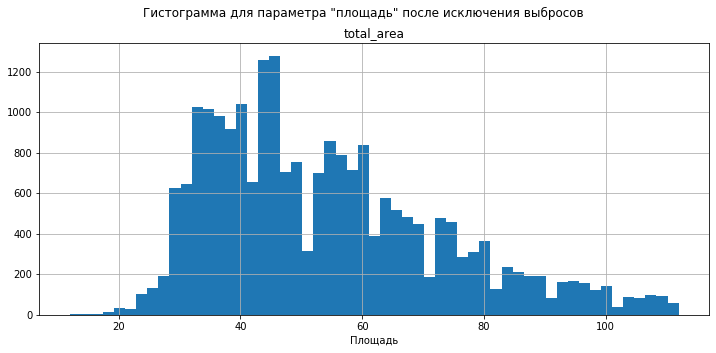

In [177]:
#построим гистограмму для параметра "площадь" после исключения выбросов
df.hist('total_area', figsize=(12,5), bins = 'auto')
plt.suptitle('Гистограмма для параметра "площадь" после исключения выбросов')
plt.xlabel('Площадь')
plt.show()

In [178]:
#числовое описание данных для столбца total_area после исключения выбросов 
print('Числовое описание данных для столбца total_area после исключения выбросов:')
print(df['total_area'].describe())

Числовое описание данных для столбца total_area после исключения выбросов:
count    22372.000000
mean        53.947747
std         19.139963
min         12.000000
25%         39.000000
50%         50.000000
75%         65.000000
max        112.000000
Name: total_area, dtype: float64


In [179]:
#сгруппируем по количеству комнат, посмотрим количество в каждой группе, медианное и среднее значение для каждой группы
df.groupby('rooms')['total_area'].agg(['count', 'median', 'mean'])

,count,median,mean
rooms,,,
1,8036,36,37.280612
2,8086,52,54.555281
3,5409,71,73.051211
4,764,85,83.362565
5,67,100,95.044776
6,9,102,100.777778
7,1,100,100.000000


##### Вывод

Для параметра "Площадь" построим гистограмму методом hist(). Гистограмма отображается с длинным хвостом на высоких значениях и и пиковым значением на малых.

Для отделения хвоста или выбросов от нормальных значений построим диаграмму размаха или "ящик с усами" при помощи метода plot.box() и рассмотрим межквартильный размах. Чтобы лучше разглядеть «ящик с усами», изменим масштаб диаграммы размаха, ограничив диапазон по вертикали значениями 0 и 150. На диаграмме размаха отображаются выбросы выше размаха "усов".

Далее рассмотрим числовое описание данных для столбца 'total_area', используя метод describe():
 - первый квартиль q1 (число, отделяющее первую четверть выборки): 40;
 - медиана или второй квартиль q2: 52;
 - третий квартиль q3 (отсечка трёх четвертей): 69;
 - максимальное значение: 900;
 - минимальное значение: 12.

Вычислим межквартильный размах iqr как расстояние между q1 и q3. iqr равен 29. Размах "усов" влево и вправо от границ "ящика" равен 1.5 межквартильным размахам или 43.5.
Уберём выбросы при помощи метода query() и оставим только нормальные значения, которые попадают в размах "усов".

После исключения выбросов построим гистограмму и диаграмму размаха. Гистограмма похожа на график нормального распределения. На гистограмме отсутствует хвост, на диаграмме размаха есть незначительные выбросы в связи с тем, что медиана сместилась, соответственно смещается расчёт межквартильного размаха. Данные выбросы исключать не будем. 

В соответствии с числовым описанием после исключения выбросов можем сделать вывод, что обычно на продажу выставляют квартиры площадью 50 м². А в соответствии со сводной таблицей такая площадь относится к двухкомнатным квартирам. 

Максимальное значение площади квартиры после исключения выбросов  - 112 м², минимальное значение площади квартиры не изменилось - 12 м².

##### Параметр "Цена"

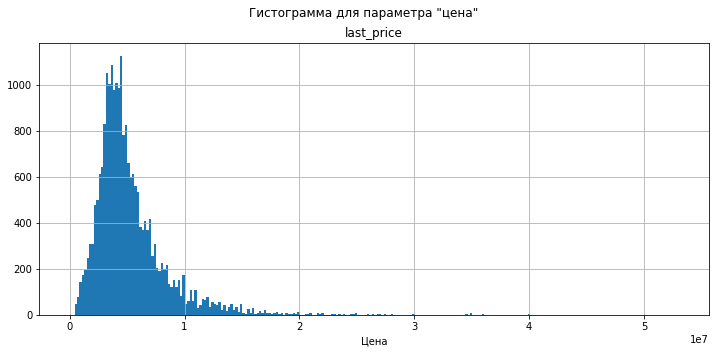

In [180]:
#построим гистограмму для параметра "цена"
df.hist('last_price', figsize=(12,5), bins = 'auto')
plt.suptitle('Гистограмма для параметра "цена"')
plt.xlabel('Цена')
plt.show()

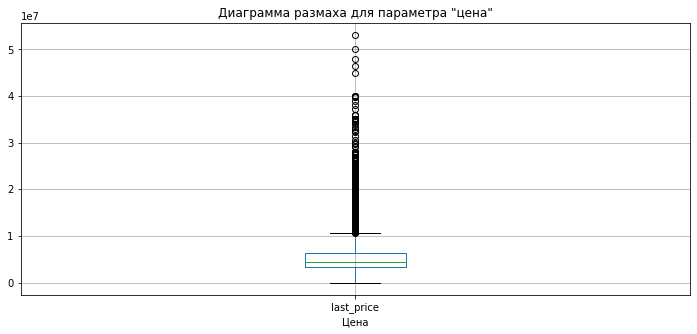

In [181]:
#построим диаграмму размаха или "ящик с усами" для параметра "цена"
df['last_price'].plot.box(grid=True, title='Диаграмма размаха для параметра "цена"', figsize=(12,5))
plt.xlabel('Цена')
plt.show()

(0, 20000000)

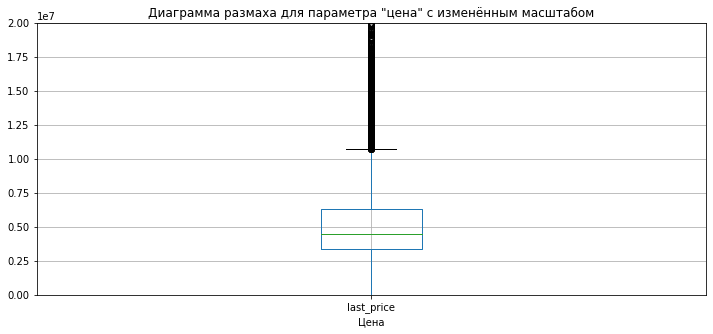

In [182]:
#чтобы лучше разглядеть «ящик с усами», изменим масштаб графика
df['last_price'].plot.box(grid=True, title='Диаграмма размаха для параметра "цена" с изменённым масштабом',  figsize=(12,5))
plt.xlabel('Цена')
plt.ylim(0, 20000000)

In [183]:
#числовое описание данных для столбца last_price 
print('Числовое описание данных для столбца last_price:')
print(df['last_price'].describe())

Числовое описание данных для столбца last_price:
count    2.237200e+04
mean     5.278698e+06
std      3.314185e+06
min      1.219000e+04
25%      3.350000e+06
50%      4.500000e+06
75%      6.290000e+06
max      5.300000e+07
Name: last_price, dtype: float64


In [184]:
#вычислим межквартильный размах как расстояние между q1 и q3
q1_last_price = df['last_price'].quantile(0.25)
q3_last_price = df['last_price'].quantile(0.75)
iqr_last_price = q3_last_price-q1_last_price

print('Межквартильный размах iqr:')
print(iqr_last_price)
print()

#вычислим размах "усов" влево и вправо от границ "ящика" как 1,5 межквартильного размаха
print('Размах "усов" влево и вправо от границ "ящика":')
print(1.5 * iqr_last_price)

Межквартильный размах iqr:
2940000.0

Размах "усов" влево и вправо от границ "ящика":
4410000.0


In [185]:
#уберём выбросы при помощи метода query()
df = df.query('last_price <= @q3_last_price + 1.5*@iqr_last_price')

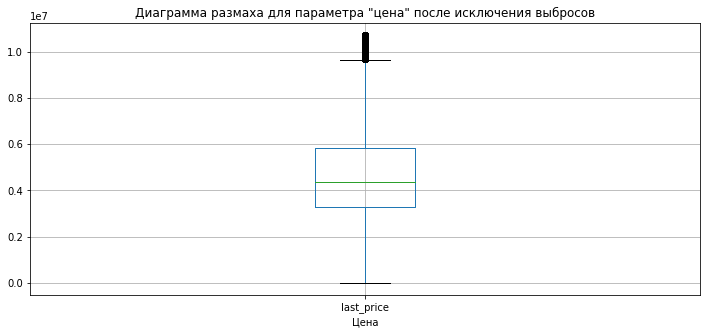

In [186]:
#построим диаграмму размаха для параметра "цена" после исключения выбросов 
df['last_price'].plot.box(grid=True, title='Диаграмма размаха для параметра "цена" после исключения выбросов', figsize=(12,5))
plt.xlabel('Цена')
plt.show()

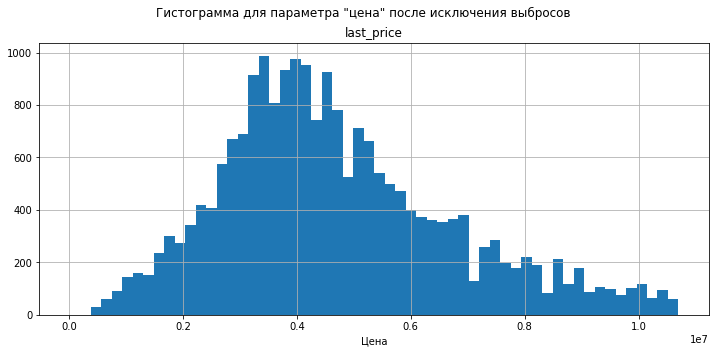

In [187]:
#построим гистограмму для параметра "цена" после исключения выбросов
df.hist('last_price', figsize=(12,5), bins = 'auto')
plt.suptitle('Гистограмма для параметра "цена" после исключения выбросов')
plt.xlabel('Цена')
plt.show()

In [188]:
#числовое описание данных для столбца last_price после исключения выбросов 
print('Числовое описание данных для столбца last_price после исключения выбросов:')
print(df['last_price'].describe())

Числовое описание данных для столбца last_price после исключения выбросов:
count    2.108200e+04
mean     4.696606e+06
std      2.035467e+06
min      1.219000e+04
25%      3.300000e+06
50%      4.350000e+06
75%      5.850000e+06
max      1.070000e+07
Name: last_price, dtype: float64


In [189]:
#сгруппируем по количеству комнат, посмотрим количество в каждой группе, медианное и среднее значение для каждой группы
df.groupby('rooms')['last_price'].agg(['count', 'median', 'mean'])

,count,median,mean
rooms,,,
1,7983,3599000,3.741860e+06
2,7656,4600000,4.854154e+06
3,4732,5600000,5.788482e+06
4,647,6500000,6.382698e+06
5,60,7590000,7.098333e+06
6,4,7982000,8.141000e+06


##### Вывод

Для параметра "Цена" построим гистограмму методом hist(). Гистограмма отображается с длинным хвостом на высоких значениях и пиковым значением на малых.

Для отделения хвоста или выбросов от нормальных значений построим диаграмму размаха или "ящик с усами" при помощи метода plot.box() и рассмотрим межквартильный размах. Чтобы лучше разглядеть «ящик с усами», изменим масштаб диаграммы размаха, ограничив диапазон по вертикали значениями 0 и 20 000 000. На диаграмме размаха отображаются выбросы выше размаха "усов".

Далее рассмотрим числовое описание данных для столбца 'last_price', используя метод describe():
 - первый квартиль q1: 3 350 000;
 - медиана или второй квартиль q2: 4 500 000;
 - третий квартиль q3: 6 290 000;
 - максимальное значение: 5 300 000 000;
 - минимальное значение: 12 190.

Вычислим межквартильный размах iqr как расстояние между q1 и q3. iqr равен 2 940 000. Размах "усов" влево и вправо от границ "ящика" равен 1.5 межквартильным размахам или 4 410 000.
Уберём выбросы при помощи метода query() и оставим только нормальные значения, которые попадают в размах "усов".

После исключения выбросов построим гистограмму и диаграмму размаха. Гистограмма похожа на график нормального распределения. На гистограмме отсутствует хвост, на диаграмме размаха есть незначительные выбросы в связи с тем, что медиана сместилась, соответственно смещается расчёт межквартильного размаха. Данные выбросы исключать не будем. 

В соответствии с числовым описанием после исключения выбросов можем сделать вывод, что обычно на продажу выставляют квартиры стоимостью 4 350 000. А в соответствии со сводной таблицей такая площадь относится к двухкомнатным квартирам. 

После исключения выбросов максимальное значение цены после исключения выбросов - 1 070 000 000, минимальное значение цены не изменилось - 12 190.

##### Параметр "Число комнат"

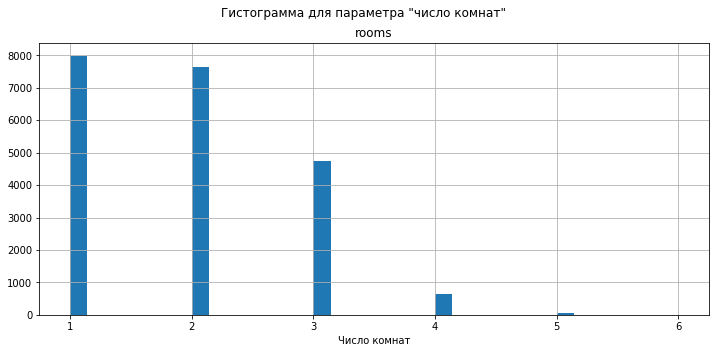

In [190]:
#построим гистограмму для параметра "число комнат"
df.hist('rooms', figsize=(12,5), bins = 'auto')
plt.suptitle('Гистограмма для параметра "число комнат"')
plt.xlabel('Число комнат')
plt.show()

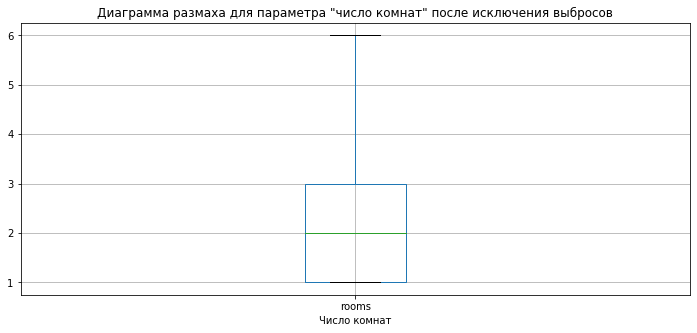

In [191]:
#построим диаграмму размаха или "ящик с усами" для параметра "число комнат"
df['rooms'].plot.box(grid=True, title='Диаграмма размаха для параметра "число комнат" после исключения выбросов', figsize=(12,5))
plt.xlabel('Число комнат')
plt.show()

In [192]:
#числовое описание данных для столбца rooms 
print('Числовое описание данных для столбца rooms:')
print(df['rooms'].describe())

Числовое описание данных для столбца rooms:
count    21082.000000
mean         1.916469
std          0.864632
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: rooms, dtype: float64


In [193]:
#выделим уникальные значения в столбце rooms
print('Уникальные значения в столбце rooms:')
df['rooms'].value_counts()

Уникальные значения в столбце rooms:


1    7983
2    7656
3    4732
4     647
5      60
6       4
Name: rooms, dtype: int64

##### Вывод

Для параметра "Число комнат" построим гистограмму методом hist(). 
Гистограмма отличается от гистограммы, которая была построена для данного параметра ранее, до обработки выбросов для параметров "площадь" и "цена". 
При построении диаграммы размаха или "ящика с усами" видим, что выбросы для параметра "число комнат" отсутствуют. Значит, выбросы были исключены вместе с исключением выбросов для параметров "площадь" и "цена". Корректировки вносить не будем.

В соответствии с числовым описанием после исключения выбросов можем сделать вывод, что обычно на продажу выставляют двухкомнатные квартиры.

Максимальное значение числа комнат после исключения выбросов - 6 (а не 19, как было ранее).
Минимальное значение числа комнат - 1.

##### Параметр "Высота потолков"

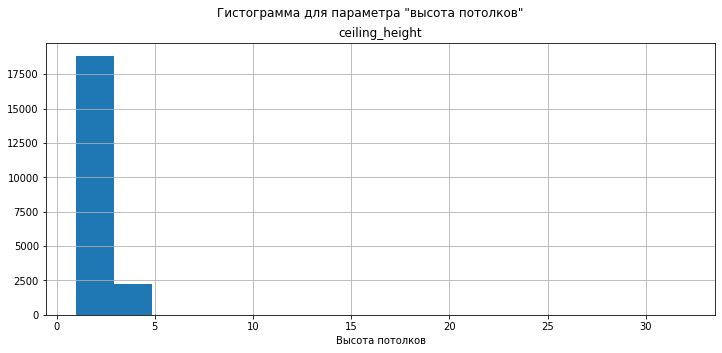

In [194]:
#построим гистограмму для параметра "высота потолков"
df.hist('ceiling_height', figsize=(12,5), bins = 'auto')
plt.suptitle('Гистограмма для параметра "высота потолков"')
plt.xlabel('Высота потолков')
plt.show()

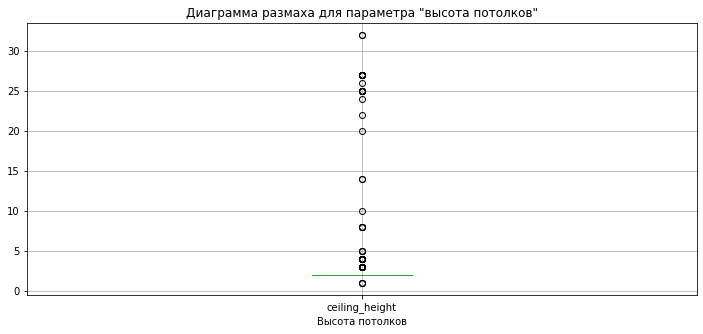

In [195]:
#построим диаграмму размаха или "ящик с усами" для параметра "высота потолков"
df['ceiling_height'].plot.box(grid=True, title='Диаграмма размаха для параметра "высота потолков"', figsize=(12,5))
plt.xlabel('Высота потолков')
plt.show()

In [196]:
#числовое описание данных для столбца ceiling_height 
print('Числовое описание данных для столбца ceiling_height:')
print(df['ceiling_height'].describe())

Числовое описание данных для столбца ceiling_height:
count    21082.000000
mean         2.134997
std          0.853864
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max         32.000000
Name: ceiling_height, dtype: float64


In [197]:
#вычислим межквартильный размах как расстояние между q1 и q3
q1_ceiling_height = df['ceiling_height'].quantile(0.25)
q3_ceiling_height = df['ceiling_height'].quantile(0.75)
iqr_ceiling_height = q3_ceiling_height-q1_ceiling_height

print('Межквартильный размах iqr:')
print(iqr_ceiling_height)
print()

#вычислим размах "усов" влево и вправо от границ "ящика" как 1,5 межквартильного размаха
print('Размах "усов" влево и вправо от границ "ящика":')
print(1.5 * iqr_ceiling_height)

Межквартильный размах iqr:
0.0

Размах "усов" влево и вправо от границ "ящика":
0.0


In [198]:
#выделим уникальные значения в столбце ceiling_height
print('Уникальные значения в столбце ceiling_height:')
df['ceiling_height'].value_counts()

Уникальные значения в столбце ceiling_height:


2     18824
3      2192
4        31
27        9
25        7
8         4
5         3
1         3
14        2
32        2
26        1
10        1
24        1
22        1
20        1
Name: ceiling_height, dtype: int64

In [199]:
#сгруппируем по количеству комнат, посмотрим количество в каждой группе, медианное и среднее значение для каждой группы
df.groupby('rooms')['ceiling_height'].agg(['count', 'median', 'mean'])

,count,median,mean
rooms,,,
1,7983,2.0,2.084179
2,7656,2.0,2.158438
3,4732,2.0,2.161665
4,647,2.0,2.267388
5,60,2.0,2.350000
6,4,2.5,2.500000


##### Вывод

Для параметра "Высота потолков" построим гистограмму методом hist().
Гистограмма отображается с длинным хвостом на высоких значениях и пиковым значением на малых.
Однако, при построении диаграммы размаха или "ящика с усами" после исключения выбросов для параметров "площадь" и "цена" видим, что выбросы для параметра "высота потолков" незначительные. Межквартильный размах и размах "усов" влево и вправо от границ "ящика" равны нулю. Корректировки вносить не будем.

В соответствии с числовым описанием после исключения выбросов можем сделать вывод, что обычно на продажу выставляют квартиры с высотой потолка 2 м.

Максимальное значение высоты потолков  - 32 м.
Минимальное значение высоты потолков  - 1 м.

#### Вывод

На данном шаге изучили следующие параметры: площадь, цена, число комнат, высота потолков.

Для каждого параметра построили гистограмму методом hist() и диаграмму размаха или "ящик с усами" методом plot.box().
Рассмотрели межквартильный размах и числовое описание данных для каждого параметра.
Для параметров "площадь" и "цена" отделили выбросы от нормальных значений при помощи метода query(). Для параметров "число комнат" и "высота потолков" корректировки не вносили. т.к. для данных параметров выбросы были исключены вместе с исключением выбросов для параметров "площадь" и "цена". 

Таким образом, можем сделать вывод, что обычно на продажу выставляют двухкомнатные квартиры площадью 50 м² стоимостью 4 350 000 с высотой потолка 2 м.

#### 4.2 Изучим время продажи квартиры. Построим гистограмму. Посчитаем среднее и медиану. Опишем, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго.

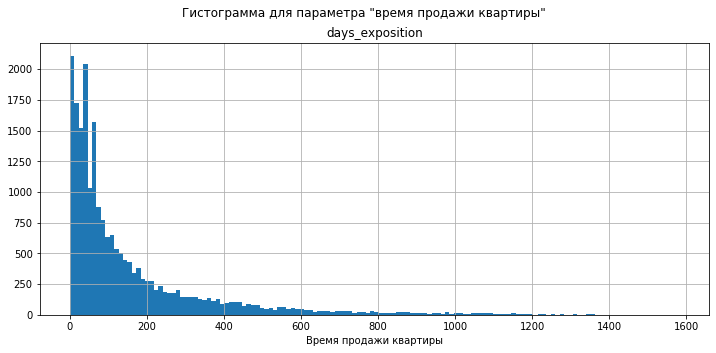

In [200]:
#построим гистограмму для параметра "время продажи квартиры"
df.hist('days_exposition', figsize=(12,5), bins = 'auto')
plt.suptitle('Гистограмма для параметра "время продажи квартиры"')
plt.xlabel('Время продажи квартиры')
plt.show()

In [201]:
#числовое описание данных для столбца days_exposition 
print('Числовое описание данных для столбца days_exposition:')
print(df['days_exposition'].describe())

Числовое описание данных для столбца days_exposition:
count    21082.000000
mean       156.896025
std        202.167621
min          1.000000
25%         35.000000
50%         76.000000
75%        194.000000
max       1580.000000
Name: days_exposition, dtype: float64


In [202]:
#сгруппируем по количеству комнат, посмотрим количество в каждой группе, медианное и среднее значение для каждой группы
df.groupby('rooms')['days_exposition'].agg(['count', 'median', 'mean'])

,count,median,mean
rooms,,,
1,7983,71.0,148.503570
2,7656,75.0,152.379441
3,4732,88.0,173.377008
4,647,99.0,186.035549
5,60,121.0,242.033333
6,4,64.5,63.500000


#### Вывод

На данном шаге изучили параметр "время продажи квартиры", построили гистограмму методом hist(). Гистограмма отображается с длинным хвостом на высоких значениях и пиковым значением на малых. 

Рассмотрим числовое описание данных для столбца 'days_exposition', используя метод describe(). Среднее и медианное значение времени продажи квартиры:
- Среднее время продажи квартиры составляет 156 дней;
- Медианное значение времени продажи квартиры составляет 76 дней.

Сгруппируем данные по количеству комнат и посмотрим среднее и медианное значение для каждой группы. 
Для двухкомнатных квартир медианное значение почти совпадает с медианным для столбца и составляет 75 дней или два с половиной месяца.

Для пятикомнатных квартир медианное время продажи больше остальных и составляет 121 день, а для шестикомнатных квартир, наоборот, меньше, и составляет 78 дней. Но количество пяти- и шестикомнатных квартир незначительно по отношению к остальным.
Поэтому будем ориентироваться на медианное значение для всего столбца и считать, что обычно продажа занимает 76  дней.

Для ответа на вопрос "Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?" на следующем шаге построим диаграмму размаха или "ящик с усами" и посчитаем размах "усов".

#### 4.3 Уберём редкие и выбивающиеся значения. Опишем, какие особенности обнаружили.

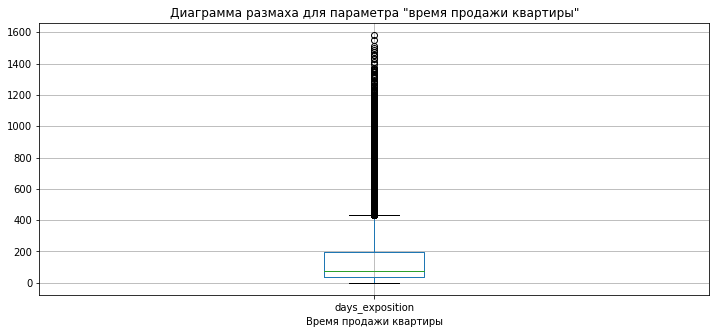

In [203]:
#построим диаграмму размаха или "ящик с усами" для параметра "время продажи квартиры"
df['days_exposition'].plot.box(grid=True, title='Диаграмма размаха для параметра "время продажи квартиры"', figsize=(12,5))
plt.xlabel('Время продажи квартиры')
plt.show()

(0, 300)

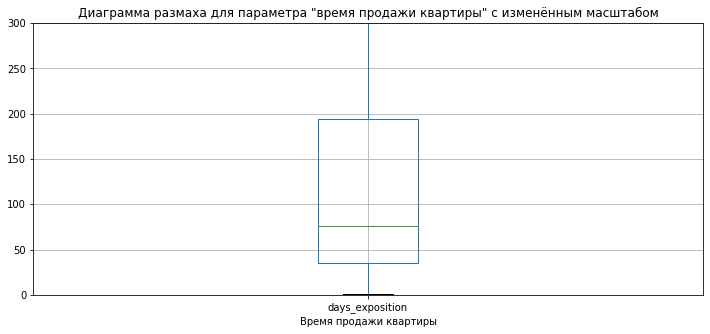

In [204]:
#чтобы лучше разглядеть «ящик с усами», изменим масштаб графика
df['days_exposition'].plot.box(grid=True, title='Диаграмма размаха для параметра "время продажи квартиры" с изменённым масштабом', figsize=(12,5))
plt.xlabel('Время продажи квартиры')
plt.ylim(0, 300)

In [205]:
#вычислим межквартильный размах как расстояние между q1 и q3
q1_days_exposition = df['days_exposition'].quantile(0.25)
q3_days_exposition = df['days_exposition'].quantile(0.75)
iqr_days_exposition = q3_days_exposition-q1_days_exposition

print('Межквартильный размах iqr:')
print(iqr_days_exposition)
print()

#вычислим размах "усов" влево и вправо от границ "ящика" как 1,5 межквартильного размаха
print('Размах "усов" влево и вправо от границ "ящика":')
print(1.5 * iqr_days_exposition)

Межквартильный размах iqr:
159.0

Размах "усов" влево и вправо от границ "ящика":
238.5


In [206]:
#уберём выбросы при помощи метода query()
df = df.query('days_exposition <= @q3_days_exposition + 1.5*@iqr_days_exposition')

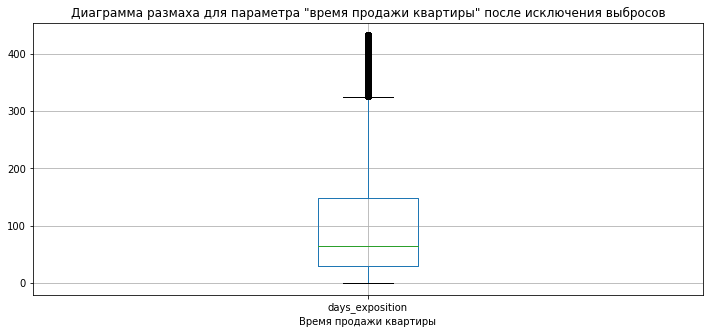

In [207]:
#построим диаграмму размаха после исключения выбросов 
df['days_exposition'].plot.box(grid=True, title='Диаграмма размаха для параметра "время продажи квартиры" после исключения выбросов',  figsize=(12,5))
plt.xlabel('Время продажи квартиры')
plt.show()

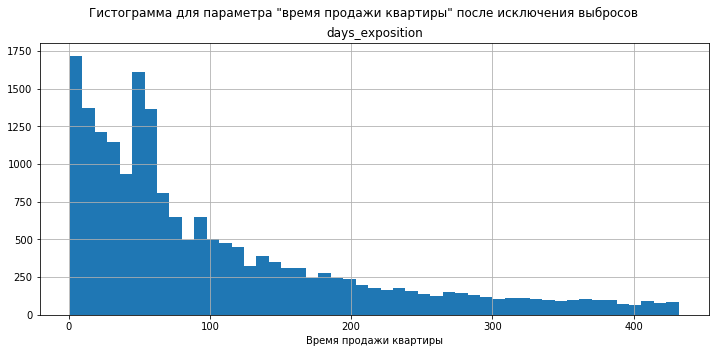

In [208]:
#построим гистограмму для параметра "время продажи квартиры" после исключения выбросов 
df.hist('days_exposition', figsize=(12,5), bins = 'auto')
plt.suptitle('Гистограмма для параметра "время продажи квартиры" после исключения выбросов')
plt.xlabel('Время продажи квартиры')
plt.show()

In [209]:
#вычислим межквартильный размах как расстояние между q1 и q3 ещё раз для обновлённых данных
q1_days_exposition = df['days_exposition'].quantile(0.25)
q3_days_exposition = df['days_exposition'].quantile(0.75)
iqr_days_exposition = q3_days_exposition-q1_days_exposition

print('Межквартильный размах iqr:')
print(iqr_days_exposition)
print()

#вычислим размах "усов" влево и вправо от границ "ящика" как 1,5 межквартильного размаха
print('Размах "усов" влево и вправо от границ "ящика":')
print(1.5 * iqr_days_exposition)

Межквартильный размах iqr:
118.0

Размах "усов" влево и вправо от границ "ящика":
177.0


In [210]:
#уберём выбросы при помощи метода query()
df = df.query('days_exposition <= @q3_days_exposition + 1.5*@iqr_days_exposition')

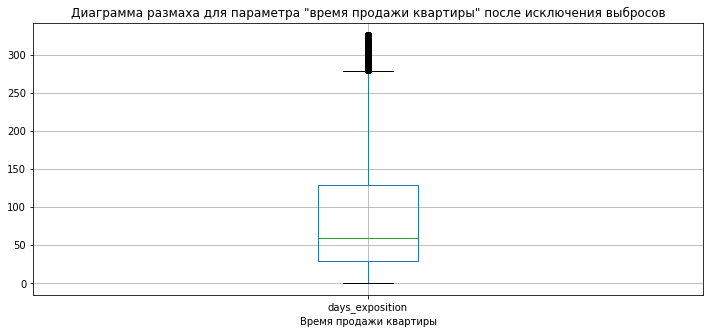

In [211]:
#построим диаграмму размаха после исключения выбросов 
df['days_exposition'].plot.box(grid=True, title='Диаграмма размаха для параметра "время продажи квартиры" после исключения выбросов', figsize=(12,5))
plt.xlabel('Время продажи квартиры')
plt.show()

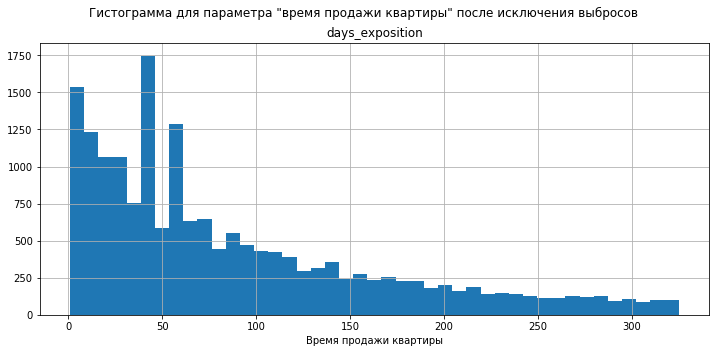

In [212]:
#построим гистограмму для параметра "время продажи квартиры" после исключения выбросов 
df.hist('days_exposition', figsize=(12,5), bins = 'auto')
plt.suptitle('Гистограмма для параметра "время продажи квартиры" после исключения выбросов')
plt.xlabel('Время продажи квартиры')
plt.show()

In [213]:
#числовое описание данных для столбца days_exposition после исключения выбросов 
print('Числовое описание данных для столбца days_exposition после исключения выбросов :')
print(df['days_exposition'].describe())

Числовое описание данных для столбца days_exposition после исключения выбросов :
count    18069.000000
mean        88.391665
std         78.415243
min          1.000000
25%         29.000000
50%         60.000000
75%        129.000000
max        325.000000
Name: days_exposition, dtype: float64


In [214]:
#сгруппируем по количеству комнат, 
#посмотрим количество в каждой группе, медианное и среднее значение для каждой группы после исключения выбросов
df.groupby('rooms')['days_exposition'].agg(['count', 'median', 'mean'])

,count,median,mean
rooms,,,
1,6927,59.0,85.484770
2,6614,60.0,87.430904
3,3941,64.0,92.912459
4,539,71.0,103.391466
5,44,85.5,104.045455
6,4,64.5,63.500000


#### Вывод

Для отделения хвоста или выбросов от нормальных значений построим диаграмму размаха или "ящик с усами" при помощи метода plot.box() и рассмотрим межквартильный размах. Чтобы лучше разглядеть «ящик с усами», изменим масштаб диаграммы размаха, ограничив диапазон по вертикали значениями 0 и 300. На диаграмме размаха отображаются выбросы выше размаха "усов".

В соответствии с числовым описанием данных для столбца 'days_exposition' из шага 4.2:
 - первый квартиль q1: 45;
 - медиана или второй квартиль q2: 95;
 - третий квартиль q3: 190;
 - максимальное значение: 1580;
 - минимальное значение: 1.

Вычислим межквартильный размах iqr как расстояние между q1 и q3. iqr равен 159. Размах "усов" влево и вправо от границ "ящика" равен 1.5 межквартильным размахам или 238.5.
Уберём выбросы при помощи метода query() и оставим только нормальные значения, которые попадают в размах "усов".

После исключения выбросов построим гистограмму и диаграмму размаха. На гистограмме отсутствует хвост, на диаграмме размаха есть выбросы в связи с тем, что медиана сместилась, соответственно смещается расчёт межквартильного размаха. Однако, гистаграмма не очень похожа на график нормального распределения. Поэтому ещё раз проведём обработку выбросов. После повторной обработки форма гистограммы приблизилась к форме колокола. Больше корректировки вносить не будем. 

В соответствии с числовым описанием после исключения выбросов можем сделать вывод, что обычно время продажи  квартиры составляет 60 дней. 
Будем считать, что продажи прошли очень быстро, если время продажи квартиры меньше q1 или 29 дней, и что продажи прошли необычно долго, если время продажи квартиры больше q3 или 129 дней.

Максимальное время продажи квартиры после исключения выбросов - 325 дней, минимальное время продажи квартиры - 1 день.

#### 4.4 Изучим, какие факторы больше всего влияют на стоимость квартиры. Изучим,  зависит ли цена от площади, числа комнат, удалённости от центра. Изучим зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучим зависимость от даты размещения: дня недели, месяца и года.

##### Зависимость цены от площади

In [215]:
#рассчитаем коэффициент корреляции Пирсона 
print(df['total_area'].corr(df['last_price']))

0.6743803083481963


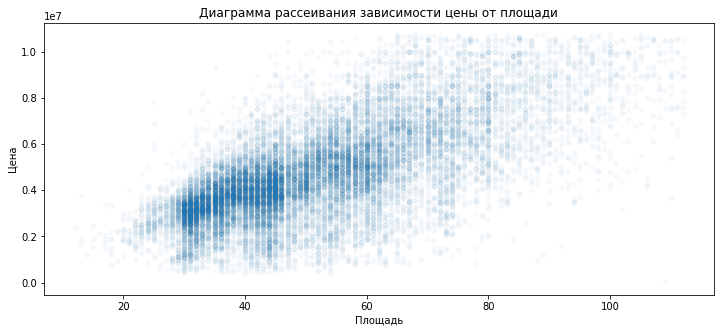

In [216]:
#построим диаграмму рассеивания 
df.plot(x='total_area', y='last_price', 
            kind ='scatter', alpha = 0.03, figsize=(12,5), title='Диаграмма рассеивания зависимости цены от площади')
plt.xlabel('Площадь')
plt.ylabel('Цена')
plt.show()

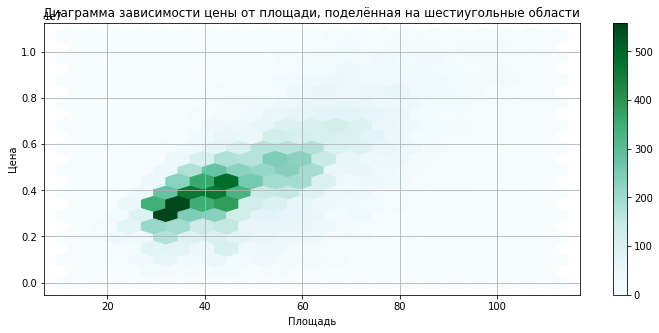

In [217]:
#построим диаграмму, поделённую на шестиугольные области
df.plot(x='total_area', y='last_price', kind='hexbin', gridsize=20, sharex=False, grid=True, figsize=(12,5),
        title='Диаграмма зависимости цены от площади, поделённая на шестиугольные области')
plt.xlabel('Площадь')
plt.ylabel('Цена')
plt.show()

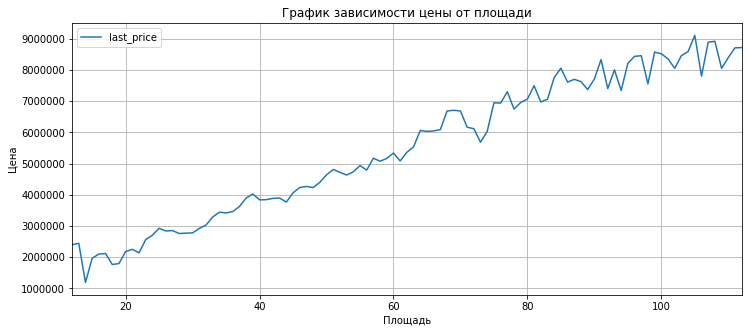

In [218]:
#построим график, используя группировку с pivot_table
df.pivot_table(index ='total_area', values = 'last_price').plot(grid = True, 
                                                                figsize = (12,5),
                                                                title='График зависимости цены от площади')
plt.xlabel('Площадь')
plt.ylabel('Цена')
plt.show()

##### Вывод

Для изучения зависимости цены от площади рассчитаем коэффициент корреляции Пирсона при помощи метода corr(). Коэффициент корреляции положительный и равен 0.67, что говорит о том, что есть взаимозависимость цены и площади: с ростом площади возрастает цена, и с ростом цены возрастает площадь, что ожидаемо.

Далее построим диаграмму рассеивания при помощи метода plot(). Параметру kind передадим значение scatter, параметру alpha передадим значение 0.03. На диаграмме рассеивания видим, что есть основная масса точек с наиболее частыми сочетаниями площади и цены. При этом с увеличением площади увеличивается и цена, что ожидаемо в соответствии с полученным коэффициентом корреляции. 
Однако, можно найти уникальные примеры с большой площадью и низкой ценой или небольшой площадью и высокой ценой.
Есть пустые зоны: например, квартиры площадью 100 м² не стоят меньше 2 000 000 или квартиры площадью 20 м² не стоят больше 6 000 000.

После построим диаграмму, поделённую на шестиугольные области (соты), при помощи метода plot(). Параметру kind передадим значение hexbin. На диаграмме с сотами отображется не однородное пятно, а определённая структура данных. В самой «густой» зоне квартиры площадью от 20 до 40 м² и стомостью от 2 000 000 до 4 000 000.

В завершении построим график, используя группировку с pivot_table. Данный график также подтвержает зависимость цены и площади: с ростом площади возрастает цена.

##### Зависимость цены от числа комнат

In [219]:
#рассчитаем коэффициент корреляции Пирсона 
print(df['rooms'].corr(df['last_price']))

0.4164793011862052


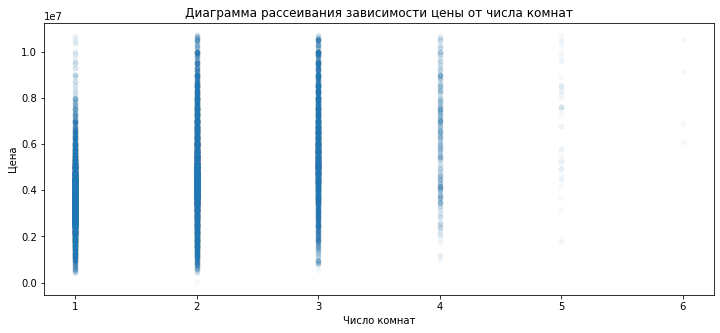

In [220]:
#построим диаграмму рассеивания 
df.plot(x='rooms', y='last_price', 
            kind ='scatter', alpha = 0.03, figsize=(12,5),
        title='Диаграмма рассеивания зависимости цены от числа комнат')
plt.xlabel('Число комнат')
plt.ylabel('Цена')
plt.show()

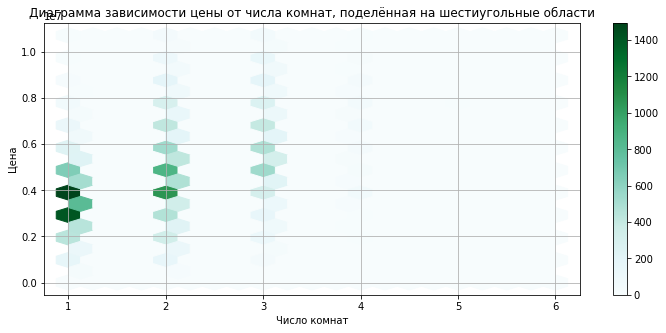

In [221]:
#построим диаграмму, поделённую на шестиугольные области
df.plot(x='rooms', y='last_price', kind='hexbin', gridsize=20, figsize=(12, 5), sharex=False, grid=True,
        title='Диаграмма зависимости цены от числа комнат, поделённая на шестиугольные области')
plt.xlabel('Число комнат')
plt.ylabel('Цена')
plt.show() 

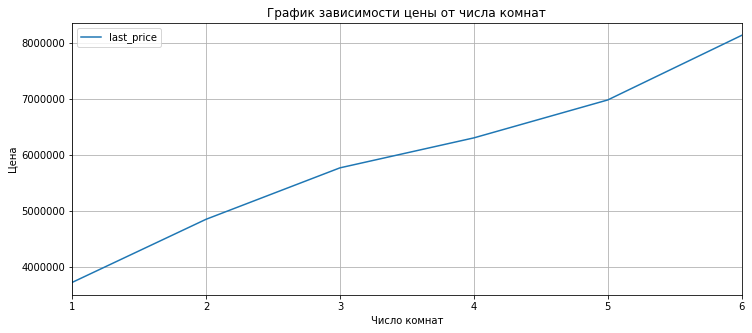

In [222]:
#построим график, используя группировку с pivot_table
df.pivot_table(index ='rooms', values = 'last_price').plot(grid = True, figsize = (12,5),
                                                                title='График зависимости цены от числа комнат')
plt.xlabel('Число комнат')
plt.ylabel('Цена')
plt.show()

##### Вывод

Для изучения зависимости цены от числа комнат рассчитаем коэффициент корреляции Пирсона при помощи метода corr(). Коэффициент корреляции положительный и равен 0.41, что говорит о том, что взаимозависимость цены и числа комнат есть, однако не слишком сильная.

Далее построим диаграмму рассеивания при помощи метода plot(). Параметру kind передадим значение scatter, параметру alpha передадим значение 0.03. На диаграмме рассеивания видим, что для разного количества комнат структура данных на диаграмме различается. Наиболее плотная масса точек для двухкомнатных квартир.

После построим диаграмму, поделённую на шестиугольные области (соты), при помощи метода plot(). Параметру kind передадим значение hexbin. На диаграмме с сотами, также как и на диаграмме рассеивания, для разного числа комнат структура сот на диаграмме различается. В самой «густой» зоне однокомнатные квартиры стомостью от 2 000 000 до 4 000 000.

В завершении построим график, используя группировку с pivot_table. Данный график подтвержает зависимость цены и числа комнат: с увеличением числа комнат возрастает цена.

##### Зависимость цены от удалённости от центра

In [223]:
#рассчитаем коэффициент корреляции Пирсона 
print(df['city_centers_nearest'].corr(df['last_price']))

-0.32978085391092704


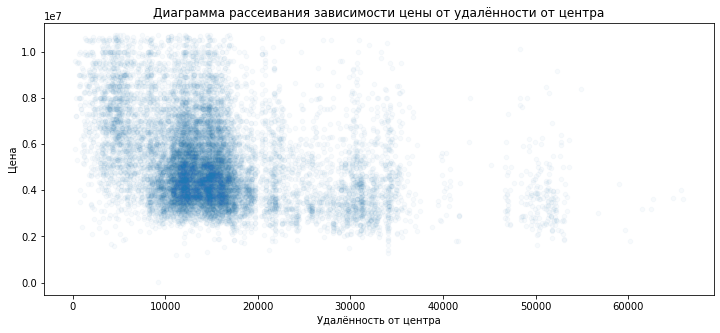

In [224]:
#построим диаграмму рассеивания 
df.plot(x='city_centers_nearest', y='last_price', 
            kind ='scatter', alpha = 0.03, figsize=(12,5),
        title='Диаграмма рассеивания зависимости цены от удалённости от центра')
plt.xlabel('Удалённость от центра')
plt.ylabel('Цена')
plt.show()

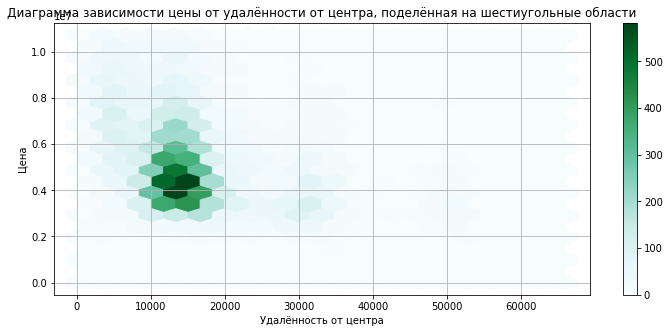

In [225]:
#построим диаграмму, поделённую на шестиугольные области
df.plot(x='city_centers_nearest', y='last_price', kind='hexbin', gridsize=20, figsize=(12, 5), sharex=False, grid=True,
         title='Диаграмма зависимости цены от удалённости от центра, поделённая на шестиугольные области')
plt.xlabel('Удалённость от центра')
plt.ylabel('Цена')
plt.show() 

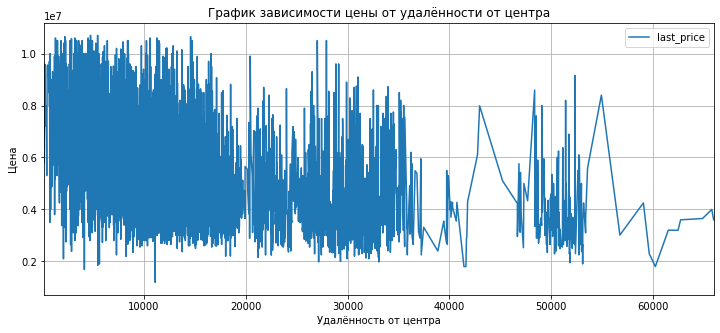

In [226]:
#построим график, используя группировку с pivot_table
df.pivot_table(index ='city_centers_nearest', values = 'last_price').plot(grid = True, figsize = (12,5),
                                                                          title='График зависимости цены от удалённости от центра')
plt.xlabel('Удалённость от центра')
plt.ylabel('Цена')
plt.show()

##### Вывод

Для изучения зависимости цены от удалённости от центра рассчитаем коэффициент корреляции Пирсона при помощи метода corr(). Коэффициент корреляции отрицательный и равен -0.32, что говорит о том, что есть обратная взаимозависимость цены и удалённости от центра: чем дальше расположен объект, тем ниже цена.

Далее построим диаграмму рассеивания при помощи метода plot(). Параметру kind передадим значение scatter, параметру alpha передадим значение 0.03. На диаграмме рассеивания видим, что условно можно разделить на три области, и есть основная масса точек с наиболее частыми сочетаниями удалённости от центра и цены. При этом с увеличением удалённости от центра снижается цена, что ожидаемо в соответствии с полученным коэффициентом корреляции. Также видим обособленную массу точек для значения удалённости в 100 000 м, которым были заполнены пропущенные в столбце 'city_centers_nearest' значения. 

После построим диаграмму, поделённую на шестиугольные области (соты), при помощи метода plot(). Параметру kind передадим значение hexbin. На диаграмме с сотами отображется не однородное пятно, а определённая структура данных. В самой «густой» зоне квартиры, расположенные относительно центра на расстоянии от 10 000 до 20 000 м  стомостью от 4 000 000 до 5 000 000.

В завершении построим график, используя группировку с pivot_table. Получившийся устрашающий график подтвержает обратную зависимость цены и удалённости от центра: чем дальше от центра расположен объект, тем ниже цена.

##### Зависимость цены от того, на каком этаже расположена квартира (первом, последнем или другом)

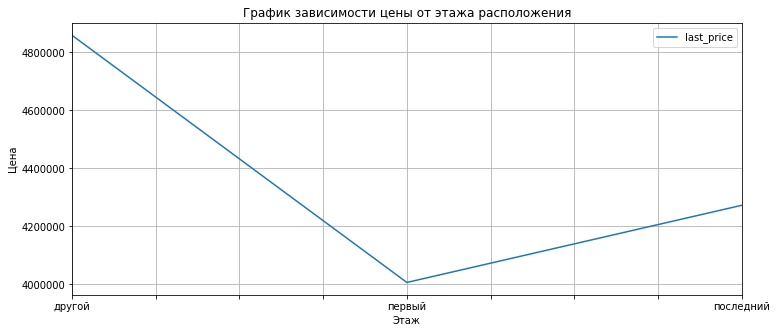

In [227]:
#построим график, используя группировку с pivot_table
df.pivot_table(index ='floor_detail', values = 'last_price').plot(grid = True, figsize = (12,5),
                                                                  title='График зависимости цены от этажа расположения')
plt.xlabel('Этаж')
plt.ylabel('Цена')
plt.show()

In [228]:
#рассчитаем коэффициент корреляции Пирсона 
print(df['floor'].corr(df['last_price']))

0.15086214234484915


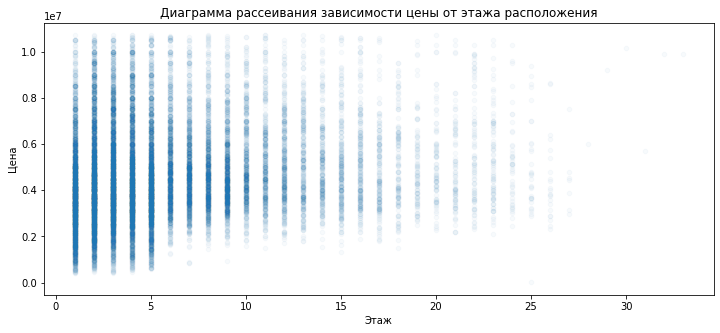

In [229]:
#построим диаграмму рассеивания 
df.plot(x='floor', y='last_price', 
            kind ='scatter', alpha = 0.03, figsize=(12,5),
        title='Диаграмма рассеивания зависимости цены от этажа расположения')
plt.xlabel('Этаж')
plt.ylabel('Цена')
plt.show()

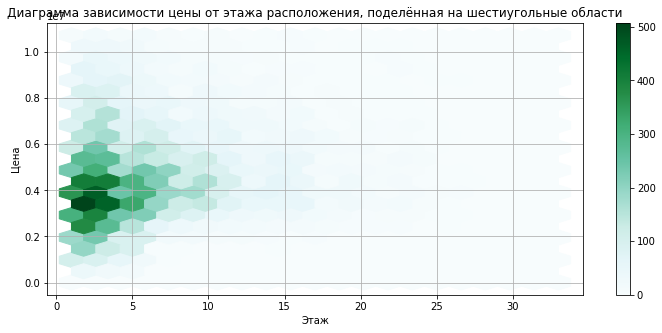

In [230]:
#построим диаграмму, поделённую на шестиугольные области
df.plot(x='floor', y='last_price', kind='hexbin', gridsize=20, figsize=(12, 5), sharex=False, grid=True,
        title='Диаграмма зависимости цены от этажа расположения, поделённая на шестиугольные области')
plt.xlabel('Этаж')
plt.ylabel('Цена')
plt.show() 

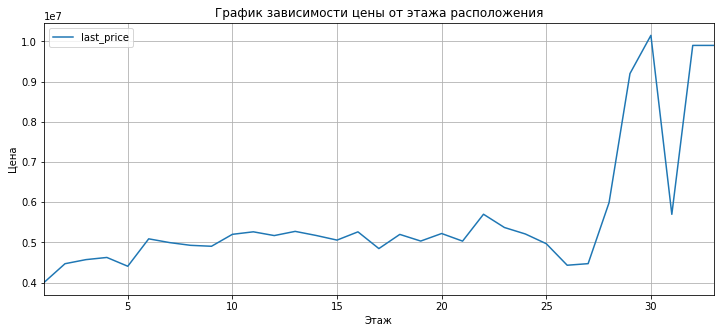

In [231]:
#построим график, используя группировку с pivot_table
df.pivot_table(index ='floor', values = 'last_price').plot(grid = True, figsize = (12,5),
                                                           title='График зависимости цены от этажа расположения')
plt.xlabel('Этаж')
plt.ylabel('Цена')
plt.show()

##### Вывод

В столбце 'floor_detail' значения приведены в формате "первый, последний или другой", подсчитать коэффициент корреляции Пирсона и построить диаграмму рассеивания и диаграмму с сотами не удастся.
Для изучения зависимости цены от значений в столбце 'floor_detail' построим график, используя группировку с pivot_table.

На графике видно, что самая низкая цена у квартир, расположенных на первом этаже, чуть выше у квартир, расположенных на последнем, и самая высокая цена у квартир, расположенных не на первом и не на последнем (т.е на другом) этаже, что также ожидаемо.

Дополнительно рассмотрим взаимосвязь цены и значений в столбце 'floor', в данном столбце значения этажей  приведены в числовом виде. Для изучения зависимости цены от значения этажа рассчитаем коэффициент корреляции Пирсона при помощи метода corr(). Коэффициент корреляции положительный и равен 0.15, что говорит о том, что есть очень слабая взаимозависимость цены и номера этажа.

Далее построим диаграмму рассеивания при помощи метода plot(). Параметру kind передадим значение scatter, параметру alpha передадим значение 0.03. На диаграмме рассеивания видим, что для разных этажей структура данных на диаграмме различается. Наиболее плотная масса точек для квартир, расположенных с первого по пятый этаж. Получается, пятиэтажек в наборе данных большинство.

После построим диаграмму, поделённую на шестиугольные области (соты), при помощи метода plot(). Параметру kind передадим значение hexbin. На диаграмме с сотами, также как и на диаграмме рассеивания, структура сот для разных этажей различается. В самой «густой» зоне квартиры, расположенные с первого по пятый этаж.

В завершении построим график, используя группировку с pivot_table. Данный график отображает слабую зависимость цены от этажа. Есть снижение цены около первого этажа, далее линия на одном уровне. Потом скачок на значении 30 и тут же падение, будем считать, что это редкие значения, учитывать их не будем. 
Таким образом, зависимость цены от этажа слабая: с увеличением этажа цена возрастает очень незначительно. Есть особенности: самая низкая цена у квартир, расположенных на первом этаже, чуть выше у квартир, расположенных на последнем, и самая высокая цена у квартир, расположенных не на первом и не на последнем (т.е на другом) этаже, что также ожидаемо.

##### Зависимость цены от дня недели, когда было опубликовано объявление

In [232]:
#рассчитаем коэффициент корреляции Пирсона 
print(df['day'].corr(df['last_price']))

-0.010253175609283254


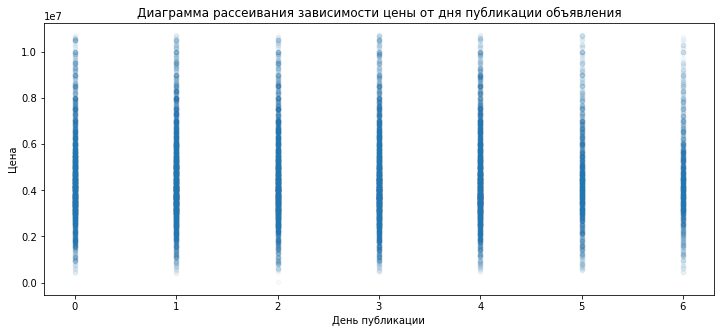

In [233]:
#построим диаграмму рассеивания
df.plot(x='day', y='last_price', 
            kind ='scatter', alpha = 0.03, figsize=(12,5),
         title='Диаграмма рассеивания зависимости цены от дня публикации объявления')
plt.xlabel('День публикации')
plt.ylabel('Цена')
plt.show()

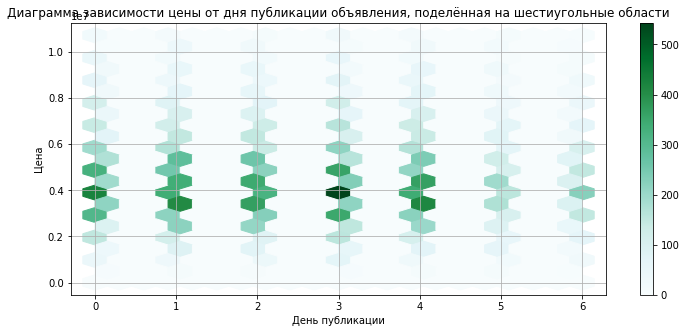

In [234]:
#построим диаграмму, поделённую на шестиугольные области
df.plot(x='day', y='last_price', kind='hexbin', gridsize=20, figsize=(12, 5), sharex=False, grid=True,
        title='Диаграмма зависимости цены от дня публикации объявления, поделённая на шестиугольные области')
plt.xlabel('День публикации')
plt.ylabel('Цена')
plt.show() 

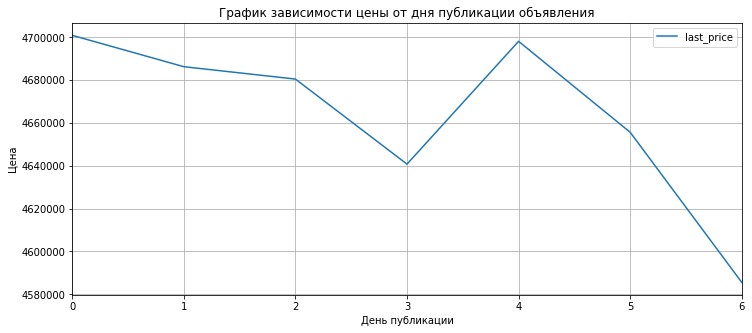

In [235]:
#построим график, используя группировку с pivot_table
df.pivot_table(index ='day', values = 'last_price').plot(grid = True, figsize = (12,5),
                                                         title='График зависимости цены от дня публикации объявления')
plt.xlabel('День публикации')
plt.ylabel('Цена')
plt.show()

##### Вывод

Для изучения зависимости цены от дня недели, когда было опубликовано объявление, рассчитаем коэффициент корреляции Пирсона при помощи метода corr(). Коэффициент корреляции отрицательный и равен -0.01, что говорит о том, что есть очень слабая обратная взаимозависимость цены и дня недели: чем ближе к выходным было размещено объявление, тем ниже цена.

Далее построим диаграмму рассеивания при помощи метода plot(). Параметру kind передадим значение scatter, параметру alpha передадим значение 0.03. На диаграмме рассеивания видим, что для каждого дня недели структура данных на диаграмме различается.

После построим диаграмму, поделённую на шестиугольные области (соты), при помощи метода plot(). Параметру kind передадим значение hexbin. На диаграмме с сотами, также как и на диаграмме рассеивания, для каждого дня недели структура сот на диаграмме различается. В самой «густой» зоне квартиры, размещенные в четверг, стомостью от 2 000 000 до 4 000 000.

В завершении построим график, используя группировку с pivot_table. Получившийся график подтвержает обратную зависимость цены и дня недели, когда было опубликовано объявление: размещённые в понедельник объекты имеют цену выше, чем объекты, размещённые в воскресенье. 

##### Зависимость цены от месяца, когда было опубликовано объявление

In [236]:
#рассчитаем коэффициент корреляции Пирсона 
print(df['month'].corr(df['last_price']))

-0.004912390742873685


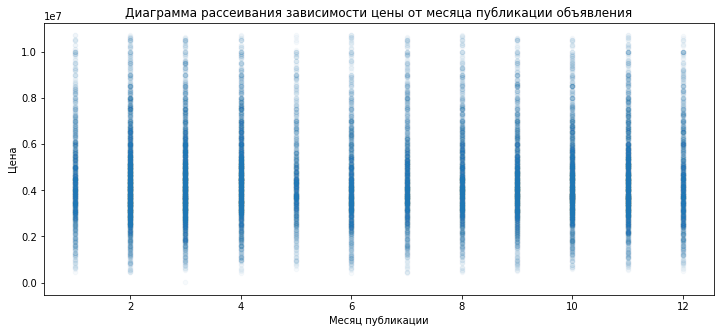

In [237]:
#построим диаграмму рассеивания 
df.plot(x='month', y='last_price', 
            kind ='scatter', alpha = 0.03, figsize=(12,5),
        title='Диаграмма рассеивания зависимости цены от месяца публикации объявления')
plt.xlabel('Месяц публикации')
plt.ylabel('Цена')
plt.show()

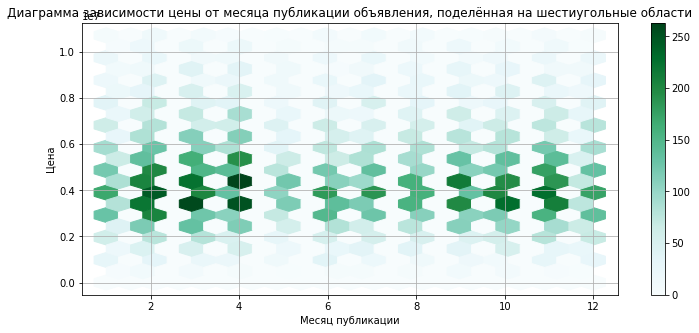

In [238]:
#построим диаграмму, поделённую на шестиугольные области
df.plot(x='month', y='last_price', kind='hexbin', gridsize=20, figsize=(12, 5), sharex=False, grid=True,
        title='Диаграмма зависимости цены от месяца публикации объявления, поделённая на шестиугольные области')
plt.xlabel('Месяц публикации')
plt.ylabel('Цена')
plt.show() 

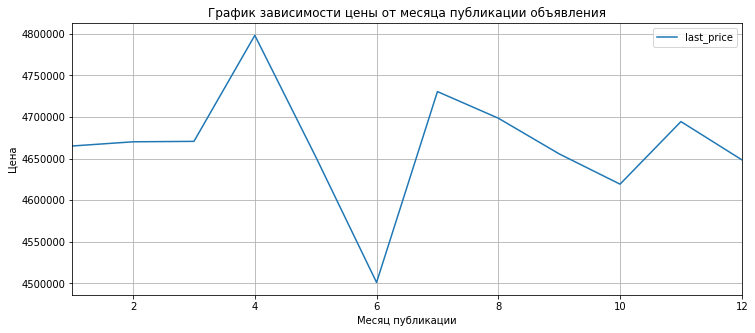

In [239]:
#построим график, используя группировку с pivot_table
df.pivot_table(index ='month', values = 'last_price').plot(grid = True, figsize = (12,5),
                                                           title='График зависимости цены от месяца публикации объявления')
plt.xlabel('Месяц публикации')
plt.ylabel('Цена')
plt.show()

##### Вывод

Для изучения зависимости цены от месяца, когда было опубликовано объявление, рассчитаем коэффициент корреляции Пирсона при помощи метода corr(). Коэффициент корреляции отрицательный и равен -0.004, что говорит о том, что есть очень слабая обратная взаимозависимость цены и месяца, ещё более слабая, чем связь цены и дня, когда было размещено объявление, либо связь не так очевида.

Далее построим диаграмму рассеивания при помощи метода plot(). Параметру kind передадим значение scatter, параметру alpha передадим значение 0.03. На диаграмме рассеивания видим, что для каждого месяца структура данных на диаграмме различается.

После построим диаграмму, поделённую на шестиугольные области (соты), при помощи метода plot(). Параметру kind передадим значение hexbin. На диаграмме с сотами, также как и на диаграмме рассеивания, для каждого месяца структура сот на диаграмме различается. В самой «густой» зоне квартиры, размещенные в ферале, марте, апреле, сентябре, октябре, ноябре, стомостью от 2 000 000 до 4 000 000.

В завершении построим график, используя группировку с pivot_table. Получившийся график отображает нелинейную зависимость цены и месяца, когда было опубликовано объявление: размещённые в апреле объекты имеют цену значительнро выше, чем объекты, размещённые в июне. 

##### Зависимость цены от года, когда было опубликовано объявление

In [240]:
#рассчитаем коэффициент корреляции Пирсона 
print(df['year'].corr(df['last_price']))

0.042973709990747


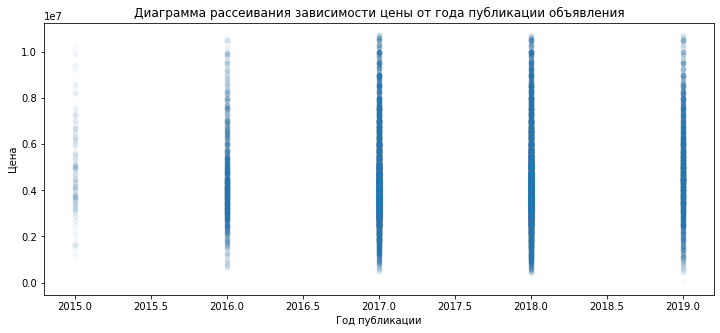

In [241]:
#построим диаграмму рассеивания
df.plot(x='year', y='last_price', 
            kind ='scatter', alpha = 0.03, figsize=(12,5),
        title='Диаграмма рассеивания зависимости цены от года публикации объявления')
plt.xlabel('Год публикации')
plt.ylabel('Цена')
plt.show()

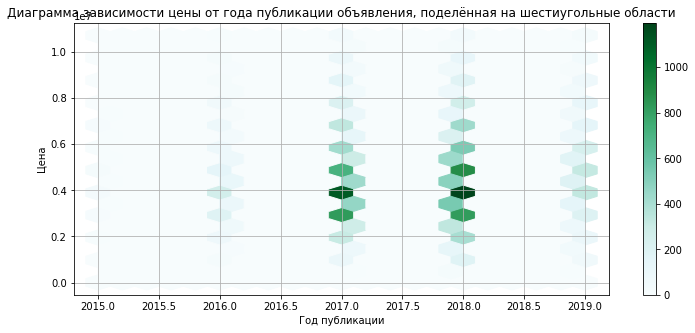

In [242]:
#построим диаграмму, поделённую на шестиугольные области
df.plot(x='year', y='last_price', kind='hexbin', gridsize=20, figsize=(12, 5), sharex=False, grid=True,
        title='Диаграмма зависимости цены от года публикации объявления, поделённая на шестиугольные области')
plt.xlabel('Год публикации')
plt.ylabel('Цена')
plt.show() 

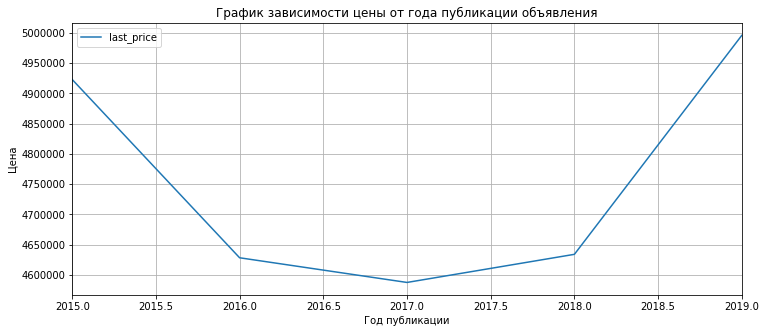

In [243]:
#построим график, используя группировку с pivot_table
df.pivot_table(index ='year', values = 'last_price').plot(grid = True, figsize = (12,5),
                                                          title='График зависимости цены от года публикации объявления')
plt.xlabel('Год публикации')
plt.ylabel('Цена')
plt.show()

##### Вывод

Для изучения зависимости цены от года, когда было опубликовано объявление, рассчитаем коэффициент корреляции Пирсона при помощи метода corr(). Коэффициент корреляции положительный и равен 0.04, что говорит о том, что есть очень слабая взаимозависимость цены и года, когда было размещено объявление.

Далее построим диаграмму рассеивания при помощи метода plot(). Параметру kind передадим значение scatter, параметру alpha передадим значение 0.03. На диаграмме рассеивания видим, что для каждого года структура данных на диаграмме различается: начиная с 2017 плотность данных выше, чем в 2014 - 2016.

После построим диаграмму, поделённую на шестиугольные области (соты), при помощи метода plot(). Параметру kind передадим значение hexbin. На диаграмме с сотами, также как и на диаграмме рассеивания, для каждого года структура сот на диаграмме различается. В самой «густой» зоне квартиры, размещенные в 2017, 2018, стомостью от 3 000 000 до 5 000 000.

В завершении построим график, используя группировку с pivot_table. Получившийся график отображает повышение цены на объекты, начиная с  2017.

#### Вывод

На данном шаге изучили, какие факторы больше всего влияют на стоимость квартиры, зависит ли цена от площади, числа комнат, удалённости от центра. Изучили зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучили зависимость от даты размещения: дня недели, месяца и года.

Для каждого фактора подсчитали коэффициент корреляции Пирсона, построили гистограмму, диаграмму рассеивания,  диаграмму с сотами, а также график, используя группировку с pivot_table.

Значение коэффициента корреляции для фактора 'площадь' составляет 0.67. Это самое высокое положительное значение коэффициента корреляции из всех. Соответственно, больше всего на цену влияет площадь квартиры: чем больше площадь, тем выше цена.

Значение коэффициента корреляции для фактора 'число комнат' составляет 0.41. Данный фактор также влияет на цену: с увеличением числа комнат возрастает цена.

Значение коэффициента корреляции для фактора 'удалённость от центра' составляет - 0.32. Данный фактор также оказывает влияние на цену, только зависимость обратная: чем дальше расположен объект, тем ниже цена.

Значение коэффициента корреляции для фактора 'этаж, на котором расположена квартира' составляет 0.15. Зависимость цены от этажа слабая: с увеличением этажа цена возрастает очень незначительно. Есть особенности: самая низкая цена у квартир, расположенных на первом этаже, чуть выше у квартир, расположенных на последнем, и самая высокая цена у квартир, расположенных не на первом и не на последнем (т.е на другом) этаже, что также ожидаемо.

Значение коэффициента корреляции для фактора 'день недели, когда было опубликовано объявление' составляет -0.01, что говорит о том, что есть очень слабая обратная взаимозависимость цены и дня недели: чем ближе к выходным было размещено объявление, тем ниже цена.

Значение коэффициента корреляции для фактора 'месяц, когда было опубликовано объявление' составляет -0.004. Это самое низкое значение коэффициента корреляции из всех. Соответственно, самое слабое обратное влияние на цену оказывает месяц, когда было размещено объявление. Есть особенности: размещённые в апреле объекты имеют цену значительнро выше, чем объекты, размещённые в июне. 

Значение коэффициента корреляции для фактора 'год, когда было опубликовано объявление' составляет 0.04, что говорит о том, что есть очень слабая взаимозависимость цены и года, когда было размещено объявление. В соответсвии с графиками, цены на объекты начали повышаться, начиная с 2017.

#### 4.5 Выберем 10 населённых пунктов с наибольшим числом объявлений. Посчитаем среднюю цену квадратного метра в этих населённых пунктах. Выделим среди них населённые пункты с самой высокой и низкой стоимостью жилья.

In [244]:
#создадим сводную таблицу для обобщения данных
print('10 населённых пунктов с наибольшим числом объявлений:')
df1 = df.pivot_table(index = 'locality_name', values = ['last_price', 'metr_price'],
               aggfunc = {'last_price':'count', 'metr_price':'mean'}).sort_values(by = 'last_price', 
                                                                                  ascending = False).head(10)

df1

10 населённых пунктов с наибольшим числом объявлений:


,last_price,metr_price
locality_name,,
Санкт-Петербург,11420,105670.802539
посёлок Мурино,460,86662.886957
посёлок Шушары,385,79383.854545
Всеволожск,328,67418.426829
Колпино,295,75437.776271
Пушкин,287,100676.320557
посёлок Парголово,278,90531.593525
Гатчина,253,69415.600791
деревня Кудрово,248,93433.830645


In [245]:
#создадим сводную таблицу для обобщения данных
print('Населённые пункты с самой высокой и низкой стоимостью жилья:')
df2 = df1.sort_values(by = 'metr_price', ascending = False)

df2

Населённые пункты с самой высокой и низкой стоимостью жилья:


,last_price,metr_price
locality_name,,
Санкт-Петербург,11420,105670.802539
Пушкин,287,100676.320557
деревня Кудрово,248,93433.830645
посёлок Парголово,278,90531.593525
посёлок Мурино,460,86662.886957
посёлок Шушары,385,79383.854545
Колпино,295,75437.776271
Гатчина,253,69415.600791
Всеволожск,328,67418.426829


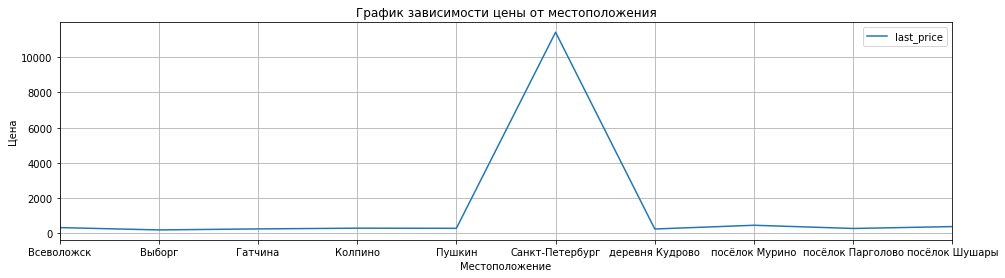

In [246]:
#построим график, используя группировку с pivot_table
df2.pivot_table(index ='locality_name', values = 'last_price').plot(grid = True, figsize = (16,4),
                                                                    title='График зависимости цены от местоположения')
plt.xlabel('Местоположение')
plt.ylabel('Цена')
plt.show()

#### Вывод

Для выбора 10 населённых пунктов с наибольшим числом объявлений, подсчёта средней цены квадратного метра и отображения среди них населённых пунктов с самой высокой и низкой стоимостью жилья сформируем сводные таблицы при помощи метода pivot_table().

Сначала сформируем сводную таблицу df1, где выведем 10 населённых пунктов с наибольшим числом объявлений и значением средней цены квадратного метра для каждого из выбранных пунктов. Аргументу 'index' передадим значения столбца 'locality_name', по этому столбцу будем группировать данные. Аргументу 'values' передадим значения столбцов 'metr_price' и 'last_price'. По значениям этих столбцов хотим увидеть сводную информацию. Аргументу 'aggfunc' для столбца 'last_price' передадим функцию 'count', для столбца 'metr_price' передадим функцию 'mean'.
Далее отсортируем методом sort_values() по значениям в столбце 'last_price'. В результате отображается 10 населённых пунктов с наибольшим числом объявлений: Санкт-Петербург, посёлок Мурино, посёлок Шушары, Всеволожск, Колпино, Пушкин, посёлок Парголово, Гатчина, деревня Кудрово, Выборг.
На первом месте по количеству объявлений в выборке Санкт-Петербург, для него представлено 11 420 объявлений. На последнем, десятом месте в выборке Выборг, там представлено 196 объявления.

Далее сформируем сводную таблицу df2, отсортировав таблицу df1 по значениям в столбце 'metr_price'. В результате отображается выборка с сортировкой по средней цене квадратного метра. На первом месте также Санкт-Петербург, там самая высокая средняя цена квадратного метра: 105 670. На последнем, десятом месте также Выборг, там самая низкая средняя цена квадратного метра: 58 470. 
Внутри выборки места после второй сортировки поменялись. Если по количеству объявлений на втором месте был посёлок Мурино (460 объявлений), на третьем месте посёлок Шушары (385 объявлений), то по средней цене квадратного метра на втором месте Пушкин (100 676), на третьем месте деревня Кудрово (93 433).

#### 4.6 Изучим предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделим квартиры в Санкт-Петербурге ('locality_name'). Наша  задача — выяснить, какая область входит в центр. Создадим столбец с расстоянием до центра в километрах: округлим до целых значений. После этого посчитаем среднюю цену для каждого километра. Построим график, который будет показывать, как цена зависит от удалённости от центра. Определим границу, где график сильно меняется — это и будет центральная зона.

In [247]:
#выделим квартиры в Санкт-Петербурге 
df_centr = df.query('locality_name == "Санкт-Петербург"')

In [248]:
#cоздадим столбец с расстоянием до центра в километрах
df_centr['city_centers_nearest_km'] = df_centr['city_centers_nearest'] / 1000

In [249]:
#заменим вещественный тип данных на целочисленный
df_centr['city_centers_nearest_km'] = df_centr['city_centers_nearest_km'].astype('int')

#проверим тип данных
print(df_centr['city_centers_nearest_km'].dtype)

int64


In [250]:
#получим первые пять строк таблицы df_centr
print('Первые пять строк таблицы df_centr:')
df_centr.head()

Первые пять строк таблицы df_centr:


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,metr_price,day,month,year,floor_detail,living_part,kitchen_part,city_centers_nearest_km
4,2,10000000,100,2018-06-19,2,3,14,32,13,False,False,False,41,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121,100000,1,6,2018,другой,0.320000,0.410000,8
7,5,7915000,71,2019-04-18,2,2,24,40,22,False,False,False,18,2,Санкт-Петербург,23982.0,11634.0,0,460.0,0,503.0,5,111478,3,4,2019,другой,0.563380,0.253521,11
9,18,5400000,61,2017-02-26,3,2,9,43,7,False,False,False,6,2,Санкт-Петербург,50898.0,15008.0,0,460.0,0,503.0,289,88524,6,2,2017,другой,0.704918,0.098361,15
10,5,5050000,39,2017-11-16,1,2,12,20,3,False,False,False,8,0,Санкт-Петербург,38357.0,13878.0,1,310.0,2,553.0,137,129487,3,11,2017,другой,0.512821,0.205128,13
15,16,4650000,39,2017-11-18,1,2,14,20,5,False,False,False,7,1,Санкт-Петербург,12900.0,14259.0,1,590.0,1,296.0,19,119230,5,11,2017,другой,0.512821,0.179487,14


In [251]:
#создадим сводную таблицу для подсчёта средней цены для каждого километра
df_centr_pivot = df_centr.pivot_table(index = 'city_centers_nearest_km', values = 'last_price',
               aggfunc = 'mean')

#обновим индексы
df_centr_pivot = df_centr_pivot.reset_index()

#выведем сводную таблицу
df_centr_pivot

,city_centers_nearest_km,last_price
0,0,7.708800e+06
1,1,7.548051e+06
2,2,7.319381e+06
3,3,6.962093e+06
4,4,7.205850e+06
5,5,6.902226e+06
6,6,6.457587e+06
7,7,6.338144e+06
8,8,5.920166e+06
9,9,5.201687e+06


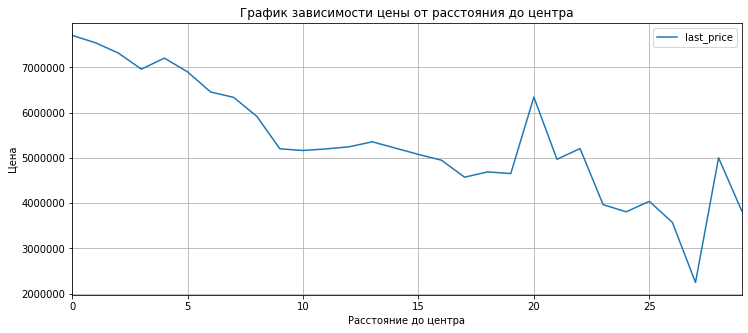

In [252]:
#построим график, используя группировку с pivot_table
df_centr_pivot.plot(x='city_centers_nearest_km', y='last_price', grid = True, figsize = (12,5), 
                    title='График зависимости цены от расстояния до центра')
plt.xlabel('Расстояние до центра')
plt.ylabel('Цена')
plt.show()

#### Вывод

На данном шаге изучали предложения квартир в Санкт-Петербурге.
При помощи метода query() выделим квартиры, расположенные в Санкт-Петербурге, в отдельный набор данных df_centr. Создадим отдельный столбец с расстоянием до центра в километрах, округлим значения до целых. Далее создадим сводную таблицу и подсчитаем среднюю цену для каждого километра. Для дальнейшей работы со столбцами сводной таблицы обновим индексы при помощи reset_index(). 
После этого построим график, используя группировку с pivot_table. На графике в районе 8 км есть спад цены. Центральной зоной будем считать территорию от нуля до 8 км. Проанализируем данную территорию отдельно в следующем пункте.

#### 4.7 Выделим сегмент квартир в центре. Проанализируем эту территорию и изучим следующие параметры: площадь, цена, число комнат, высота потолков. Также выделим факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделаем выводы. Определим, отличаются ли они от общих выводов по всему городу

In [253]:
#выделим квартиры в центре Санкт-Петербурга
df_centr_8 = df_centr.query('city_centers_nearest_km <= 8')

In [254]:
#получим первые пять строк таблицы df_centr_8
print('Первые пять строк таблицы df_centr_8:')
df_centr_8.head()

Первые пять строк таблицы df_centr_8:


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,metr_price,day,month,year,floor_detail,living_part,kitchen_part,city_centers_nearest_km
4,2,10000000,100,2018-06-19,2,3,14,32,13,False,False,False,41,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121,100000,1,6,2018,другой,0.320000,0.410000,8
24,8,6500000,97,2015-10-31,2,2,3,46,1,False,False,False,19,0,Санкт-Петербург,20052.0,2336.0,3,411.0,3,124.0,265,67010,5,10,2015,первый,0.474227,0.195876,2
70,9,3400000,30,2018-09-05,1,2,5,16,1,False,False,False,7,0,Санкт-Петербург,39053.0,8313.0,1,382.0,0,503.0,14,113333,2,9,2018,первый,0.533333,0.233333,8
94,3,3500000,29,2019-04-26,1,2,5,15,2,False,False,False,5,1,Санкт-Петербург,12921.0,7303.0,0,460.0,0,503.0,4,120689,4,4,2019,другой,0.517241,0.172414,7
99,32,9600000,90,2017-09-26,4,2,5,67,2,False,False,False,8,0,Санкт-Петербург,23277.0,2818.0,0,460.0,0,503.0,104,106666,1,9,2017,другой,0.744444,0.088889,2


##### Параметр "Площадь"

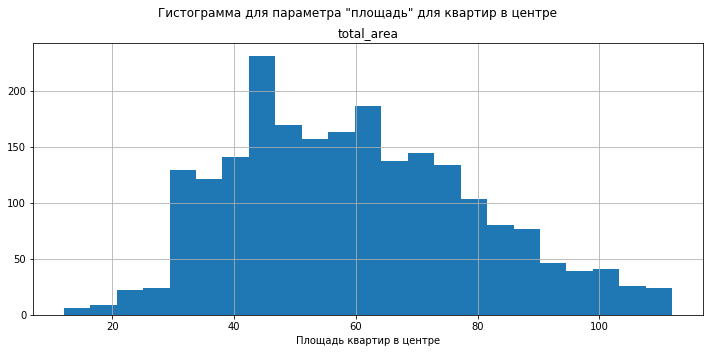

In [255]:
#построим гистограмму для параметра "площадь" для квартир в центре
df_centr_8.hist('total_area', figsize=(12,5), bins = 'auto')
plt.suptitle('Гистограмма для параметра "площадь" для квартир в центре')
plt.xlabel('Площадь квартир в центре')
plt.show()

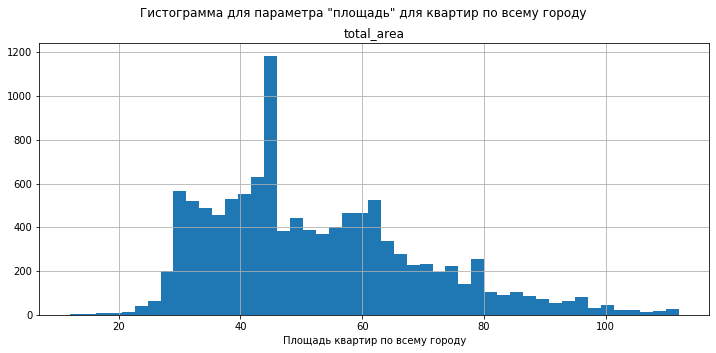

In [256]:
#построим гистограмму для параметра "площадь" для квартир по всему городу
df_centr.hist('total_area', figsize=(12,5), bins = 'auto')
plt.suptitle('Гистограмма для параметра "площадь" для квартир по всему городу')
plt.xlabel('Площадь квартир по всему городу')
plt.show()

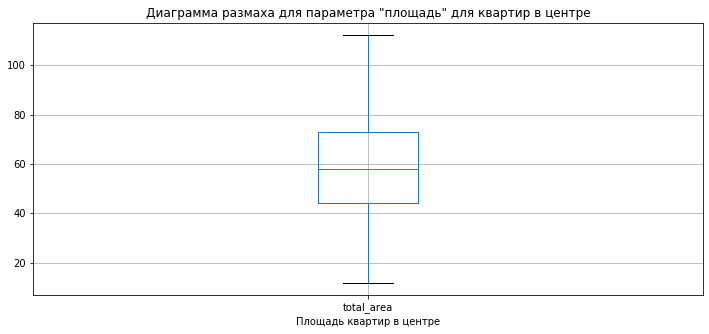

In [257]:
#построим диаграмму размаха или "ящик с усами" для параметра "площадь" для квартир в центре
df_centr_8['total_area'].plot.box(grid=True, title='Диаграмма размаха для параметра "площадь" для квартир в центре', figsize=(12,5))
plt.xlabel('Площадь квартир в центре')
plt.show()

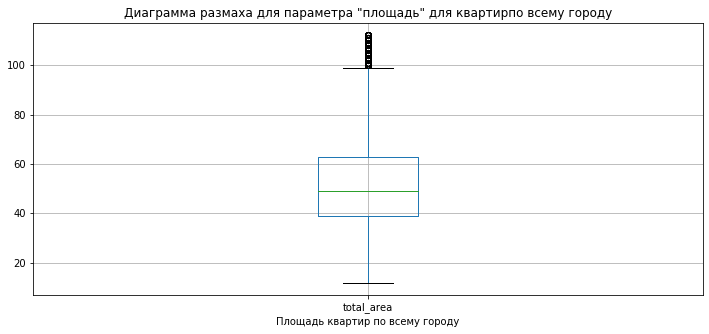

In [258]:
#построим диаграмму размаха или "ящик с усами" для параметра "площадь" для квартир по всему городу
df_centr['total_area'].plot.box(grid=True, title='Диаграмма размаха для параметра "площадь" для квартирпо всему городу', figsize=(12,5))
plt.xlabel('Площадь квартир по всему городу')
plt.show()

In [259]:
#числовое описание данных для столбца total_area для квартир в центре
print('Числовое описание данных для столбца total_area для квартир в центре')
print(df_centr_8['total_area'].describe())

Числовое описание данных для столбца total_area для квартир в центре
count    2209.000000
mean       59.730647
std        19.883614
min        12.000000
25%        44.000000
50%        58.000000
75%        73.000000
max       112.000000
Name: total_area, dtype: float64


In [260]:
#числовое описание данных для столбца total_area для квартир по всему городу
print('Числовое описание данных для столбца total_area для квартир по всему городу')
print(df_centr['total_area'].describe())

Числовое описание данных для столбца total_area для квартир по всему городу
count    11420.000000
mean        52.390455
std         17.255492
min         12.000000
25%         39.000000
50%         49.000000
75%         63.000000
max        112.000000
Name: total_area, dtype: float64


##### Вывод

При помощи метода query() выделим квартиры, расположенные в центре Санкт-Петербурга, в отдельный набор данных df_centr_8. 
Рассмотрим параметр "Площадь" для сегмента квартир в центре и квартир по всему городу и сравним показатели.
Построим гистограммы методом hist(). Гистограммы похожи на график нормального распределения. 
На диаграмме размаха для сегмента квартир в центре нет выбросов, для квартир по всему городу есть выбросы, но исключать их не будем, они незначительные.

В соответствии с числовым описанием можем сделать вывод, что в центре Санкт-Петербурга обычно на продажу выставляют квартиры площадью 58 м², тогда как по всему городу обычно на продажу выставляют квартиры площадью 49 м².

Максимальное значение площади квартиры в центре и по всему городу  - 112 м², минимальное значение площади квартиры в центре и по всему городу не изменилось - 12 м².

##### Параметр "Цена"

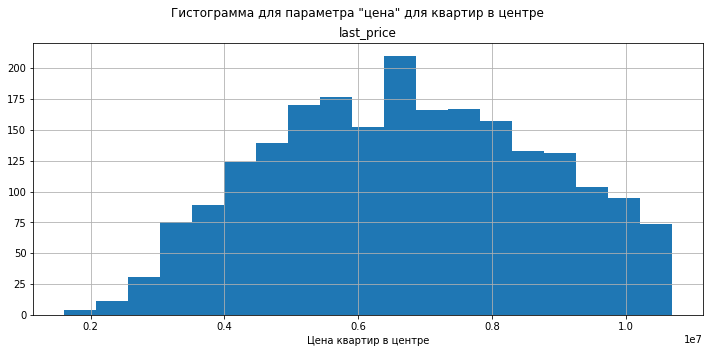

In [261]:
#построим гистограмму для параметра "цена" для квартир в центре
df_centr_8.hist('last_price', figsize=(12,5), bins = 'auto')
plt.suptitle('Гистограмма для параметра "цена" для квартир в центре')
plt.xlabel('Цена квартир в центре')
plt.show()

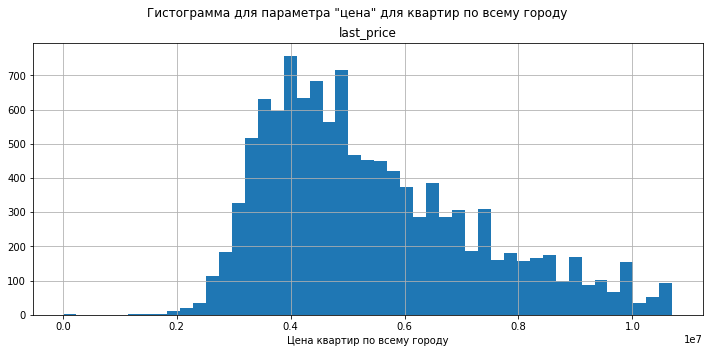

In [262]:
#построим гистограмму для параметра "цена" для квартир по всему городу
df_centr.hist('last_price', figsize=(12,5),bins = 'auto')
plt.suptitle('Гистограмма для параметра "цена" для квартир по всему городу')
plt.xlabel('Цена квартир по всему городу')
plt.show()

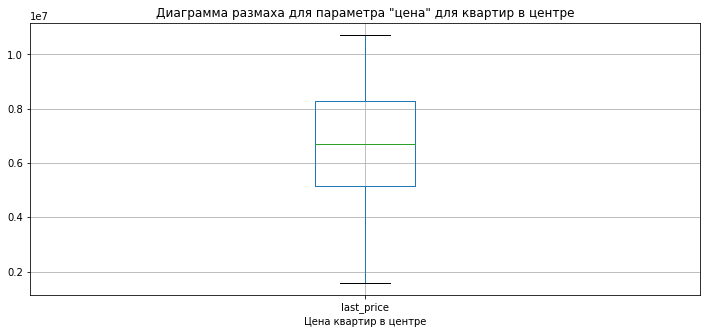

In [263]:
#построим диаграмму размаха или "ящик с усами" для параметра "цена" для квартир в центре
df_centr_8['last_price'].plot.box(grid=True, title='Диаграмма размаха для параметра "цена" для квартир в центре', figsize=(12,5))
plt.xlabel('Цена квартир в центре')
plt.show()

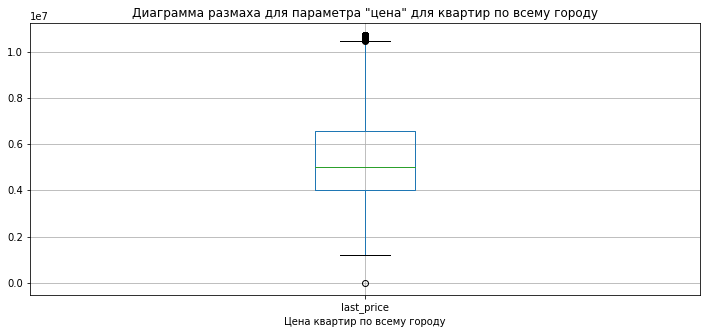

In [264]:
#построим диаграмму размаха или "ящик с усами" для параметра "цена" для квартир по всему городу
df_centr['last_price'].plot.box(grid=True, title='Диаграмма размаха для параметра "цена" для квартир по всему городу', figsize=(12,5))
plt.xlabel('Цена квартир по всему городу')
plt.show()

In [265]:
#числовое описание данных для столбца last_price для квартир в центре
print('Числовое описание данных для столбца last_price для квартир в центре:')
print(df_centr_8['last_price'].describe())

Числовое описание данных для столбца last_price для квартир в центре:
count    2.209000e+03
mean     6.710572e+06
std      2.001174e+06
min      1.600000e+06
25%      5.170000e+06
50%      6.700000e+06
75%      8.299000e+06
max      1.070000e+07
Name: last_price, dtype: float64


In [266]:
#числовое описание данных для столбца last_price для квартир по всему городу
print('Числовое описание данных для столбца last_price для квартир по всему городу:')
print(df_centr['last_price'].describe())

Числовое описание данных для столбца last_price для квартир по всему городу:
count    1.142000e+04
mean     5.437998e+06
std      1.857766e+06
min      1.219000e+04
25%      4.000000e+06
50%      5.000000e+06
75%      6.580000e+06
max      1.070000e+07
Name: last_price, dtype: float64


##### Вывод

Рассмотрим параметр "Цена" для сегмента квартир в центре и квартир по всему городу и сравним показатели. Построим гистограммы методом hist(). Гистограммы похожи на график нормального распределения. 
На диаграмме размаха для сегмента квартир в центре нет выбросов, для квартир по всему городу есть выбросы, но исключать их не будем, они незначительные.

В соответствии с числовым описанием можем сделать вывод, что в центре Санкт-Петербурга обычно на продажу выставляют квартиры ценой 6 700 000, тогда как по всему городу обычно на продажу выставляют квартиры ценой 5 000 000.

Максимальное значение цены квартиры в центре и по всему городу  - 10 700 000, минимальное значение цены квартиры в центре - 1 600 000, минимальное значение цены по всему городу - 12 190.

##### Параметр "Число комнат"

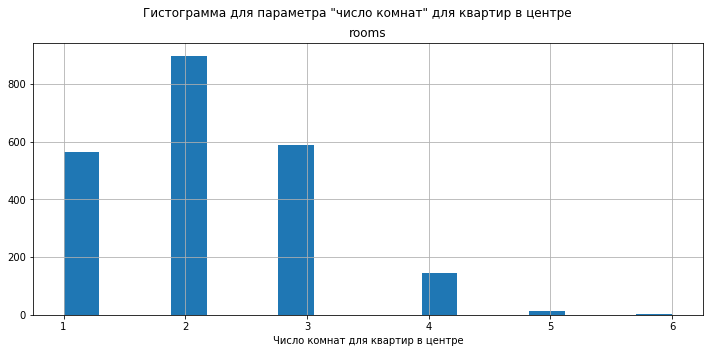

In [267]:
#построим гистограмму для параметра "число комнат" для квартир в центре
df_centr_8.hist('rooms', figsize=(12,5), bins = 'auto')
plt.suptitle('Гистограмма для параметра "число комнат" для квартир в центре')
plt.xlabel('Число комнат для квартир в центре')
plt.show()

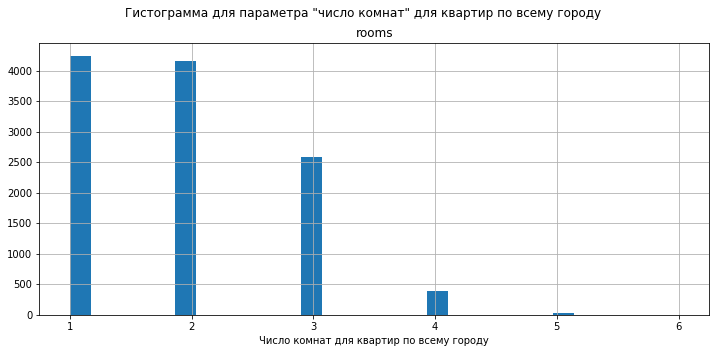

In [268]:
#построим гистограмму для параметра "число комнат" для квартир по всему городу
df_centr.hist('rooms', figsize=(12,5), bins = 'auto')
plt.suptitle('Гистограмма для параметра "число комнат" для квартир по всему городу')
plt.xlabel('Число комнат для квартир по всему городу')
plt.show()

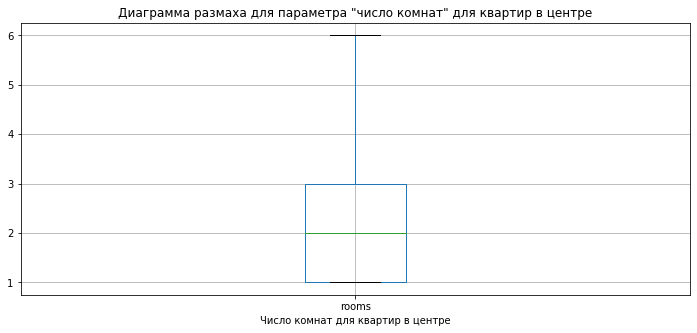

In [269]:
#построим диаграмму размаха или "ящик с усами" для параметра "число комнат" для квартир в центре
df_centr_8['rooms'].plot.box(grid=True, title='Диаграмма размаха для параметра "число комнат" для квартир в центре', figsize=(12,5))
plt.xlabel('Число комнат для квартир в центре')
plt.show()

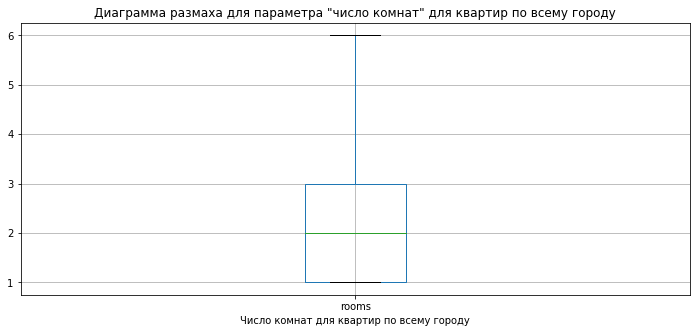

In [270]:
#построим диаграмму размаха или "ящик с усами" для параметра "число комнат" для квартир по всему городу
df_centr['rooms'].plot.box(grid=True, title='Диаграмма размаха для параметра "число комнат" для квартир по всему городу', figsize=(12,5))
plt.xlabel('Число комнат для квартир по всему городу')
plt.show()

In [271]:
#числовое описание данных для столбца rooms для квартир в центре
print('Числовое описание данных для столбца rooms для квартир в центре:')
print(df_centr_8['rooms'].describe())

Числовое описание данных для столбца rooms для квартир в центре:
count    2209.000000
mean        2.164780
std         0.909396
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         6.000000
Name: rooms, dtype: float64


In [272]:
#числовое описание данных для столбца rooms для квартир по всему городу
print('Числовое описание данных для столбца rooms для квартир по всему городу:')
print(df_centr['rooms'].describe())

Числовое описание данных для столбца rooms для квартир по всему городу:
count    11420.000000
mean         1.933275
std          0.871514
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: rooms, dtype: float64


##### Вывод

Рассмотрим параметр "Число комнат" для сегмента квартир в центре и квартир по всему городу и сравним показатели. Построим гистограммы методом hist(). На диаграмме размаха для сегмента квартир в центре и по всему городу нет выбросов.

В соответствии с числовым описанием можем сделать вывод, что в центре Санкт-Петербурга и по всему городу обычно на продажу выставляют двухкомнатные квартиры.

Максимальное значение числа комнат в центре и по всему городу  - 6, минимальное значение числа комнат в центре и по всему городу - 1.

##### Параметр "Высота потолков"

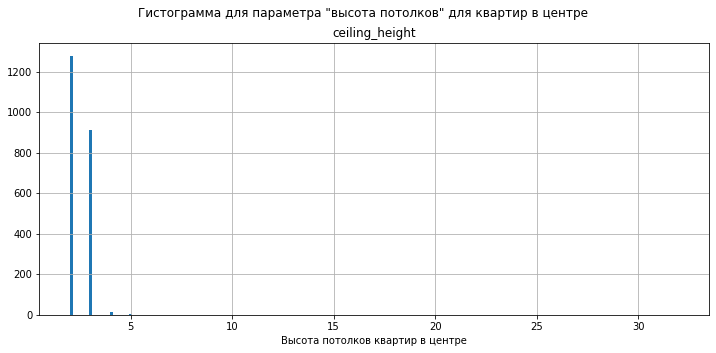

In [273]:
#построим гистограмму для параметра "высота потолков" для квартир в центре
df_centr_8.hist('ceiling_height', figsize=(12,5), bins = 'auto')
plt.suptitle('Гистограмма для параметра "высота потолков" для квартир в центре')
plt.xlabel('Высота потолков квартир в центре')
plt.show()

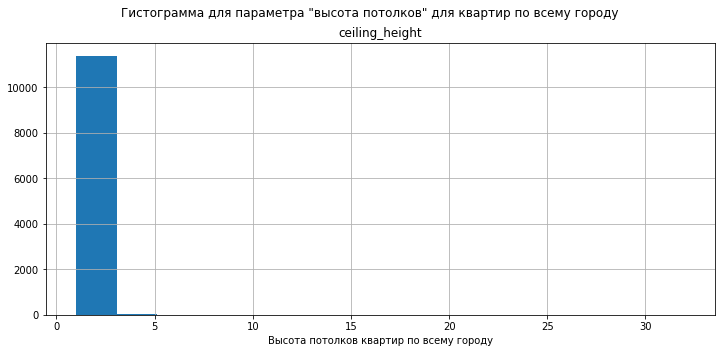

In [274]:
#построим гистограмму для параметра "высота потолков" для квартир по всему городу
df_centr.hist('ceiling_height', figsize=(12,5), bins = 'auto')
plt.suptitle('Гистограмма для параметра "высота потолков" для квартир по всему городу')
plt.xlabel('Высота потолков квартир по всему городу')
plt.show()

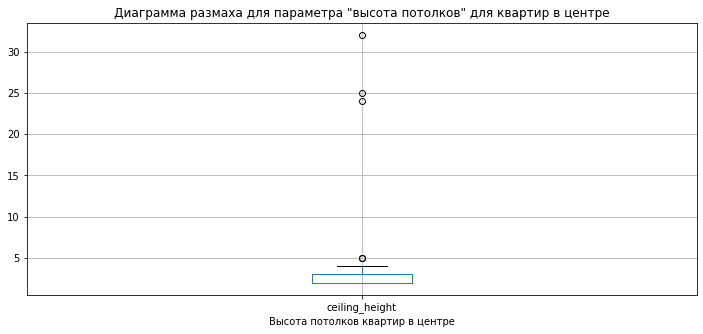

In [275]:
#построим диаграмму размаха или "ящик с усами" для параметра "высота потолков" для квартир в центре
df_centr_8['ceiling_height'].plot.box(grid=True, title='Диаграмма размаха для параметра "высота потолков" для квартир в центре', figsize=(12,5))
plt.xlabel('Высота потолков квартир в центре')
plt.show()

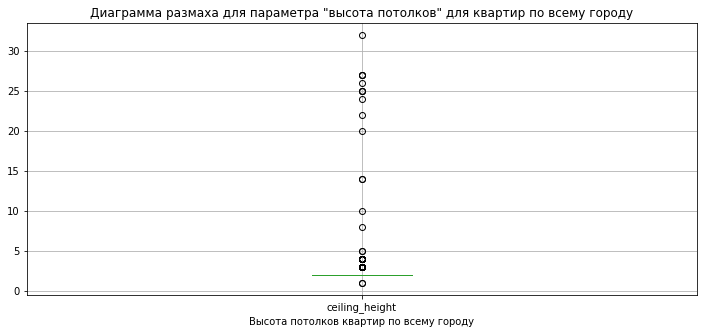

In [276]:
#построим диаграмму размаха или "ящик с усами" для параметра "высота потолков" для квартир по всему городу
df_centr['ceiling_height'].plot.box(grid=True, title='Диаграмма размаха для параметра "высота потолков" для квартир по всему городу', figsize=(12,5))
plt.xlabel('Высота потолков квартир по всему городу')
plt.show()

In [277]:
#числовое описание данных для столбца ceiling_height для квартир в центре
print('Числовое описание данных для столбца ceiling_height для квартир в центре:')
print(df_centr_8['ceiling_height'].describe())

Числовое описание данных для столбца ceiling_height для квартир в центре:
count    2209.000000
mean        2.462653
std         1.048888
min         2.000000
25%         2.000000
50%         2.000000
75%         3.000000
max        32.000000
Name: ceiling_height, dtype: float64


In [299]:
#числовое описание данных для столбца ceiling_height для квартир по всему городу
print('Числовое описание данных для столбца ceiling_height для квартир по всему городу:')
print(df_centr['ceiling_height'].describe())

Числовое описание данных для столбца ceiling_height для квартир по всему городу:
count    11420.000000
mean         2.144133
std          0.821100
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max         32.000000
Name: ceiling_height, dtype: float64


##### Вывод

Рассмотрим параметр "Высота потолков" для сегмента квартир в центре и квартир по всему городу и сравним показатели. Построим гистограммы методом hist(). На диаграмме размаха для сегмента квартир в центре и по всему городу нет выбросов.

В соответствии с числовым описанием можем сделать вывод, что в центре Санкт-Петербурга и по всему городу обычно на продажу выставляют квартиры с высотой потолков 2 м.

Максимальное значение высоты потолков в центре и по всему городу  - 32 м, минимальное значение высоты потолков в центре - 2 м, по всему городу - 1 м.

##### Зависимость цены от числа комнат

In [300]:
#рассчитаем коэффициент корреляции Пирсона для квартир в центре
print(df_centr_8['rooms'].corr(df_centr_8['last_price']))

0.475872835198518


In [301]:
#рассчитаем коэффициент корреляции Пирсона для квартир по всему городу
print(df_centr['rooms'].corr(df_centr['last_price']))

0.4947662856577221


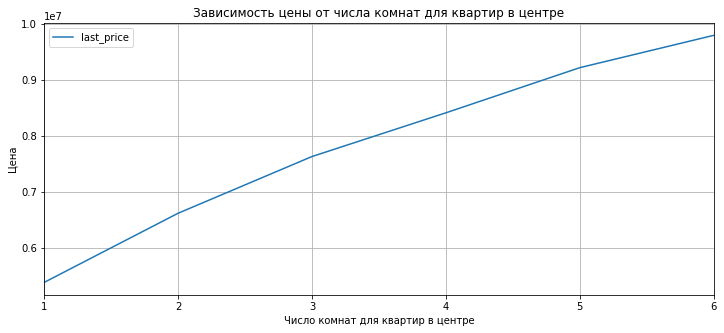

In [302]:
#построим график, используя группировку с pivot_table для квартир в центре
df_centr_8.pivot_table(index ='rooms', values = 'last_price').plot(grid = True, figsize = (12,5),
                                                                   title='Зависимость цены от числа комнат для квартир в центре')
plt.xlabel('Число комнат для квартир в центре')
plt.ylabel('Цена')
plt.show()

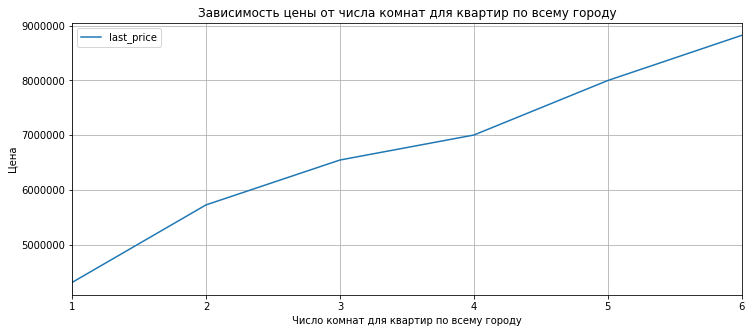

In [303]:
#построим график, используя группировку с pivot_table для квартир по всему городу
df_centr.pivot_table(index ='rooms', values = 'last_price').plot(grid = True, figsize = (12,5), 
                                                                 title='Зависимость цены от числа комнат для квартир по всему городу')
plt.xlabel('Число комнат для квартир по всему городу')
plt.ylabel('Цена')
plt.show()

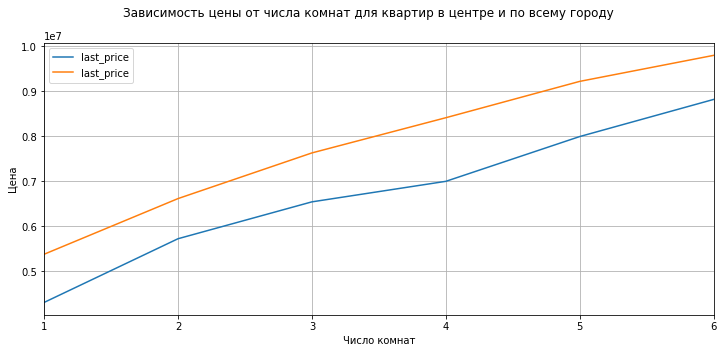

In [304]:
#отобразим два графика на одном для наглядности
df_centr_rooms = df_centr.pivot_table(index ='rooms', values = 'last_price')
df_centr_rooms_8 = df_centr_8.pivot_table(index ='rooms', values = 'last_price')

ax = df_centr_rooms.plot(grid = True, figsize = (12,5), label = 'Квартиры по всему городу', legend=True)
df_centr_rooms_8.plot(grid = True, figsize = (12,5), label= 'Квартиры в центре', ax=ax, legend=True) 
plt.suptitle('Зависимость цены от числа комнат для квартир в центре и по всему городу')
plt.xlabel('Число комнат')
plt.ylabel('Цена')
plt.show()

##### Зависимость цены от этажа

In [305]:
#рассчитаем коэффициент корреляции Пирсона для квартир в центре
print(df_centr_8['floor'].corr(df_centr_8['last_price']))

0.09400161646189453


In [306]:
#рассчитаем коэффициент корреляции Пирсона для квартир по всему городу
print(df_centr['floor'].corr(df_centr['last_price']))

0.0707538310474005


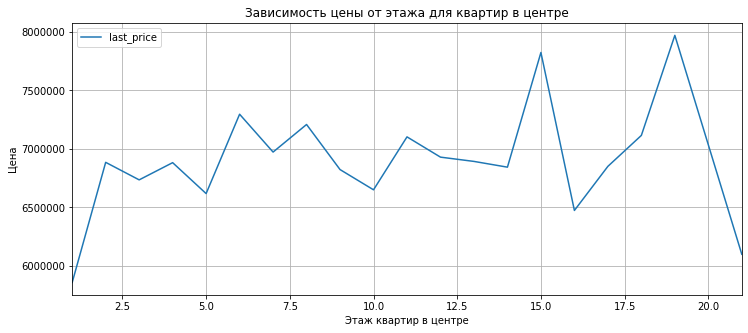

In [307]:
#построим график, используя группировку с pivot_table для квартир в центре
df_centr_8.pivot_table(index ='floor', values = 'last_price').plot(grid = True, figsize = (12,5), 
                                                                   title='Зависимость цены от этажа для квартир в центре')
plt.xlabel('Этаж квартир в центре')
plt.ylabel('Цена')
plt.show()

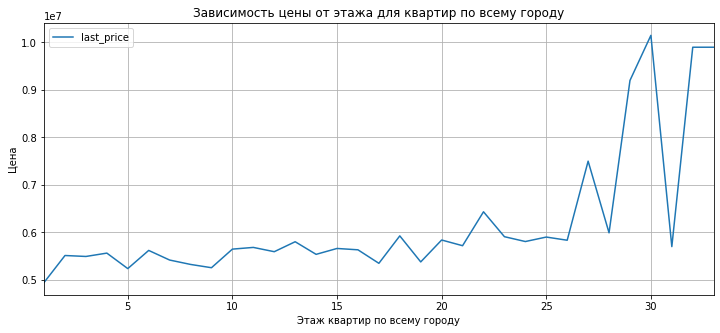

In [308]:
#построим график, используя группировку с pivot_table для квартир по всему городу
df_centr.pivot_table(index ='floor', values = 'last_price').plot(grid = True, figsize = (12,5),
                                                                 title='Зависимость цены от этажа для квартир по всему городу')
plt.xlabel('Этаж квартир по всему городу')
plt.ylabel('Цена')
plt.show()

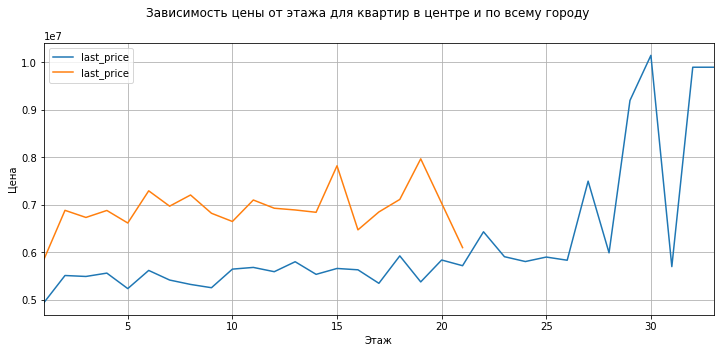

In [309]:
#отобразим два графика на одном для наглядности
df_centr_floor = df_centr.pivot_table(index ='floor', values = 'last_price')
df_centr_floor_8 = df_centr_8.pivot_table(index ='floor', values = 'last_price')

ax = df_centr_floor.plot(grid = True, figsize = (12,5), label = 'Квартиры по всему городу', legend=True)
df_centr_floor_8.plot(grid = True, figsize = (12,5), label= 'Квартиры в центре', ax=ax, legend=True) 
plt.suptitle('Зависимость цены от этажа для квартир в центре и по всему городу')
plt.xlabel('Этаж')
plt.ylabel('Цена')
plt.show()

#####  Зависимость цены от удалённости от центра

In [310]:
#рассчитаем коэффициент корреляции Пирсона для квартир в центре
print(df_centr_8['city_centers_nearest_km'].corr(df_centr_8['last_price']))

-0.24495671283824189


In [311]:
#рассчитаем коэффициент корреляции Пирсона для квартир по всему городу
print(df_centr['city_centers_nearest_km'].corr(df_centr['last_price']))

-0.31779805060937344


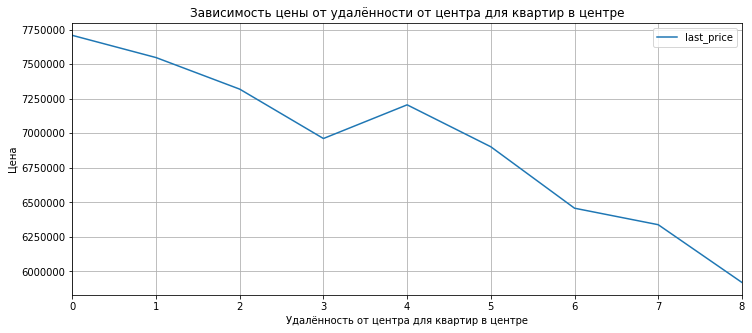

In [312]:
#построим график, используя группировку с pivot_table для квартир в центре
df_centr_8.pivot_table(index ='city_centers_nearest_km', values = 'last_price').plot(grid = True, figsize = (12,5),
                                                                                     title='Зависимость цены от удалённости от центра для квартир в центре')
plt.xlabel('Удалённость от центра для квартир в центре')
plt.ylabel('Цена')
plt.show()

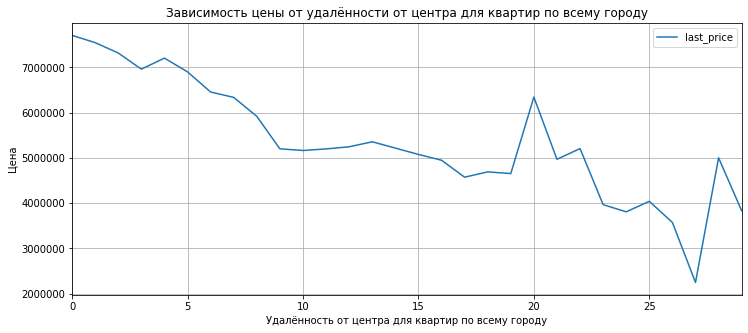

In [313]:
#построим график, используя группировку с pivot_table для квартир по всему городу
df_centr.pivot_table(index ='city_centers_nearest_km', values = 'last_price').plot(grid = True, figsize = (12,5),
                                                                                   title='Зависимость цены от удалённости от центра для квартир по всему городу')
plt.xlabel('Удалённость от центра для квартир по всему городу')
plt.ylabel('Цена')
plt.show()

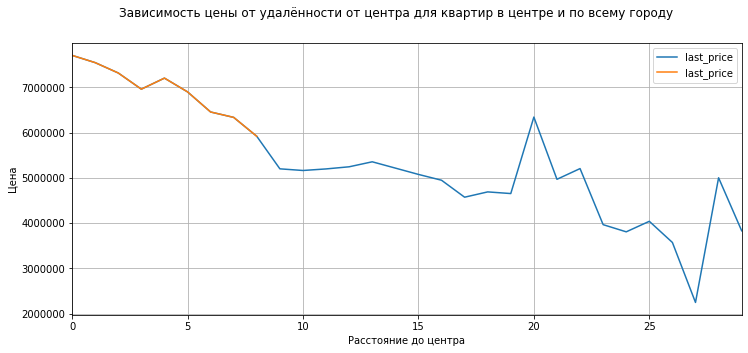

In [314]:
#отобразим два графика на одном для наглядности
df_centr_km = df_centr.pivot_table(index ='city_centers_nearest_km', values = 'last_price')
df_centr_km_8 = df_centr_8.pivot_table(index ='city_centers_nearest_km', values = 'last_price')

ax = df_centr_km.plot(grid = True, figsize = (12,5), label = 'Квартиры по всему городу', legend=True)
df_centr_km_8.plot(grid = True, figsize = (12,5), label= 'Квартиры в центре', ax=ax, legend=True) 
plt.suptitle('Зависимость цены от удалённости от центра для квартир в центре и по всему городу')
plt.xlabel('Расстояние до центра')
plt.ylabel('Цена')
plt.show()

##### Зависимость цены от даты размещения объявления (дня недели, когда было опубликовано объявление)

In [315]:
#рассчитаем коэффициент корреляции Пирсона для квартир по всему городу
print(df_centr['day'].corr(df_centr['last_price']))

-0.008042918173707982


In [316]:
#рассчитаем коэффициент корреляции Пирсона для квартир по всему городу
print(df_centr['day'].corr(df_centr['last_price']))

-0.008042918173707982


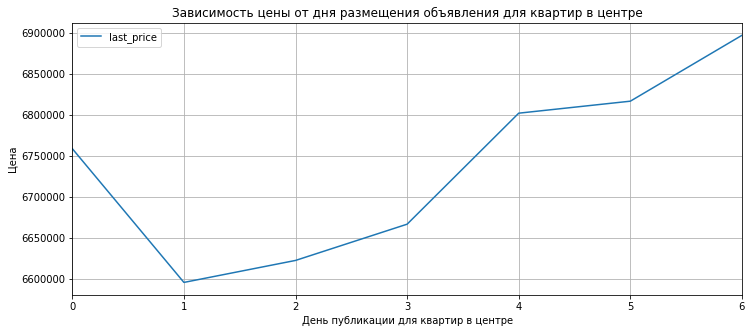

In [317]:
#построим график, используя группировку с pivot_table для квартир в центре
df_centr_8.pivot_table(index ='day', values = 'last_price').plot(grid = True, figsize = (12,5),
                                                                 title='Зависимость цены от дня размещения объявления для квартир в центре')
plt.xlabel('День публикации для квартир в центре')
plt.ylabel('Цена')
plt.show()

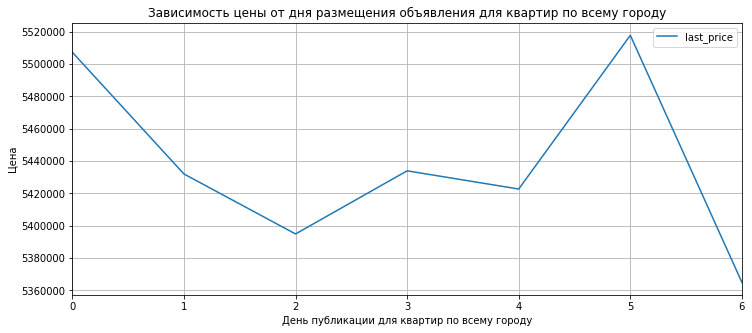

In [318]:
#построим график, используя группировку с pivot_table для квартир по всему городу
df_centr.pivot_table(index ='day', values = 'last_price').plot(grid = True, figsize = (12,5),
                                                               title='Зависимость цены от дня размещения объявления для квартир по всему городу')
plt.xlabel('День публикации для квартир по всему городу')
plt.ylabel('Цена')
plt.show()

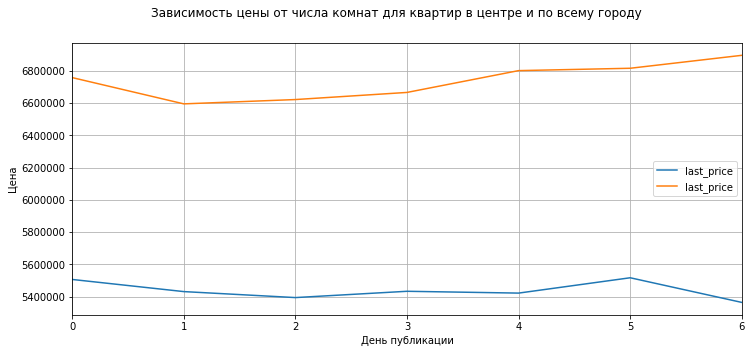

In [319]:
#отобразим два графика на одном для наглядности
df_centr_day = df_centr.pivot_table(index ='day', values = 'last_price')
df_centr_day_8 = df_centr_8.pivot_table(index ='day', values = 'last_price')

ax = df_centr_day.plot(grid = True, figsize = (12,5), label = 'Квартиры по всему городу', legend=True)
df_centr_day_8.plot(grid = True, figsize = (12,5), label= 'Квартиры в центре', ax=ax, legend=True) 
plt.suptitle('Зависимость цены от числа комнат для квартир в центре и по всему городу')
plt.xlabel('День публикации')
plt.ylabel('Цена')
plt.show()

#### Вывод

На данном шаге проанализировали сегмент квартир в центре Санкт-Петербурга и по всему Санкт-Петербургу.
При помощи метода query() из набора данных df_centr выделили квартиры, расположенные в центре Санкт-Петербурга, в отдельный набор данных df_centr_8. 

Рассмотрели параметры "Площадь", "Цена", "Число комнат", "Высота потолков" для сегмента квартир в центре и квартир по всему городу, постоили гистограммы, диаграммы размаха, сравнили показатели, сделали выводы. 

- В центре Санкт-Петербурга обычно на продажу выставляют квартиры площадью 58 м², тогда как по всему городу обычно на продажу выставляют квартиры площадью 49 м². Максимальное значение площади квартиры в центре и по всему городу - 112 м², минимальное значение площади квартиры в центре и по всему городу не изменилось - 12 м².

- В центре Санкт-Петербурга обычно на продажу выставляют квартиры ценой 6 700 000, тогда как по всему городу обычно на продажу выставляют квартиры ценой 5 000 000. Максимальное значение цены квартиры в центре и по всему городу  - 10 700 000, минимальное значение цены квартиры в центре - 1 600 000, минимальное значение цены по всему городу - 12 190.

- В центре Санкт-Петербурга и по всему городу обычно на продажу выставляют двухкомнатные квартиры. Максимальное значение числа комнат в центре и по всему городу  - 6, минимальное значение числа комнат в центре и по всему городу - 1.

- В центре Санкт-Петербурга и по всему городу обычно на продажу выставляют квартиры с высотой потолков 2 м. Максимальное значение высоты потолков в центре и по всему городу  - 32 м, минимальное значение высоты потолков в центре - 2 м, по всему городу - 1 м.

Рассмотрели зависимость цены от числа комнат, этажа, удалённости от центра, даты размещения объявления для сегмента квартир в центре и квартир по всему городу.
Рассчитали коэффициенты корреляции:
- Зависимость цены от числа комнат: 
  - коэффициент корреляции Пирсона для квартир в центре 0.47;
  - коэффициент корреляции Пирсона для квартир по всему городу 0.49;
- Зависимость цены от этажа:
  - коэффициент корреляции Пирсона для квартир в центре 0.09;
  - коэффициент корреляции Пирсона для квартир по всему городу 0.07;
- Зависимость цены от удалённости от центра:
  - коэффициент корреляции Пирсона для квартир в центре -0.24;
  - коэффициент корреляции Пирсона для квартир по всему городу -0.31;
- Зависимость цены от дня размещения объявления:
  - коэффициент корреляции Пирсона для квартир в центре -0.008;
  - коэффициент корреляции Пирсона для квартир по всему городу -0.008.
  
Построили графики, используя группировку с pivot_table для квартир в центре и по всему городу.
В целом тренды и для квартир в центре и по всему городу схожи. 

### Шаг 5. Общий вывод

В данном проекте перед нами стояла цель научиться определять рыночную стоимость объектов недвижимости.
В качестве входных данных была предоставлена выгрузка объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет.

Мы изучили данные. Пропущенные значения присутствовали в 14 столбцах из 22. Просмотрели значения по каждому столбцу в наборе данных, обработали пропущенные и подозрительные значения, проверили, встречаются ли в наборе данных дубликаты, скорректировали типы данных. После всех выполненных действий суммарное количество пропусков по  столбцам, необходимым для исследования,равно нулю. 

Посчитали и добавили к набору данных новые столбцы:
- 'metr_price' - цена квадратного метра;
- 'day' - день недели публикации объявления;
- 'month' - месяц публикации объявления;
- 'year' - год публикации объявления;
- 'floor_detail' - этаж квартиры (варианты — первый, последний, другой)
- living_part' - соотношение жилой и общей площади
- 'kitchen_part' - отношение площади кухни к общей
После добавления в наборе данных стало 29 столбцов.

Провели исследовательский анализ данных. 

Изучили следующие параметры: площадь, цена, число комнат, высота потолков, время продажи квартиры.
Для каждого параметра построили гистограмму методом hist() и диаграмму размаха или "ящик с усами" методом plot.box().
Рассмотрели межквартильный размах и числовое описание данных для каждого параметра.
- Для параметров "площадь" и "цена", "время продажи квартиры" отделили выбросы от нормальных значений при помощи метода query(). Для параметров "число комнат" и "высота потолков" корректировки не вносили. т.к. для данных параметров выбросы были исключены вместе с исключением выбросов для параметров "площадь" и "цена". 
- Обычно на продажу выставляют двухкомнатные квартиры площадью 50 м² стоимостью 4 350 000 с высотой потолка 2 м.
- Обычно время продажи  квартиры составляет 60 дней. Будем считать, что продажи прошли очень быстро, если время продажи квартиры меньше q1 или 29 дней, и что продажи прошли необычно долго, если время продажи квартиры больше q3 или 129 дней.
- Максимальное время продажи квартиры после исключения выбросов - 325 дней, минимальное время продажи квартиры - 1 день.
- Максимальное значение площади квартиры после исключения выбросов - 112 м², минимальное значение площади квартиры не изменилось - 12 м².
- Максимальное значение цены после исключения выбросов - 1 070 000 000, минимальное значение цены не изменилось - 12 190.

Изучили, какие факторы больше всего влияют на стоимость квартиры, зависит ли цена от площади, числа комнат, удалённости от центра. Изучили зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучили зависимость от даты размещения: дня недели, месяца и года.
Для каждого фактора подсчитали коэффициент корреляции Пирсона, построили гистограмму, диаграмму рассеивания, диаграмму с сотами, а также график, используя группировку с pivot_table.
- Значение коэффициента корреляции для фактора 'площадь' составляет 0.67. Это самое высокое положительное значение коэффициента корреляции из всех. Соответственно, больше всего на цену влияет площадь квартиры: чем больше площадь, тем выше цена.
- Значение коэффициента корреляции для фактора 'число комнат' составляет 0.41. Данный фактор также влияет на цену: с увеличением числа комнат возрастает цена.
- Значение коэффициента корреляции для фактора 'удалённость от центра' составляет - 0.53. Данный фактор также оказывает влияние на цену, только зависимость обратная: чем дальше расположен объект, тем ниже цена.
- Значение коэффициента корреляции для фактора 'этаж, на котором расположена квартира' составляет 0.14. Зависимость цены от этажа слабая: с увеличением этажа цена возрастает очень незначительно. Есть особенности: самая низкая цена у квартир, расположенных на первом этаже, чуть выше у квартир, расположенных на последнем, и самая высокая цена у квартир, расположенных не на первом и не на последнем (т.е на другом) этаже, что также ожидаемо.
- Значение коэффициента корреляции для фактора 'день недели, когда было опубликовано объявление' составляет -0.01, что говорит о том, что есть очень слабая обратная взаимозависимость цены и дня недели: чем ближе к выходным было размещено объявление, тем ниже цена.
- Значение коэффициента корреляции для фактора 'месяц, когда было опубликовано объявление' составляет -0.005. Это самое низкое значение коэффициента корреляции из всех. Соответственно, самое слабое обратное влияние на цену оказывает месяц, когда было размещено объявление. Есть особенности: размещённые в апреле объекты имеют цену значительнро выше, чем объекты, размещённые в июне.
- Значение коэффициента корреляции для фактора 'год, когда было опубликовано объявление' составляет 0.04, что говорит о том, что есть очень слабая взаимозависимость цены и года, когда было размещено объявление. В соответсвии с графиками, цены на объекты начали повышаться, начиная с 2017.

Выбрали 10 населённых пунктов с наибольшим числом объявлений: Санкт-Петербург, посёлок Мурино, посёлок Шушары, Всеволожск, Колпино, Пушкин, посёлок Парголово, Гатчина, деревня Кудрово, Выборг.
Подсчитали среднюю цену квадратного метра и выделили среди них населённые пункты с самой высокой и низкой стоимостью жилья.
- На первом месте Санкт-Петербург, там самая высокая средняя цена квадратного метра: 105 785.
- На последнем, десятом месте Выборг, там самая низкая средняя цена квадратного метра: 58 583. 

Изучили предложения квартир в Санкт-Петербурге. При помощи метода query() выделили квартиры, расположенные в Санкт-Петербурге, в отдельный набор данных df_centr. Создали отдельный столбец с расстоянием до центра в километрах, округлили значения до целых. Далее создали сводную таблицу и подсчитали среднюю цену для каждого километра. Построили график, используя группировку с pivot_table. На графике в районе 8 км отметили спад цены. Приняли решение центральной зоной считать территорию от нуля до 8 км. 

Проанализировали сегмент квартир в центре Санкт-Петербурга и по всему Санкт-Петербургу.
При помощи метода query() из набора данных df_centr выделили квартиры, расположенные в центре Санкт-Петербурга, в отдельный набор данных df_centr_8. 
Рассмотрели параметры "Площадь", "Цена", "Число комнат", "Высота потолков" для сегмента квартир в центре и квартир по всему городу, постоили гистограммы, диаграммы размаха, сравнили показатели, сделали выводы. 
- В центре Санкт-Петербурга обычно на продажу выставляют квартиры площадью 58 м², тогда как по всему городу обычно на продажу выставляют квартиры площадью 49 м². Максимальное значение площади квартиры в центре и по всему городу - 112 м², минимальное значение площади квартиры в центре и по всему городу не изменилось - 12 м².
- В центре Санкт-Петербурга обычно на продажу выставляют квартиры ценой 6 700 000, тогда как по всему городу обычно на продажу выставляют квартиры ценой 5 000 000. Максимальное значение цены квартиры в центре и по всему городу  - 10 700 000, минимальное значение цены квартиры в центре - 1 600 000, минимальное значение цены по всему городу - 12 190.
- В центре Санкт-Петербурга и по всему городу обычно на продажу выставляют двухкомнатные квартиры. Максимальное значение числа комнат в центре и по всему городу  - 6, минимальное значение числа комнат в центре и по всему городу - 1.
- В центре Санкт-Петербурга и по всему городу обычно на продажу выставляют квартиры с высотой потолков 2 м. Максимальное значение высоты потолков в центре и по всему городу  - 32 м, минимальное значение высоты потолков в центре - 2 м, по всему городу - 1 м.

Рассмотрели зависимость цены от числа комнат, этажа, удалённости от центра, даты размещения объявления для сегмента квартир в центре и квартир по всему городу.
Рассчитали коэффициенты корреляции:
- Зависимость цены от числа комнат: 
  - коэффициент корреляции Пирсона для квартир в центре 0.47;
  - коэффициент корреляции Пирсона для квартир по всему городу 0.49;
- Зависимость цены от этажа:
  - коэффициент корреляции Пирсона для квартир в центре 0.09;
  - коэффициент корреляции Пирсона для квартир по всему городу 0.06;
- Зависимость цены от удалённости от центра:
  - коэффициент корреляции Пирсона для квартир в центре -0.24;
  - коэффициент корреляции Пирсона для квартир по всему городу -0.31;
- Зависимость цены от дня размещения объявления:
  - коэффициент корреляции Пирсона для квартир в центре -0.01;
  - коэффициент корреляции Пирсона для квартир по всему городу -0.01.
  
Построили графики, используя группировку с pivot_table для квартир в центре и по всему городу.
В итоге можем сказать, что в целом тренды и для квартир в центре и по всему городу схожи.